In [96]:
from pandas import to_numeric
from pandas import melt
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [51]:
df = read_csv("pd_speech_features.csv")

In [54]:
df.head()

Unnamed: 0 Unnamed: 1 Baseline Features Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0         id     gender               PPE        DFA       RPDE  numPulses   
1          0          1           0.85247    0.71826    0.57227        240   
2          0          1           0.76686    0.69481    0.53966        234   
3          0          1           0.85083    0.67604    0.58982        232   
4          1          0           0.41121    0.79672    0.59257        178   

         Unnamed: 6        Unnamed: 7          Unnamed: 8    Unnamed: 9  ...  \
0  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
1               239        0.00806353            8.68E-05       0.00218  ...   
2               233       0.008258256            7.31E-05       0.00195  ...   
3               231        0.00833959            6.04E-05       0.00176  ...   
4               177       0.010857733         0.000182739       0.00419  ...   

                Unnamed: 745               Unnamed: 746  \
0  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29   
1                      1.562                     2.6445   
2                     1.5589                     3.6107   
3                     1.5643                     2.3308   
4                     3.7805                     3.5664   

                Unnamed: 747               Unnamed: 748  \
0  tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31   
1                     3.8686                     4.2105   
2                    23.5155                    14.1962   
3                     9.4959                    10.7458   
4                     5.2558                    14.0403   

                Unnamed: 749               Unnamed: 750  \
0  tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33   
1                     5.1221                     4.4625   
2                    11.0261                     9.5082   
3                    11.0177                     4.8066   
4                     4.2235                     4.6857   

                Unnamed: 751               Unnamed: 752  \
0  tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35   
1                     2.6202                     3.0004   
2                     6.5245                     6.3431   
3                     2.9199                     3.1495   
4                      4.846                      6.265   

                Unnamed: 753 Unnamed: 754  
0  tqwt_kurtosisValue_dec_36        class  
1                    18.9405            1  
2                     45.178            1  
3                     4.7666            1  
4                     4.0603            1  

[5 rows x 755 columns]

In [55]:
df.columns = df.iloc[0]
df = df[1:]

In [56]:
df.head()

0 id gender      PPE      DFA     RPDE numPulses numPeriodsPulses  \
1  0      1  0.85247  0.71826  0.57227       240              239   
2  0      1  0.76686  0.69481  0.53966       234              233   
3  0      1  0.85083  0.67604  0.58982       232              231   
4  1      0  0.41121  0.79672  0.59257       178              177   
5  1      0   0.3279  0.79782  0.53028       236              235   

0 meanPeriodPulses stdDevPeriodPulses locPctJitter  ...  \
1       0.00806353           8.68E-05      0.00218  ...   
2      0.008258256           7.31E-05      0.00195  ...   
3       0.00833959           6.04E-05      0.00176  ...   
4      0.010857733        0.000182739      0.00419  ...   
5      0.008161574        0.002668863      0.00535  ...   

0 tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29  \
1                     1.562                    2.6445   
2                    1.5589                    3.6107   
3                    1.5643                    2.3308   
4                    3.7805                    3.5664   
5                    6.1727                    5.8416   

0 tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31  \
1                    3.8686                    4.2105   
2                   23.5155                   14.1962   
3                    9.4959                   10.7458   
4                    5.2558                   14.0403   
5                    6.0805                    5.7621   

0 tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33  \
1                    5.1221                    4.4625   
2                   11.0261                    9.5082   
3                   11.0177                    4.8066   
4                    4.2235                    4.6857   
5                    7.7817                   11.6891   

0 tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35  \
1                    2.6202                    3.0004   
2                    6.5245                    6.3431   
3                    2.9199                    3.1495   
4                     4.846                     6.265   
5                    8.2103                    5.0559   

0 tqwt_kurtosisValue_dec_36 class  
1                   18.9405     1  
2                    45.178     1  
3                    4.7666     1  
4                    4.0603     1  
5                    6.1164     1  

[5 rows x 755 columns]

In [99]:
columns = list(df.columns)
df[columns] = df[columns].apply(to_numeric)
print(df.dtypes)

0
id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object


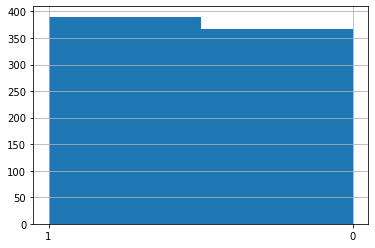

In [65]:
hist_plot = df['gender'].hist(bins=2)

In [63]:
df['gender'].nunique()

2

##### There are 754 attributes/features and 756 objects in the dataset. The last feature "Class" is the target variable. Gender feature has binary data( '1' = Male, '0' = Female ). Rest of the features have numerical value (type = int or float)

# Finding mean median mode std,etc 0f attributes 

In [84]:
l= [['column_name','mean','std','median','range','first_quantile','third_quantile']]
for att in columns:
    arr = np.array(df[att].astype(float))
    mean = np.mean(arr)
    std = np.std(arr)
    median = np.median(arr)
    ra = max(arr) - min(arr)
    Q1 = np.quantile(arr,.25)
    Q3 = np.quantile(arr,.75)
    l.append([att,mean,std,median,ra,Q1,Q3])
    
df_ct = DataFrame(l)
df_ct.columns = df_ct.iloc[0]
df_ct = df_ct[1:]

In [85]:
df_ct

0                  column_name       mean        std    median     range  \
1                           id      125.5  72.745561     125.5     251.0   
2                       gender   0.515873   0.499748       1.0       1.0   
3                          PPE   0.746284   0.169182  0.809655  0.866109   
4                          DFA   0.700414   0.069672  0.700525   0.30914   
5                         RPDE   0.489058   0.137352  0.484355   0.71693   
..                         ...        ...        ...       ...       ...   
751  tqwt_kurtosisValue_dec_33  12.375335  16.330854   4.74145   71.9035   
752  tqwt_kurtosisValue_dec_34   14.79923    15.7121    6.7257   60.1456   
753  tqwt_kurtosisValue_dec_35  14.751559   14.42343   7.33425   55.5884   
754  tqwt_kurtosisValue_dec_36   31.48111  34.208344  10.63725  154.0597   
755                      class   0.746032    0.43528       1.0       1.0   

0   first_quantile third_quantile  
1            62.75         188.25  
2              0.0            1.0  
3         0.762833       0.834315  
4         0.647053       0.754985  
5         0.386537       0.586515  
..             ...            ...  
751       3.114375      12.201325  
752       3.665925       21.92205  
753       3.741275      22.495175  
754        3.94875      61.125325  
755            0.0            1.0  

[755 rows x 7 columns]

# The distribution of the attributes

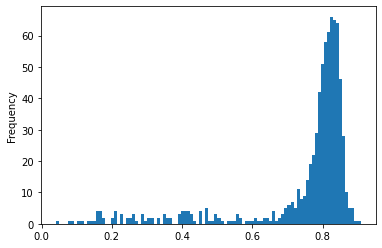

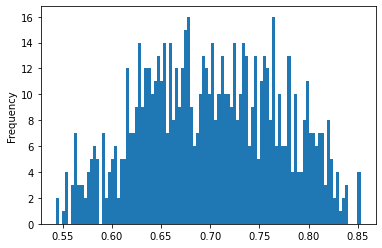

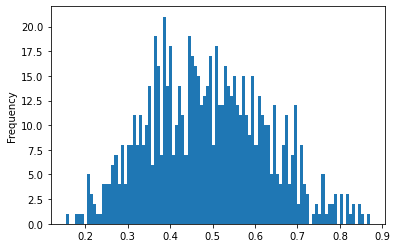

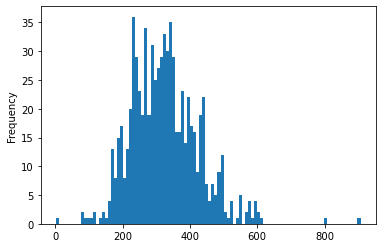

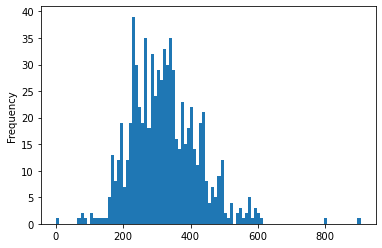

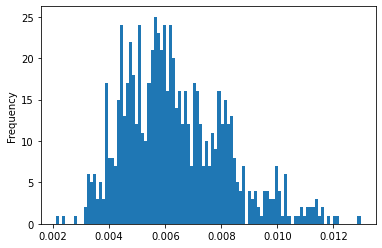

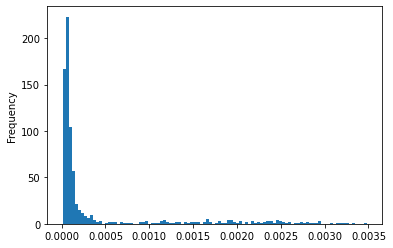

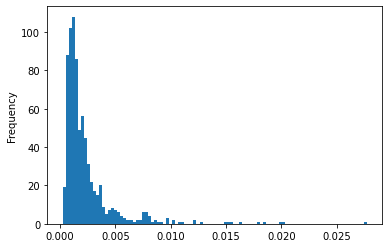

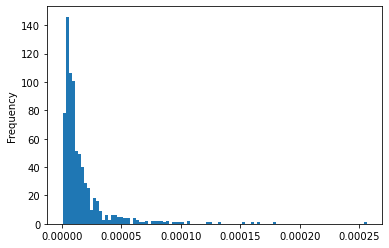

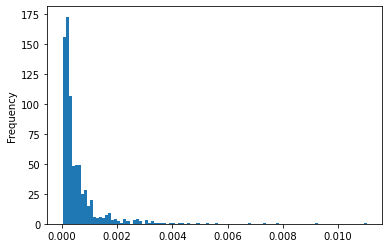

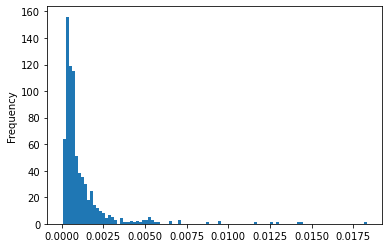

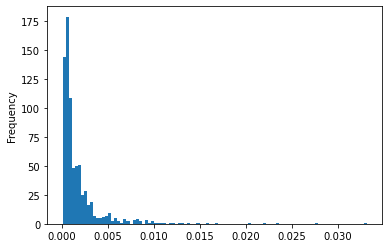

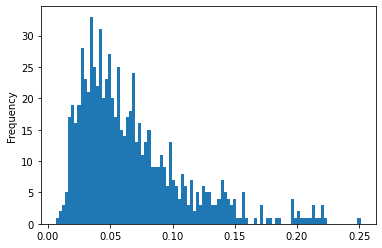

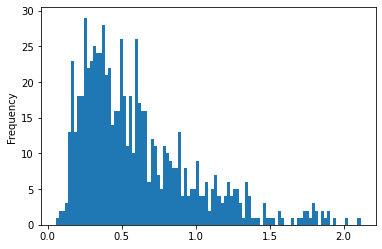

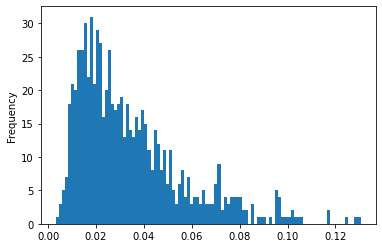

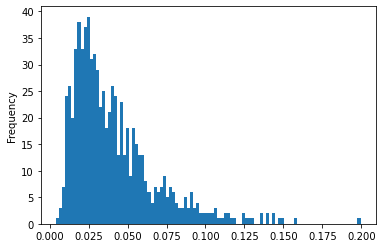

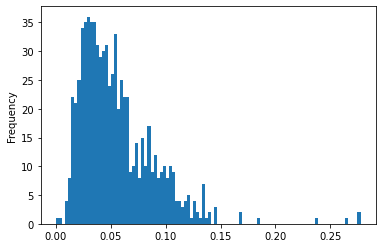

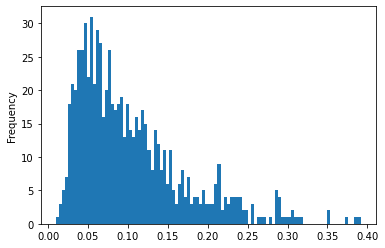

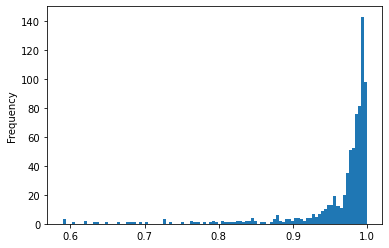

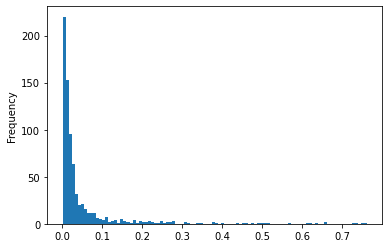

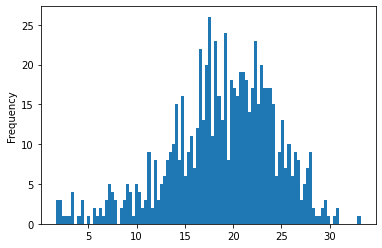

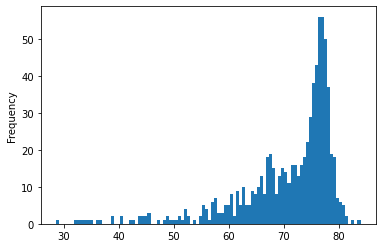

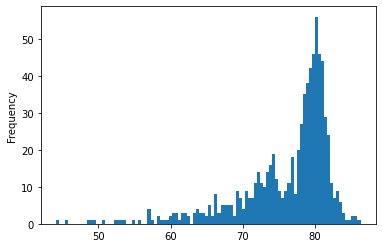

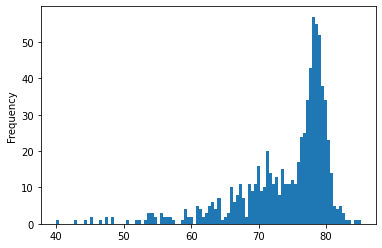

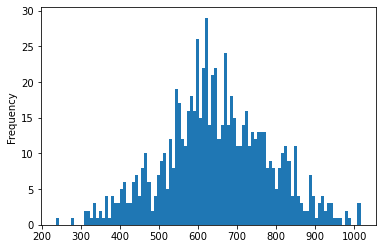

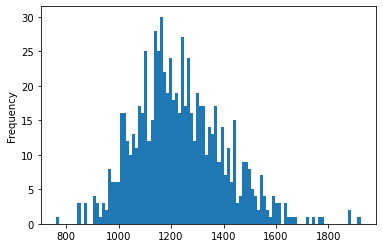

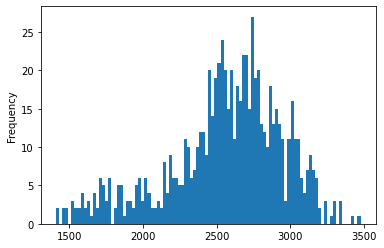

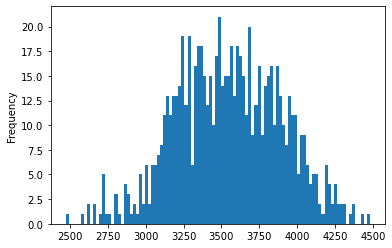

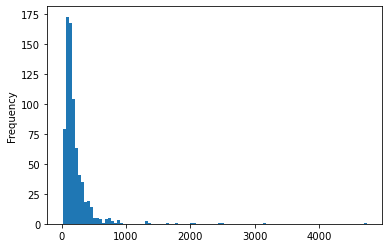

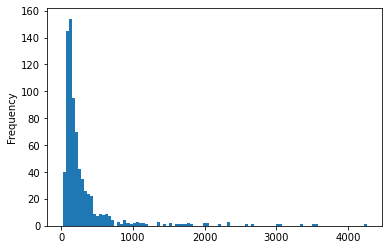

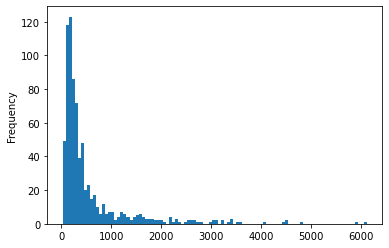

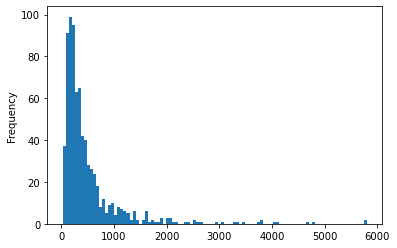

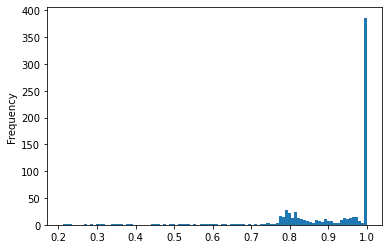

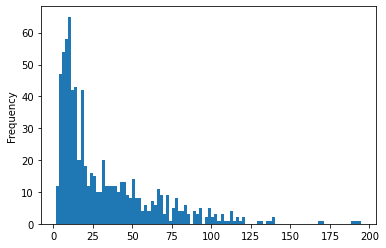

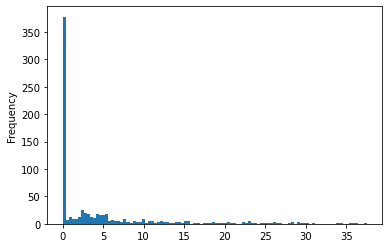

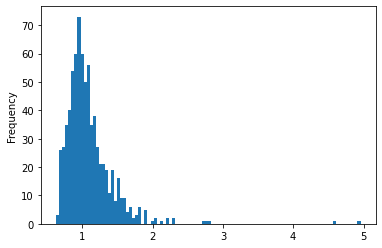

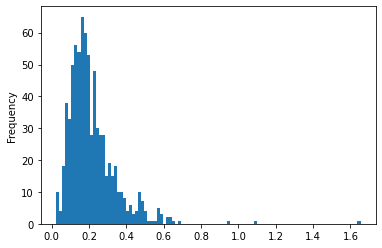

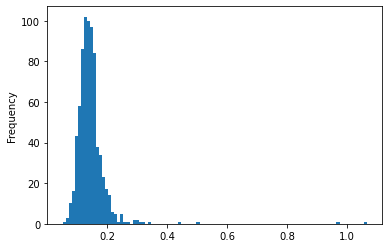

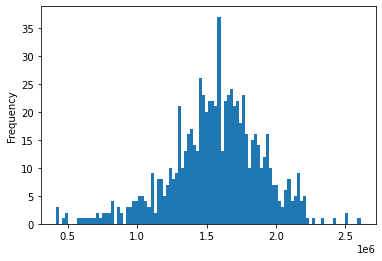

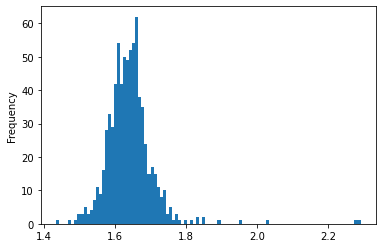

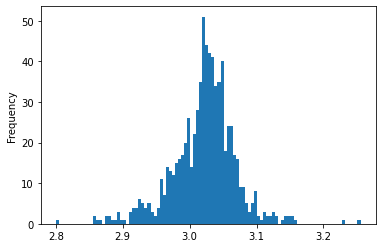

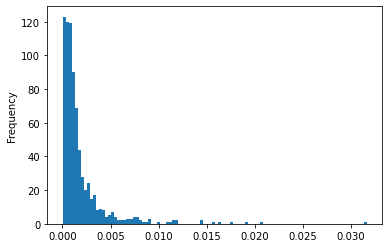

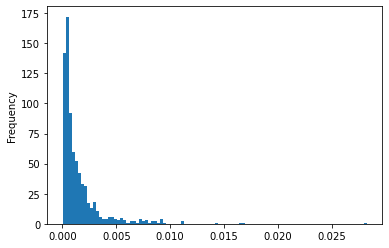

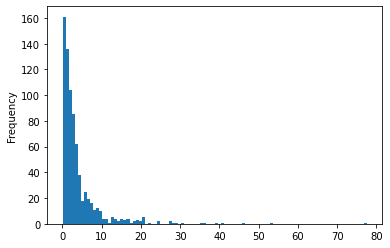

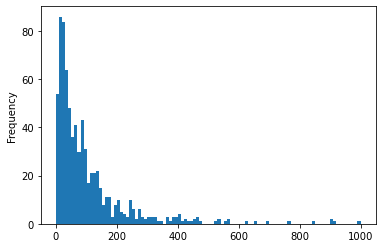

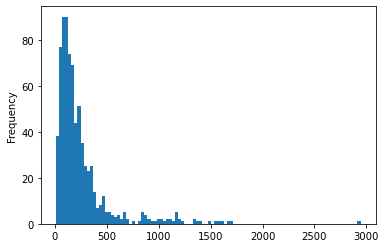

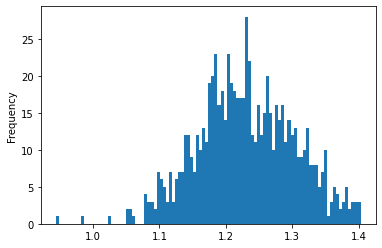

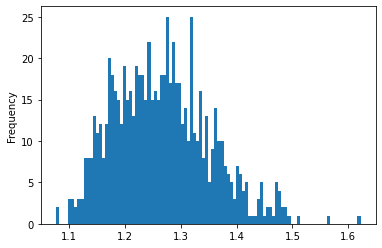

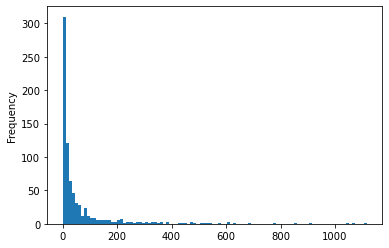

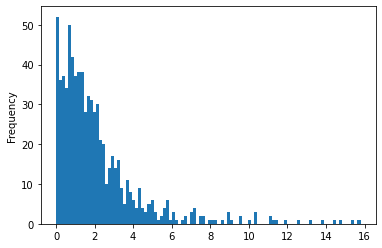

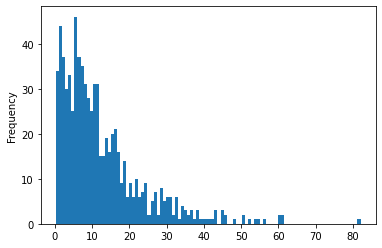

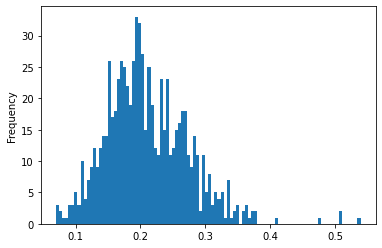

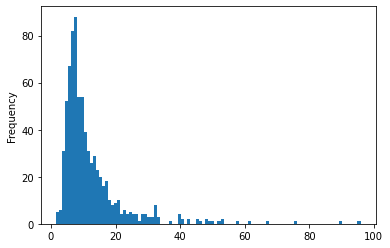

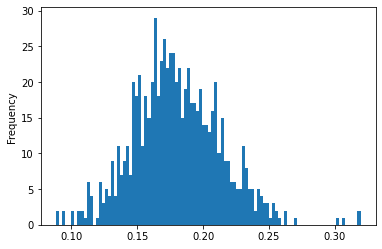

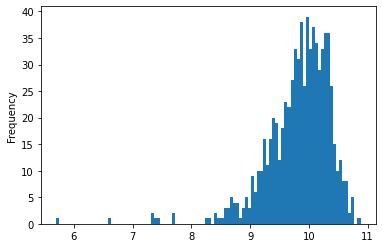

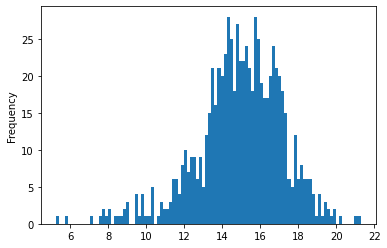

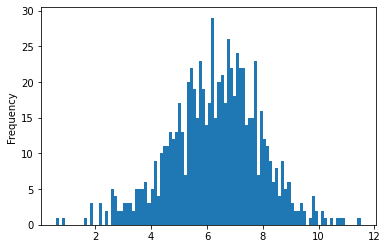

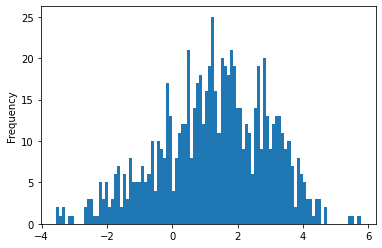

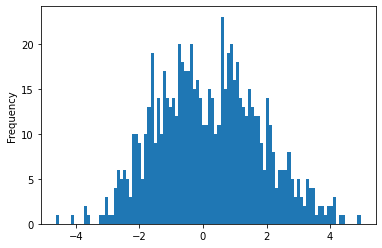

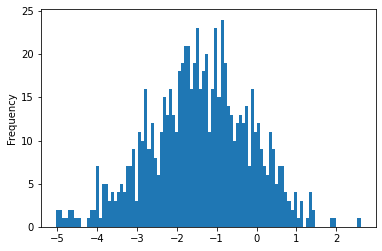

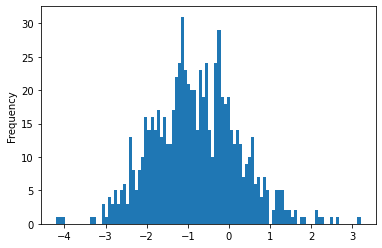

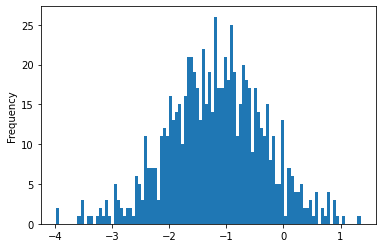

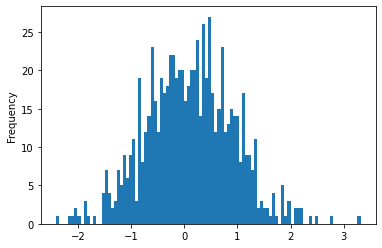

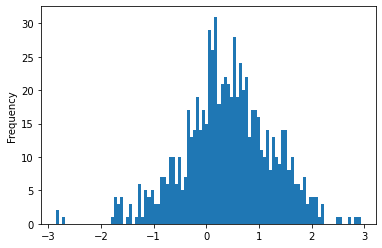

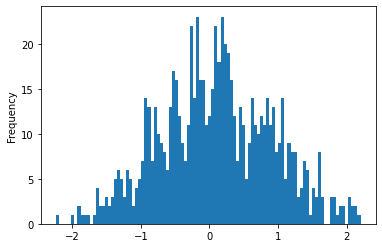

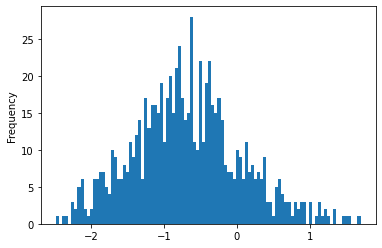

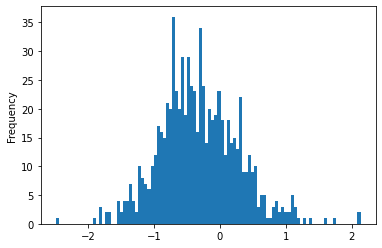

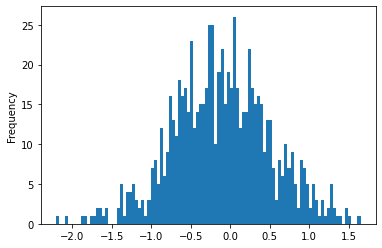

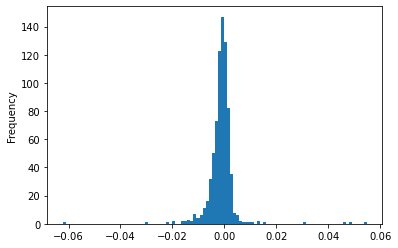

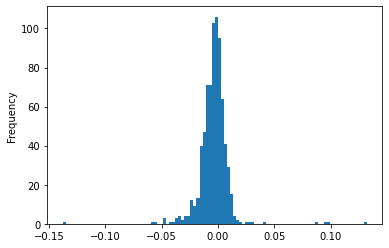

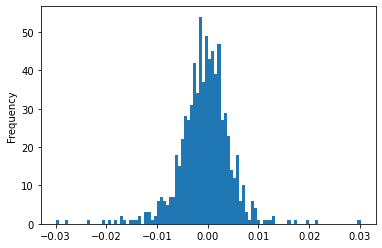

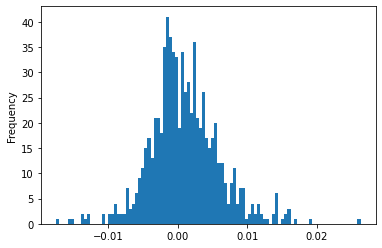

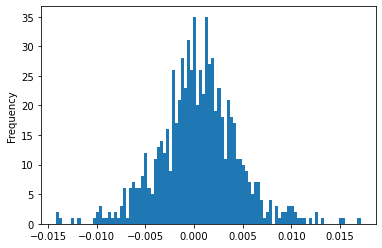

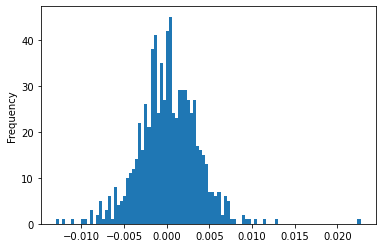

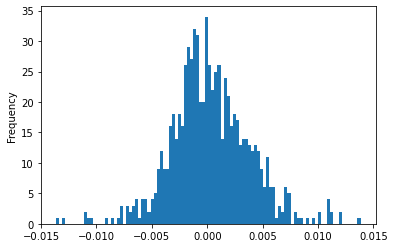

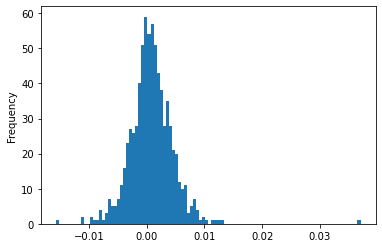

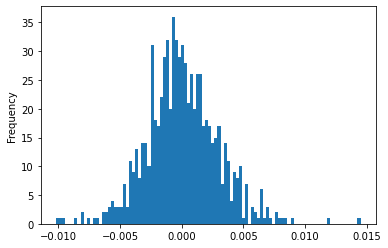

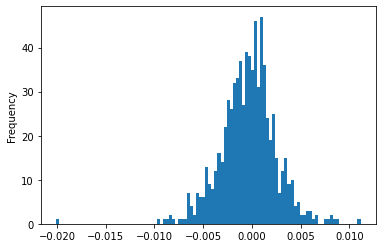

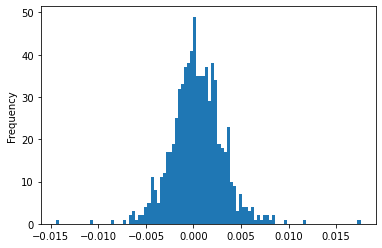

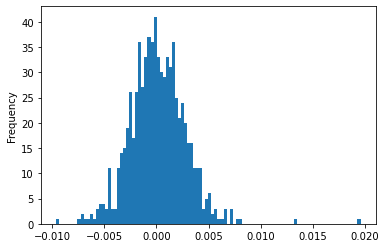

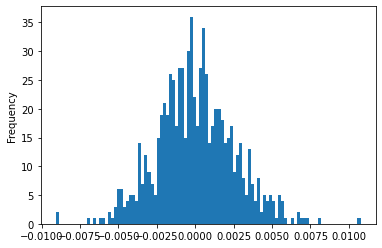

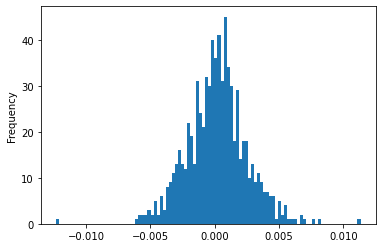

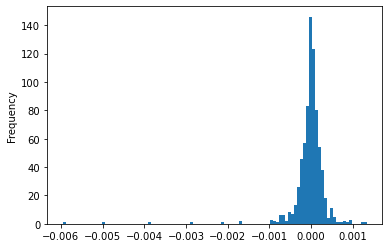

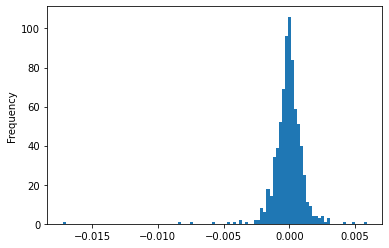

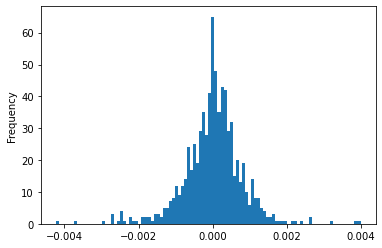

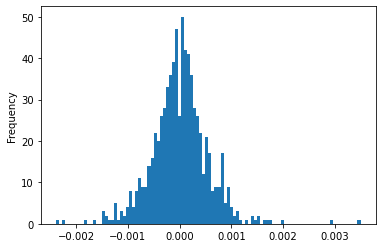

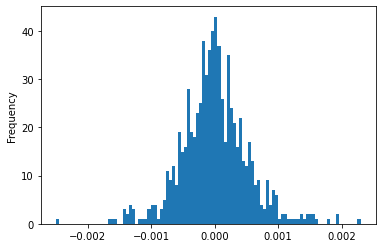

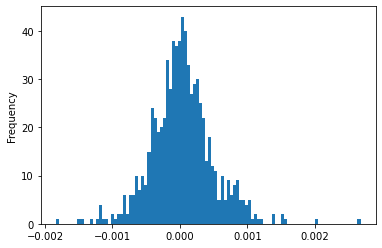

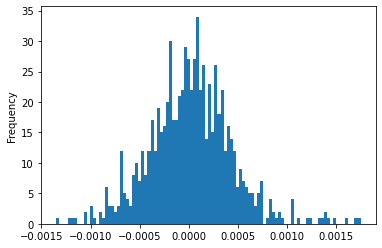

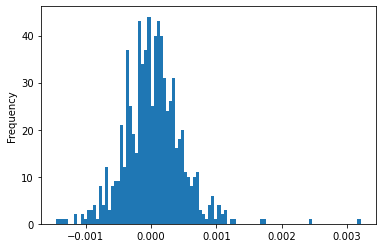

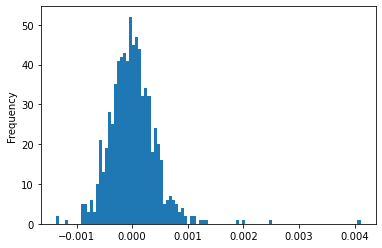

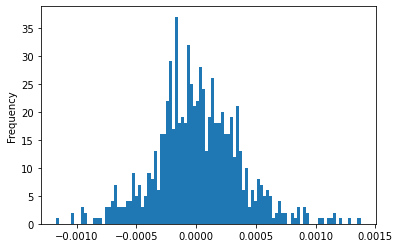

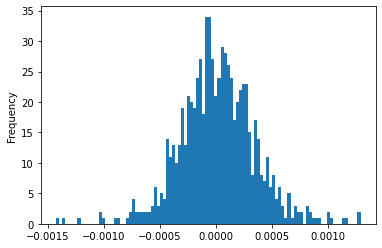

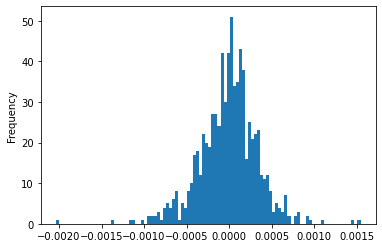

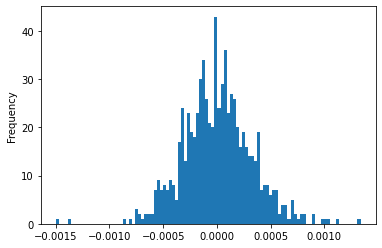

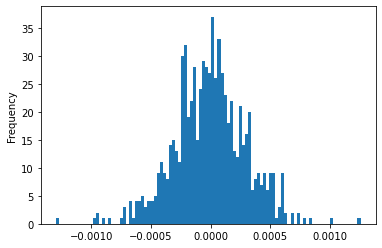

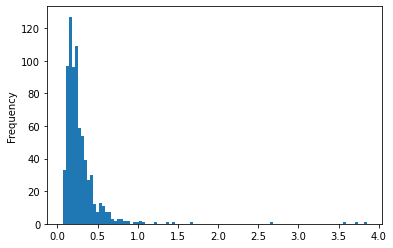

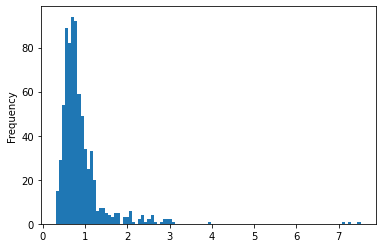

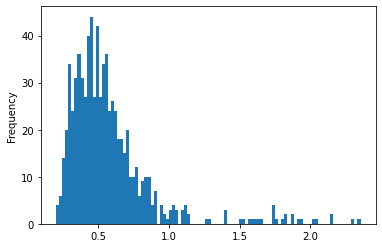

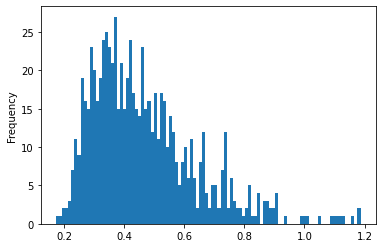

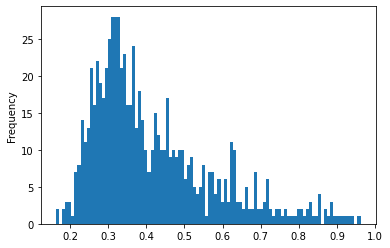

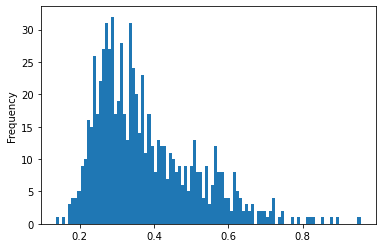

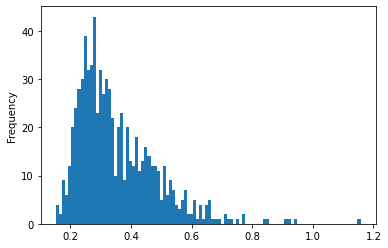

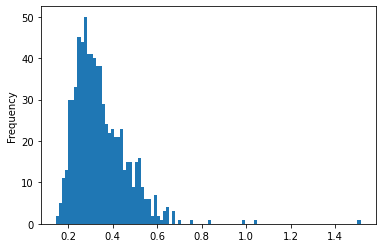

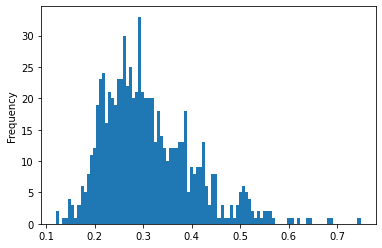

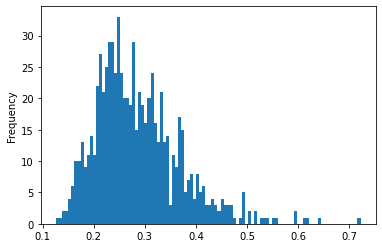

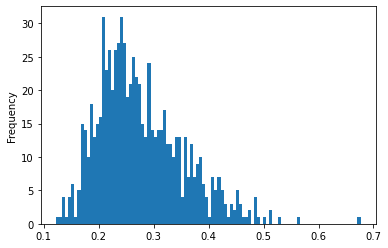

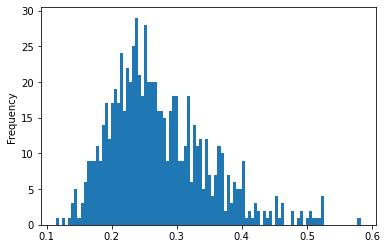

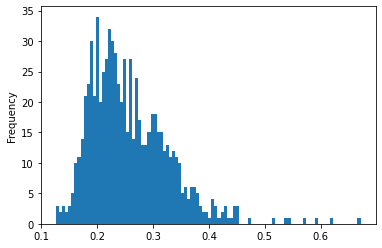

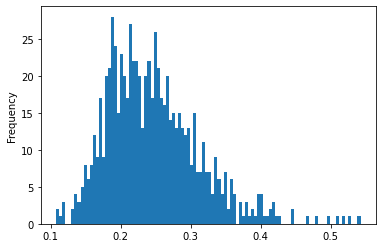

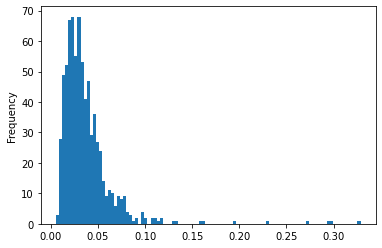

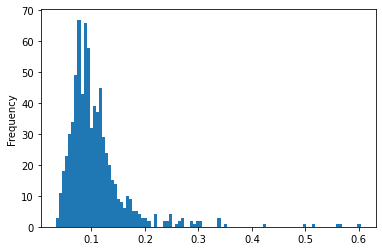

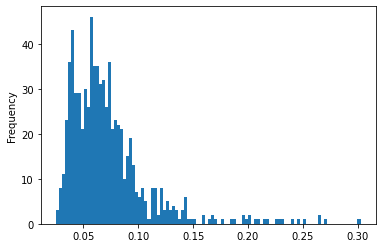

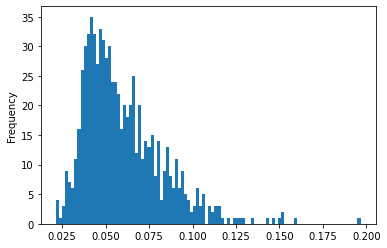

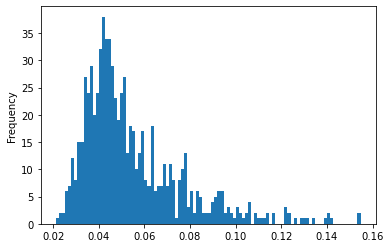

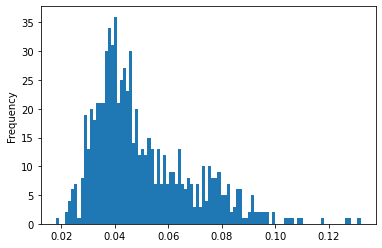

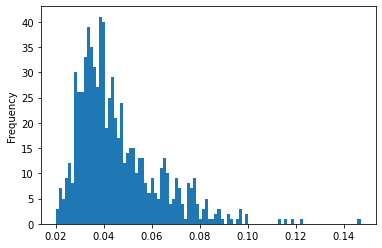

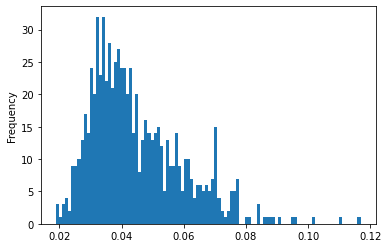

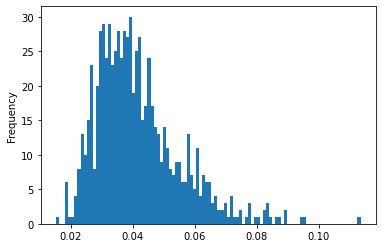

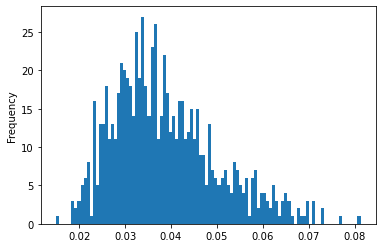

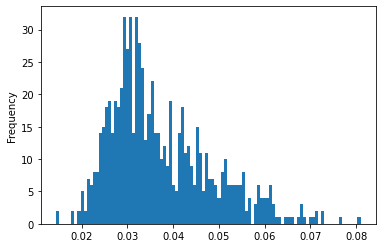

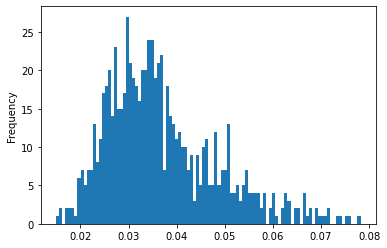

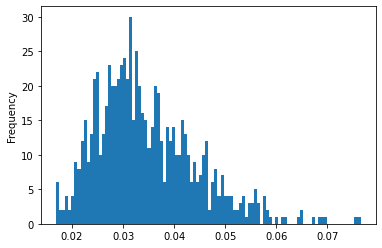

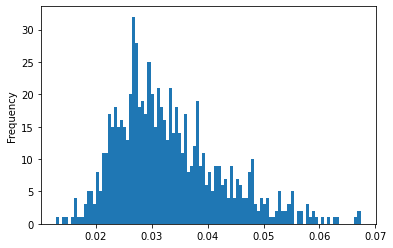

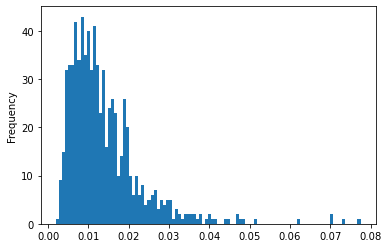

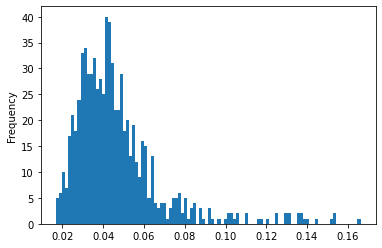

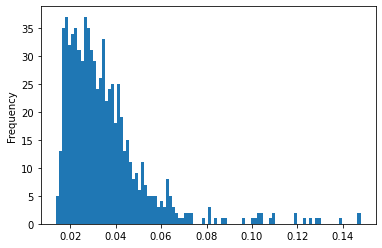

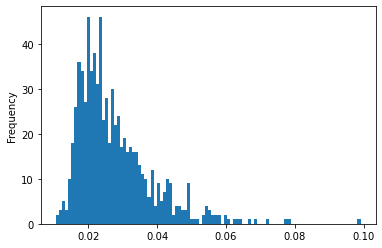

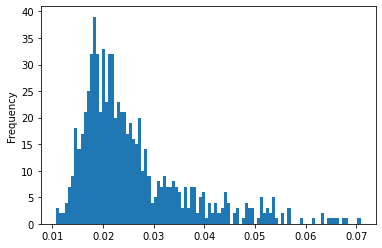

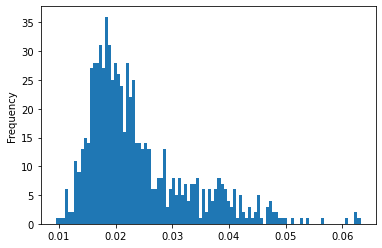

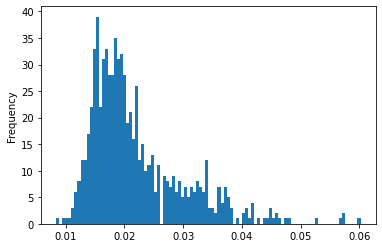

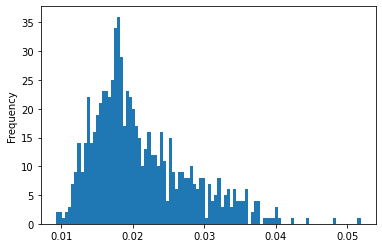

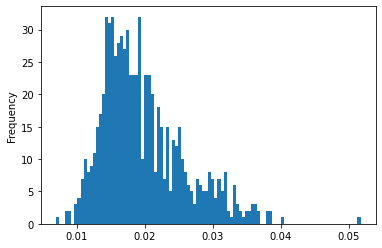

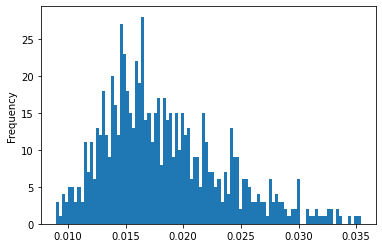

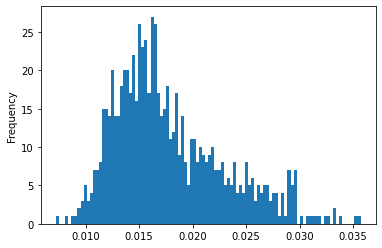

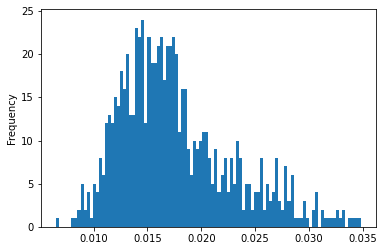

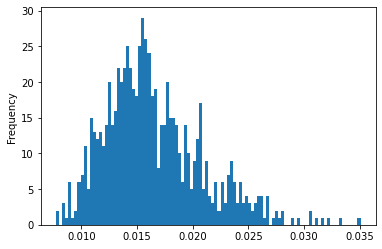

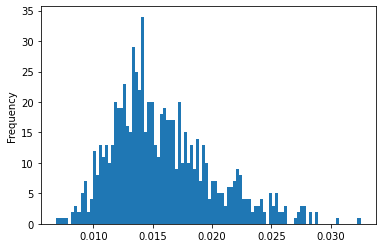

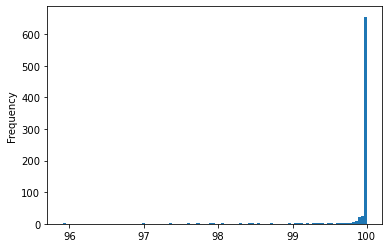

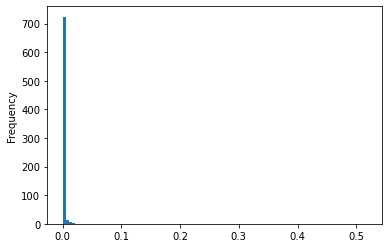

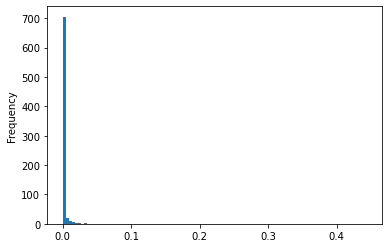

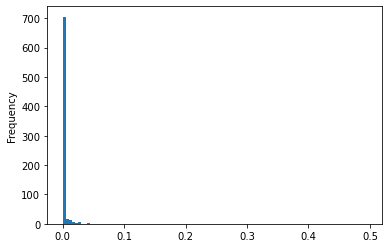

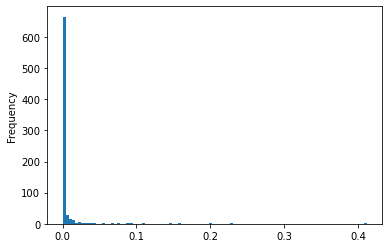

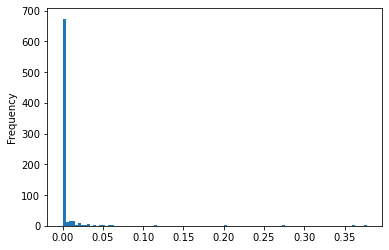

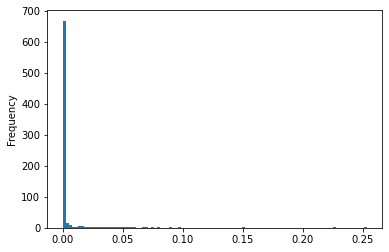

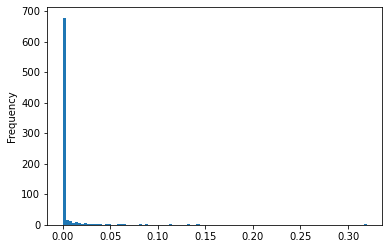

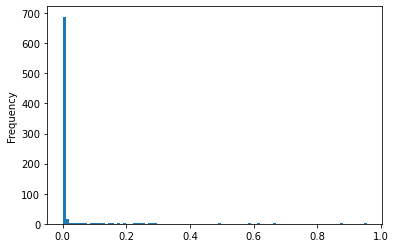

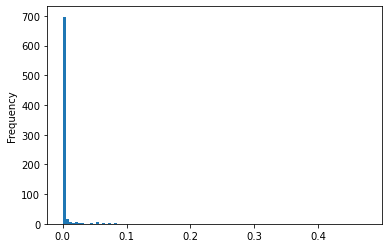

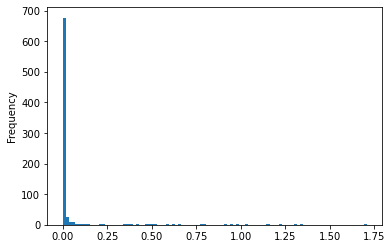

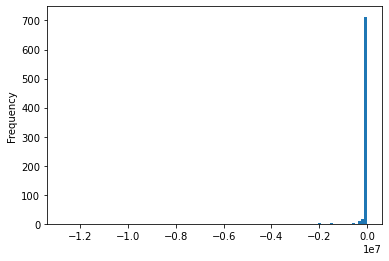

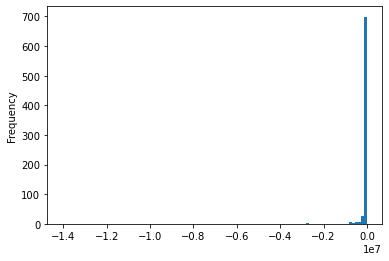

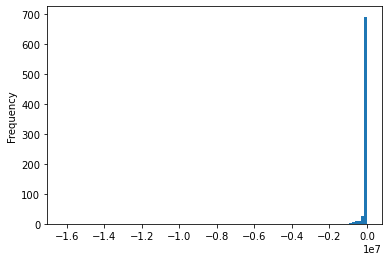

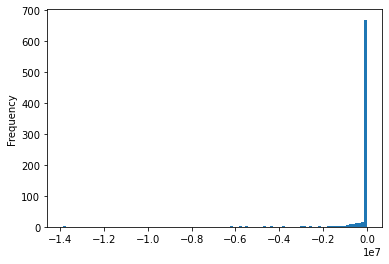

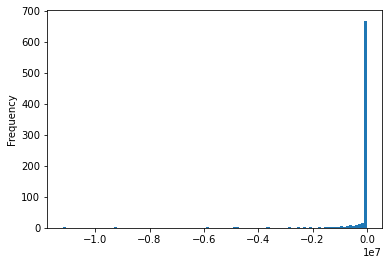

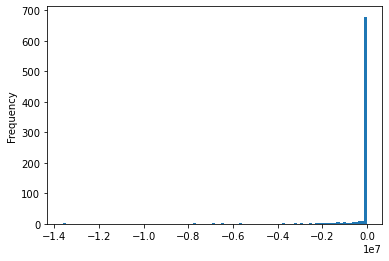

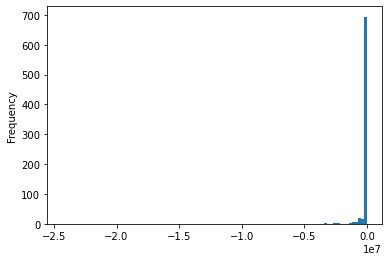

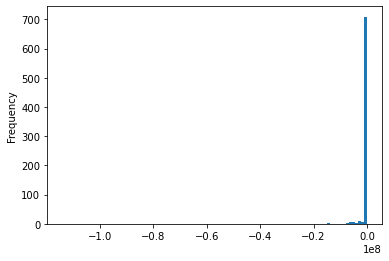

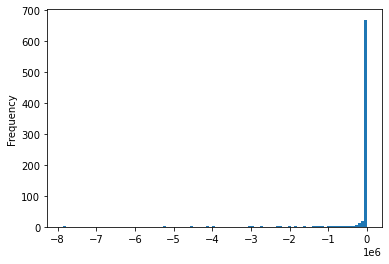

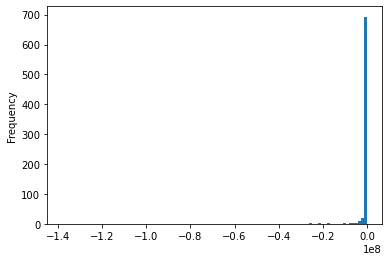

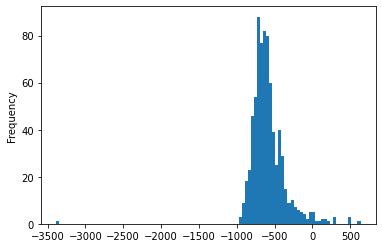

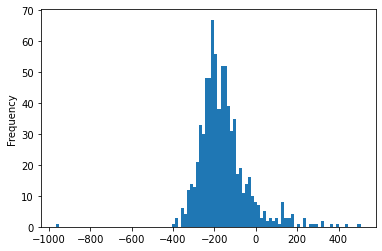

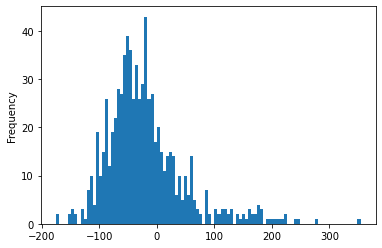

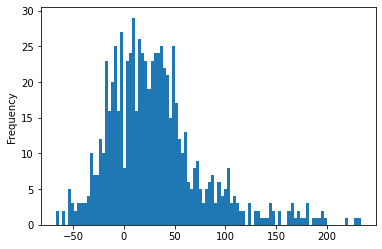

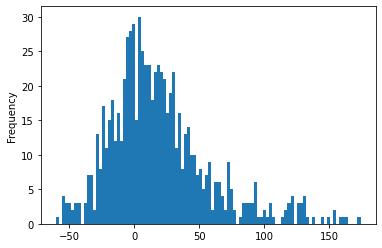

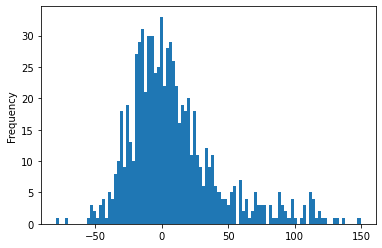

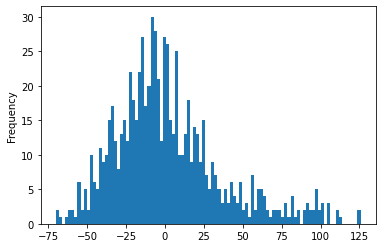

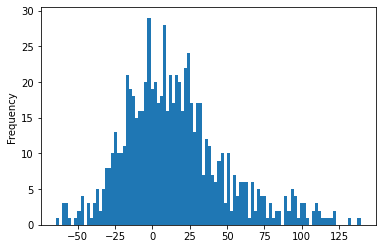

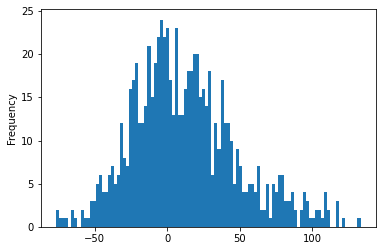

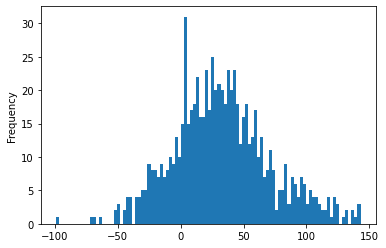

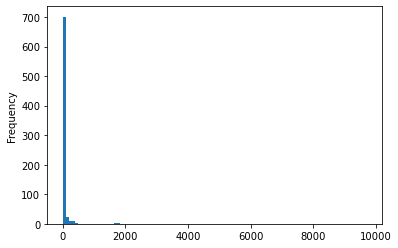

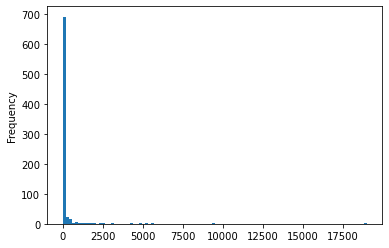

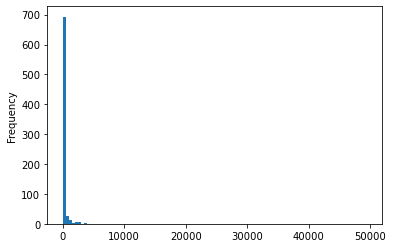

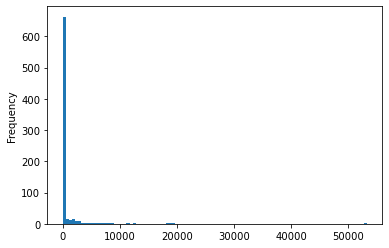

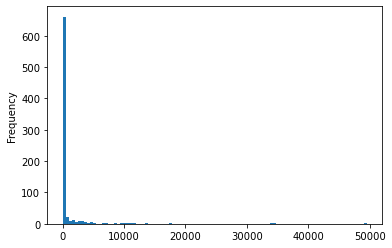

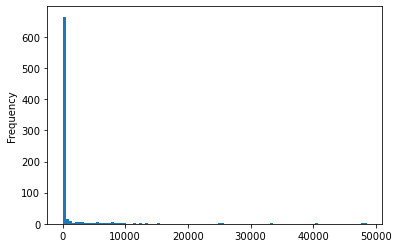

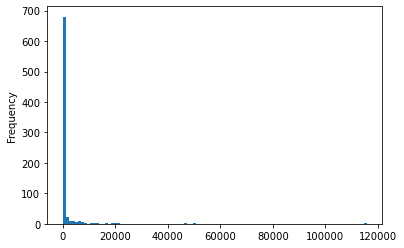

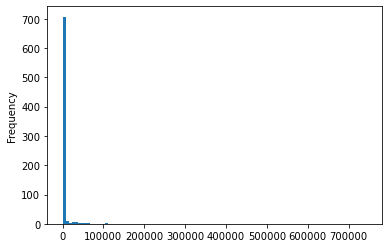

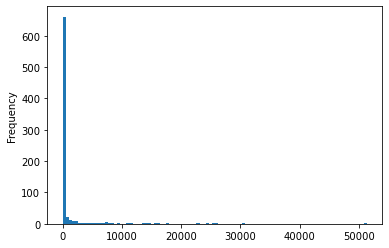

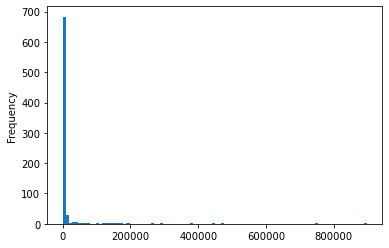

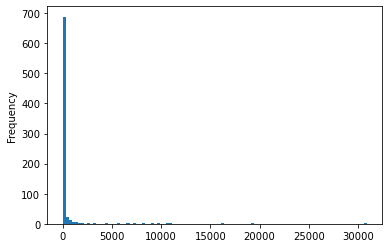

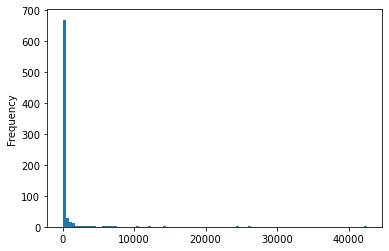

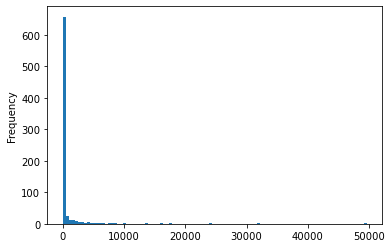

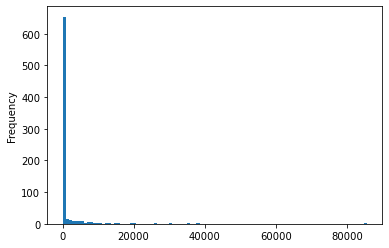

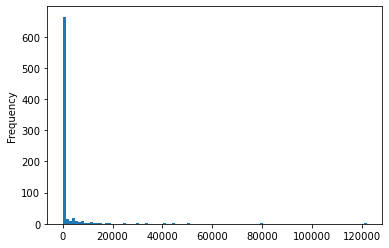

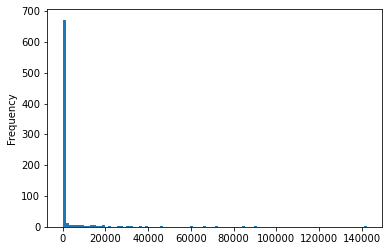

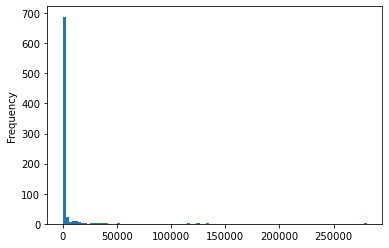

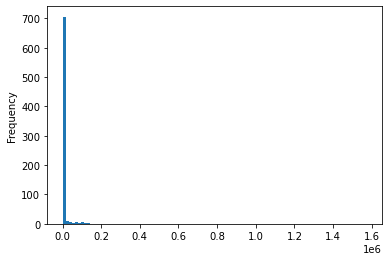

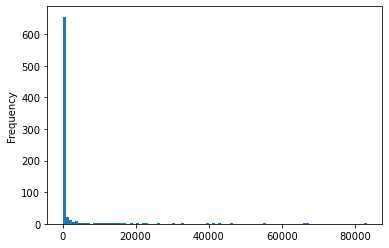

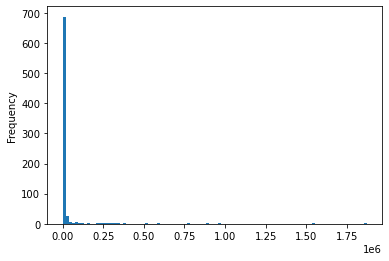

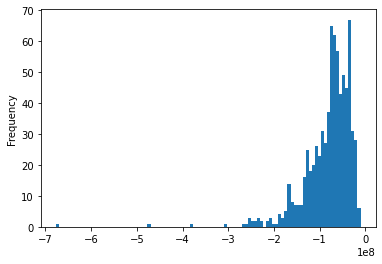

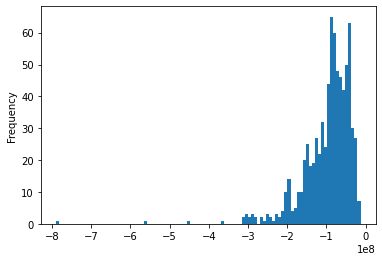

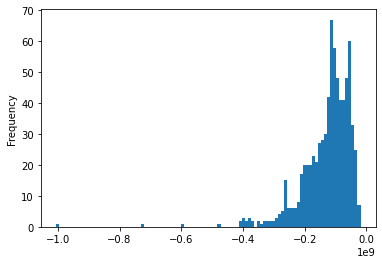

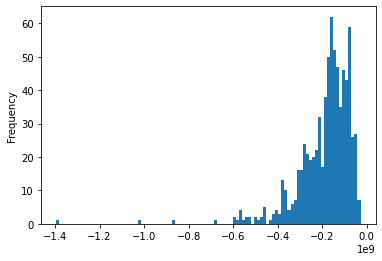

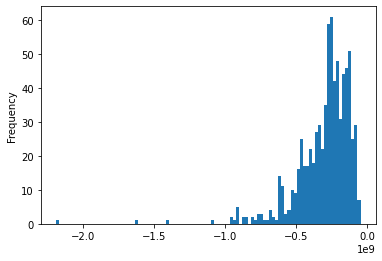

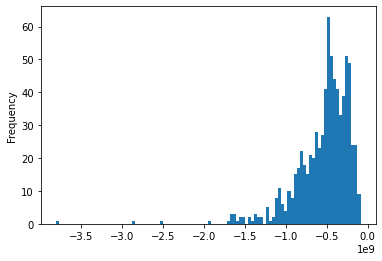

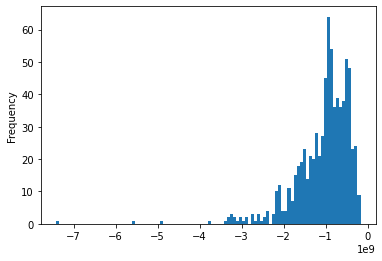

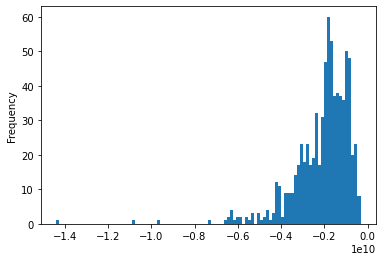

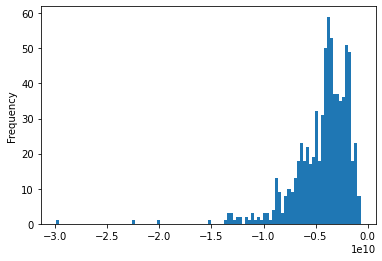

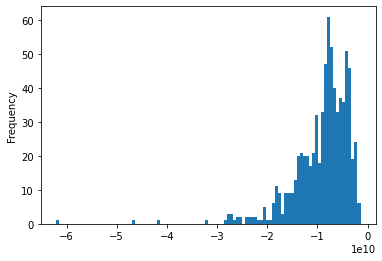

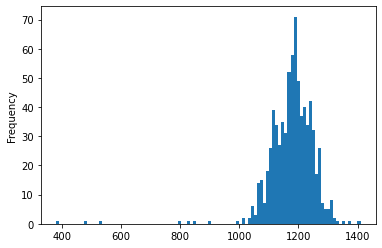

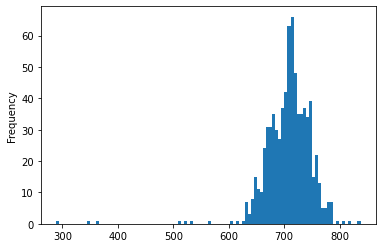

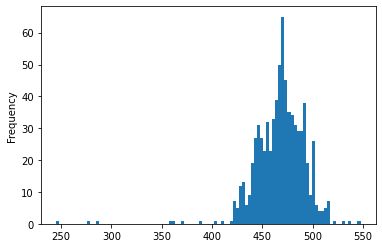

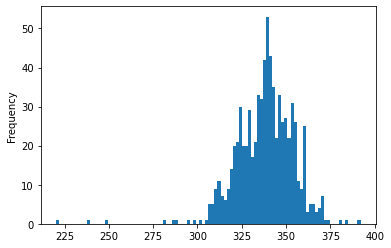

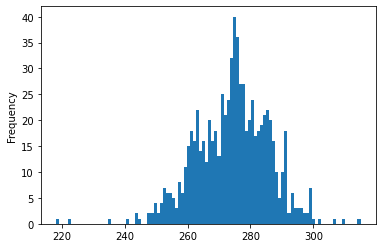

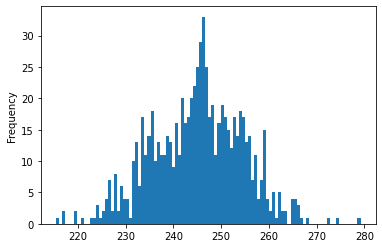

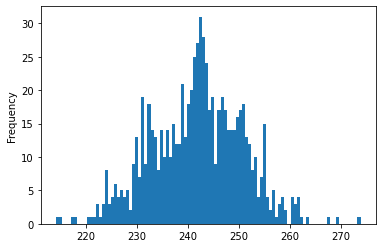

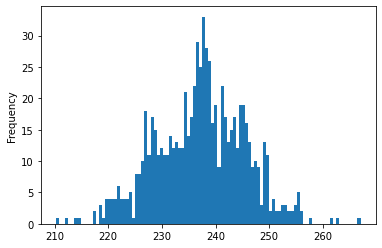

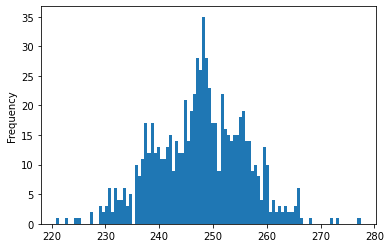

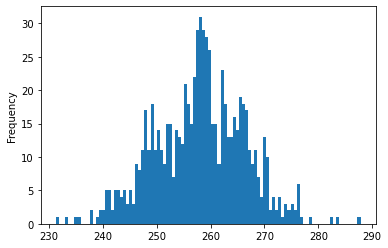

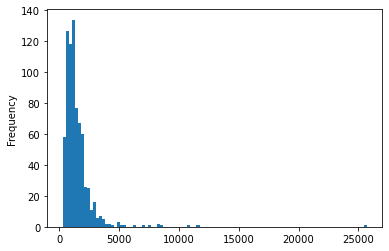

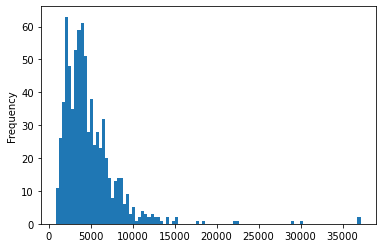

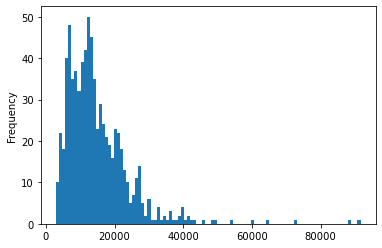

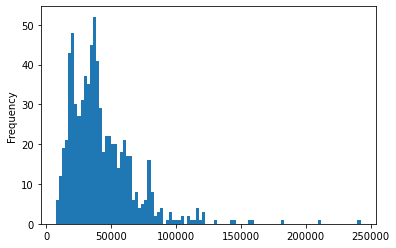

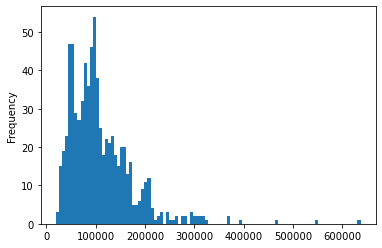

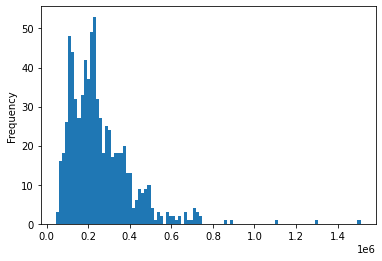

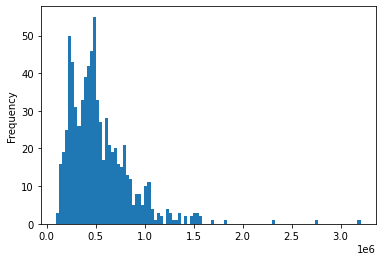

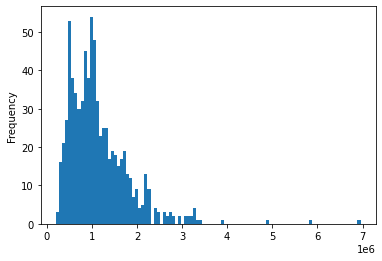

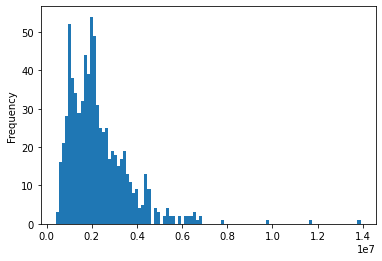

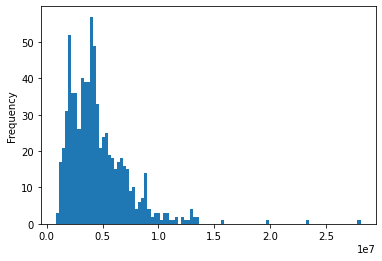

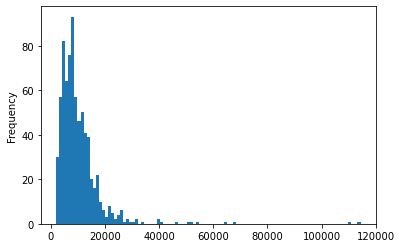

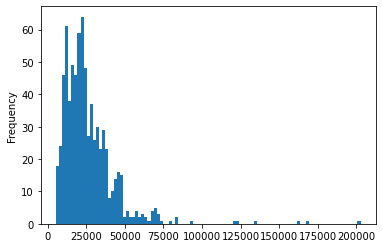

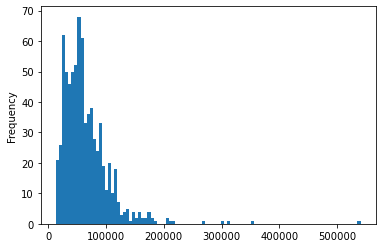

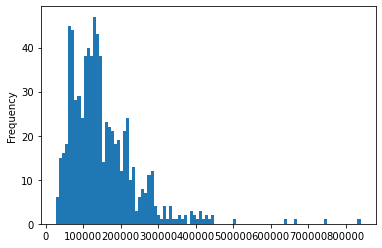

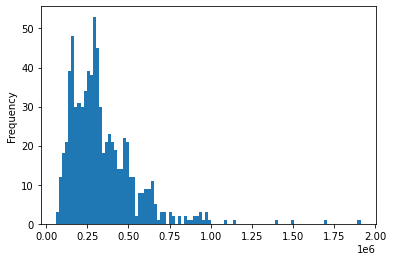

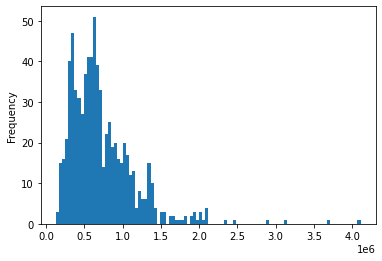

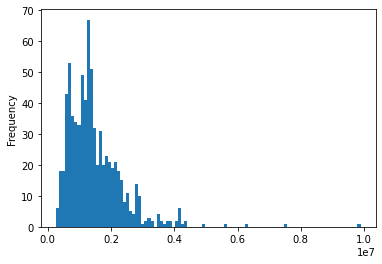

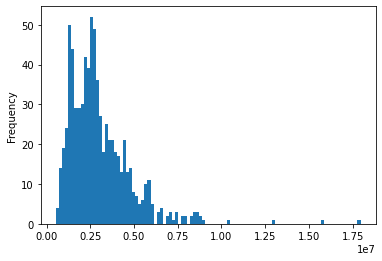

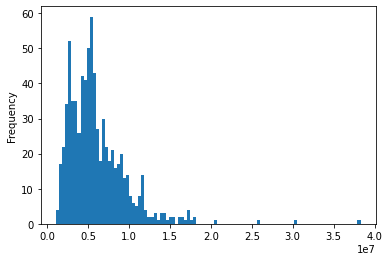

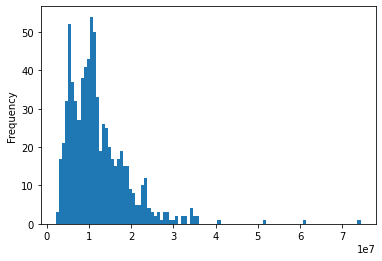

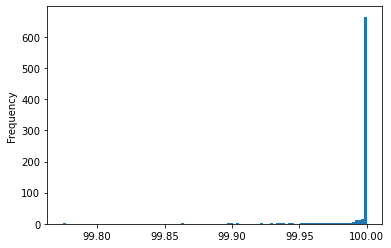

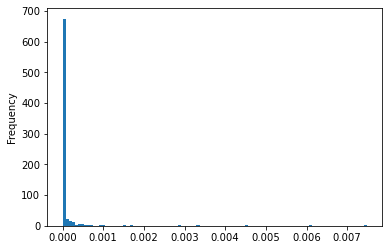

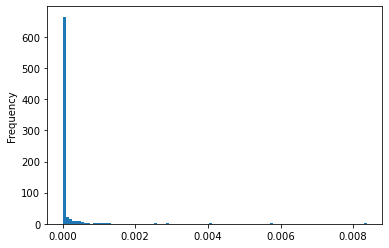

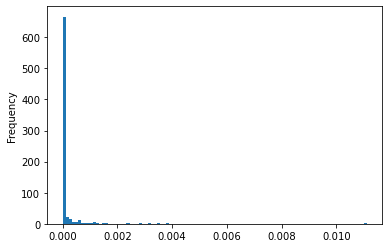

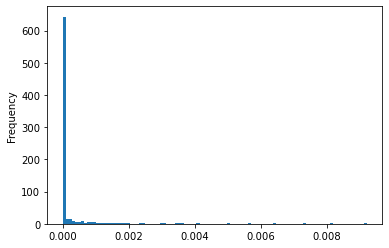

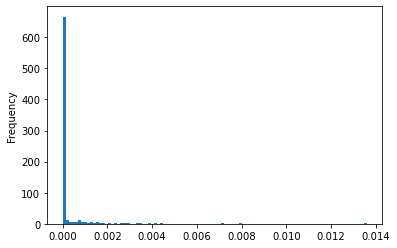

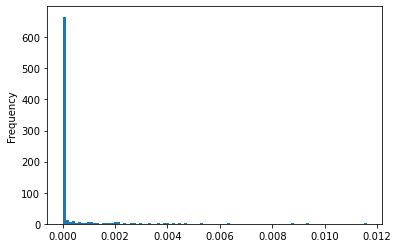

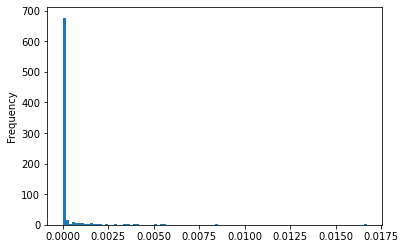

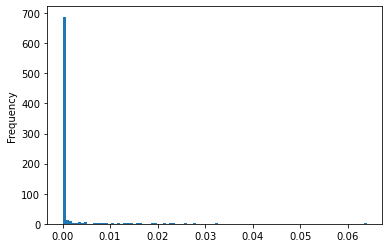

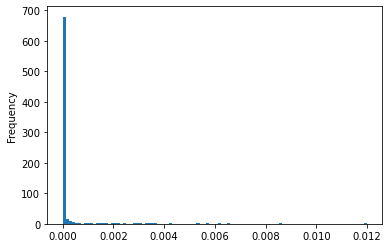

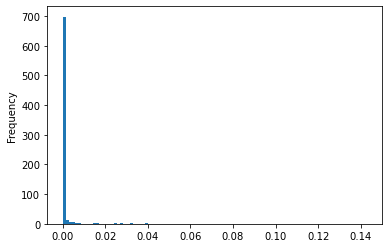

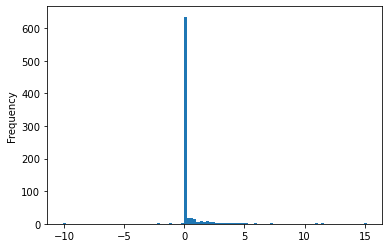

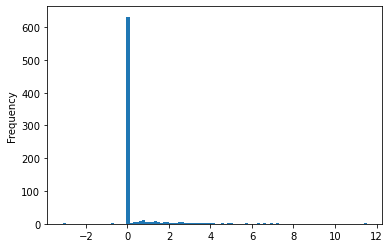

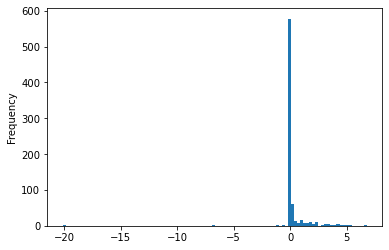

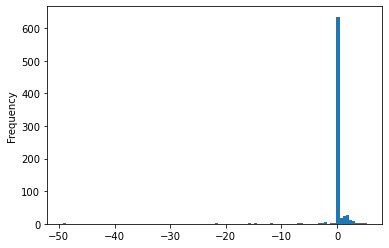

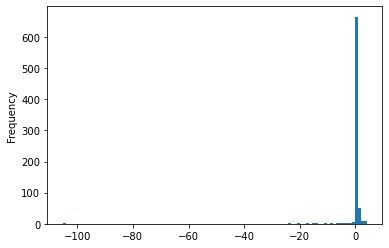

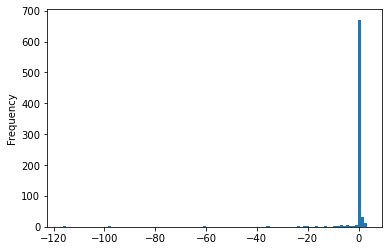

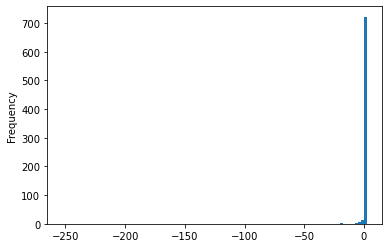

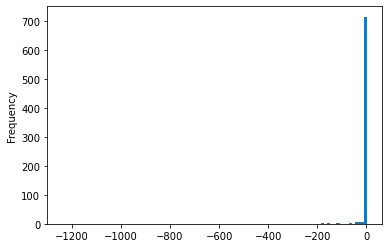

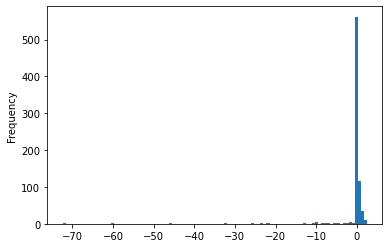

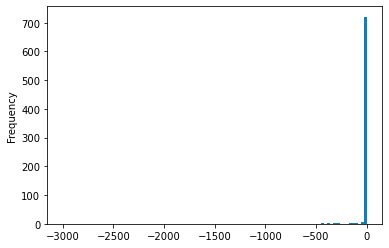

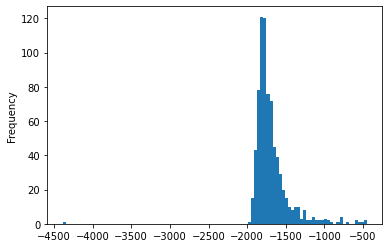

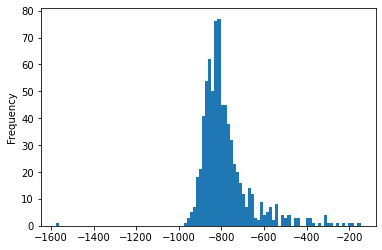

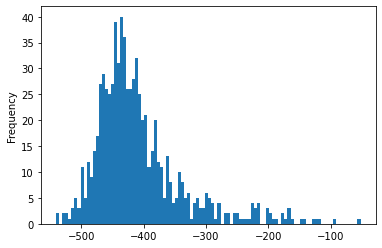

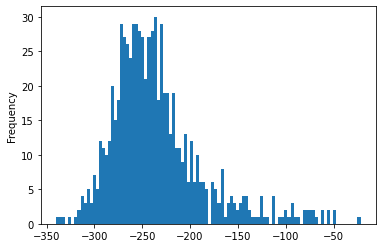

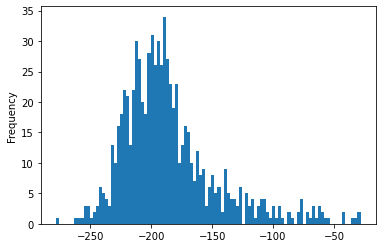

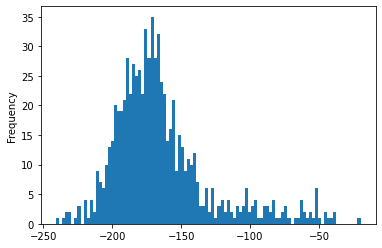

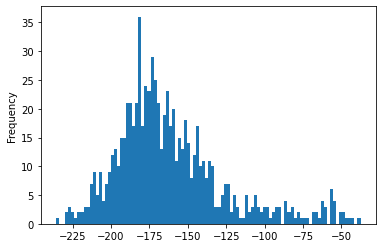

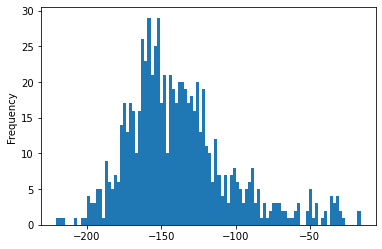

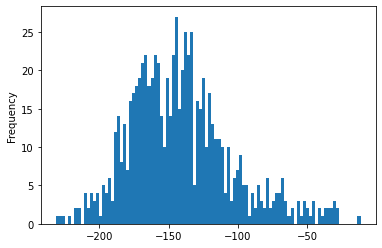

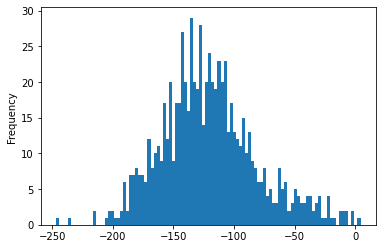

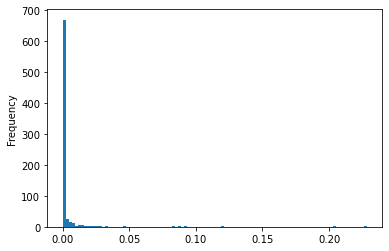

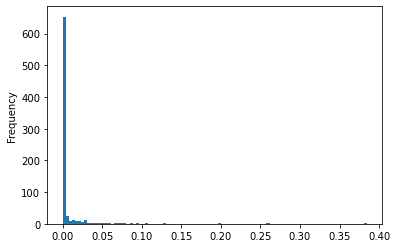

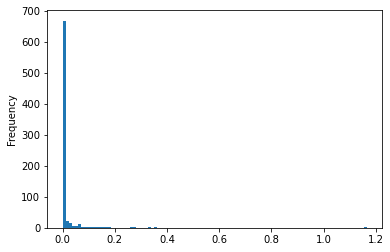

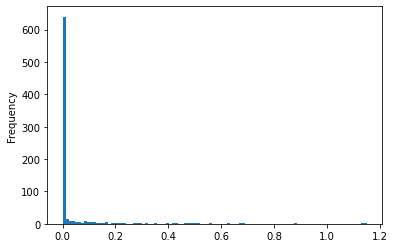

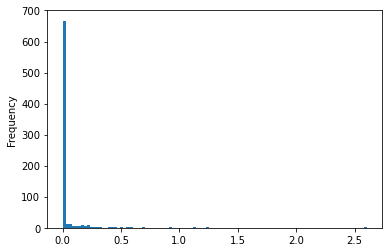

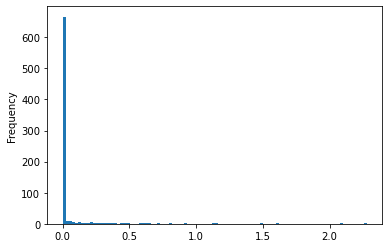

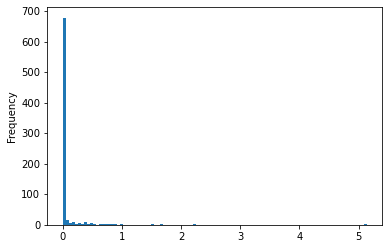

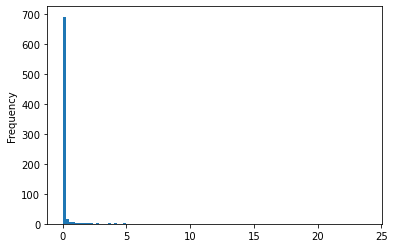

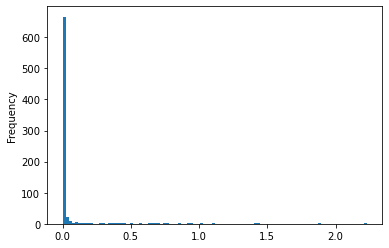

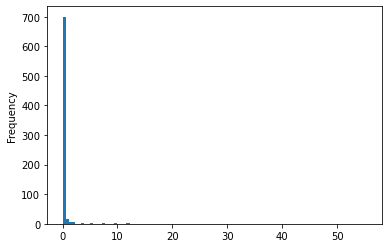

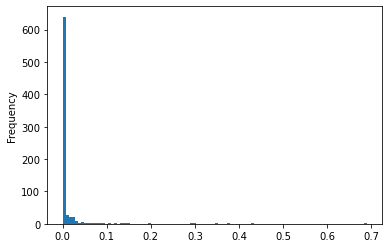

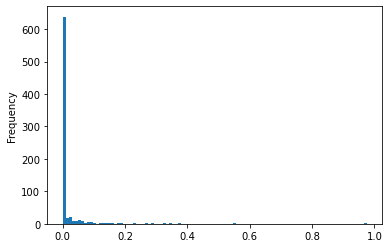

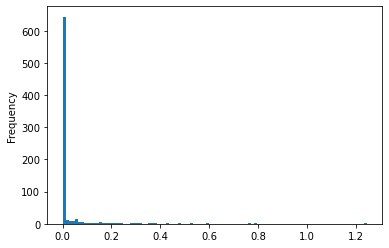

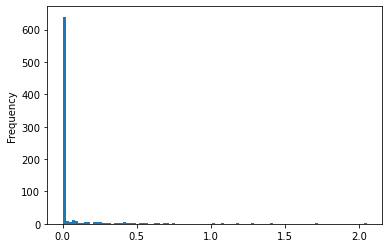

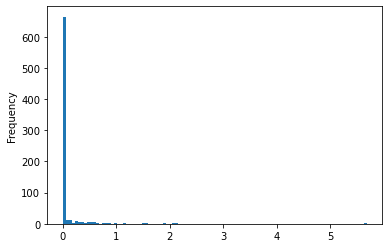

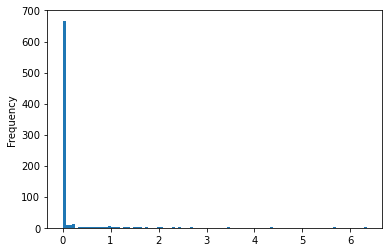

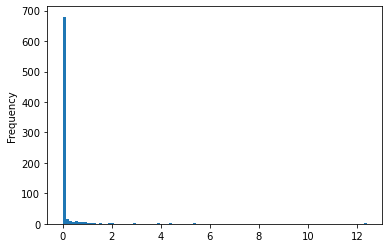

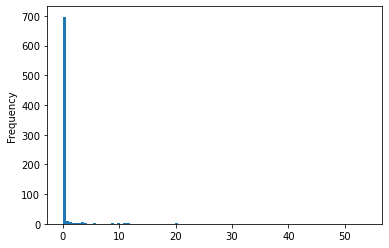

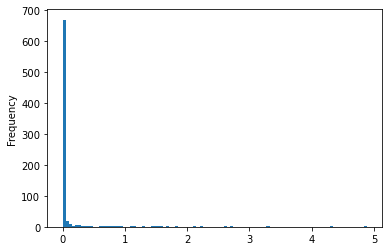

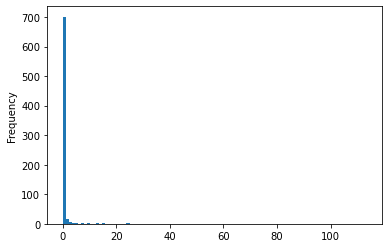

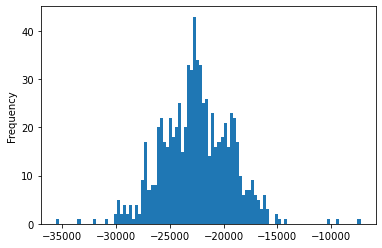

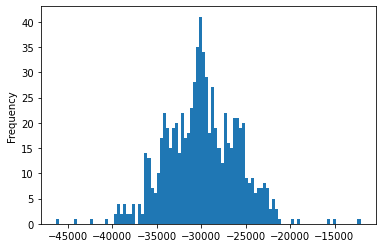

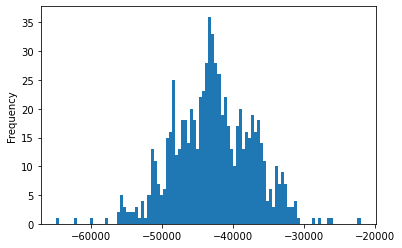

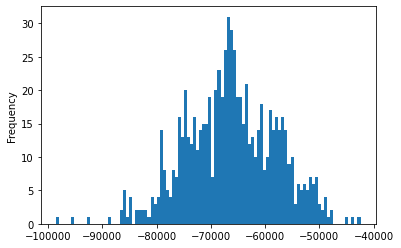

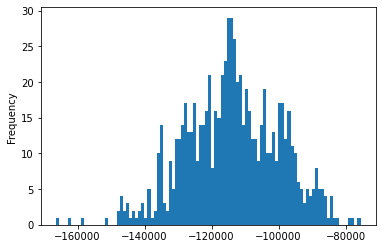

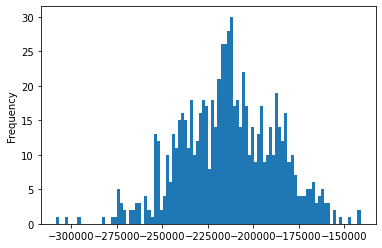

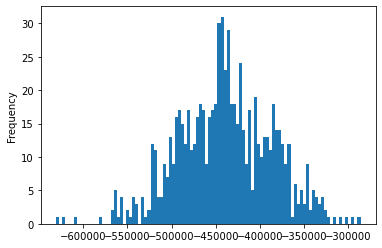

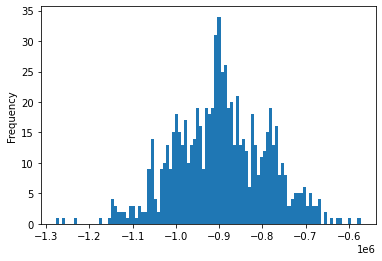

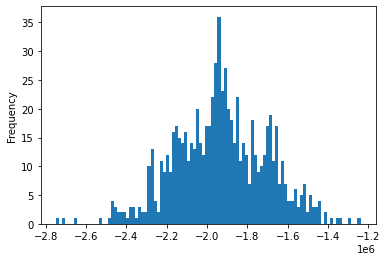

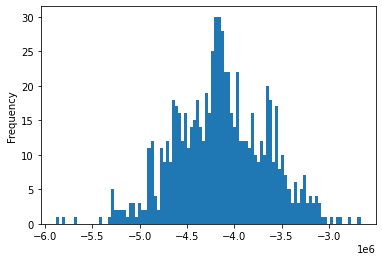

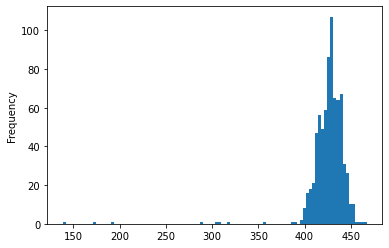

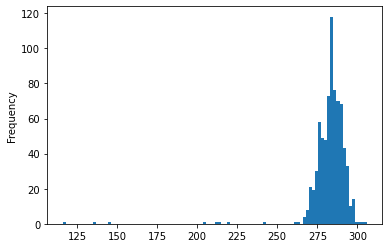

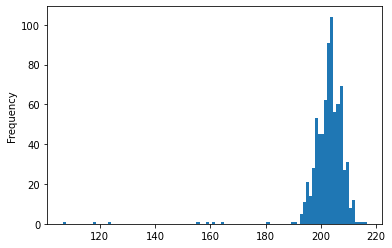

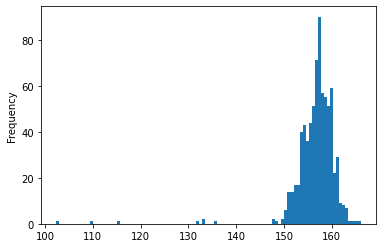

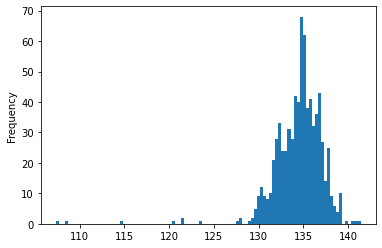

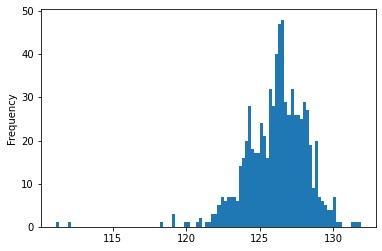

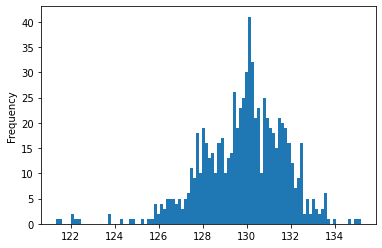

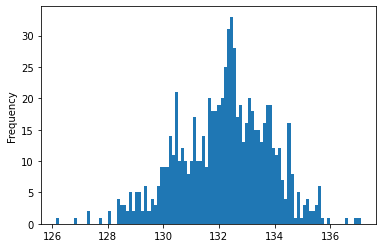

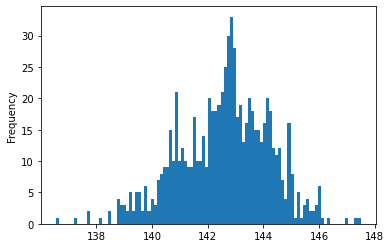

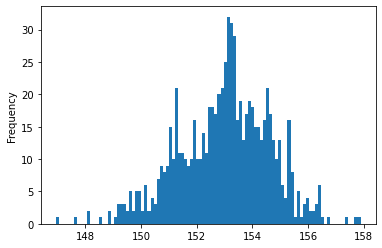

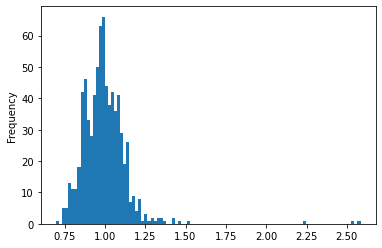

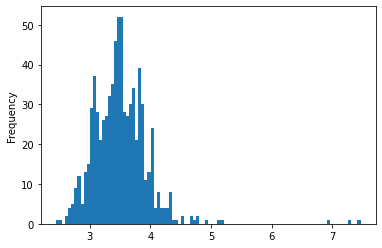

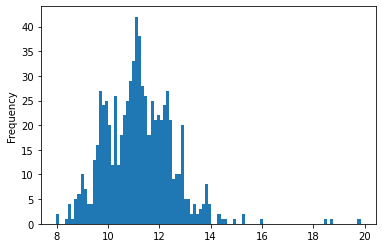

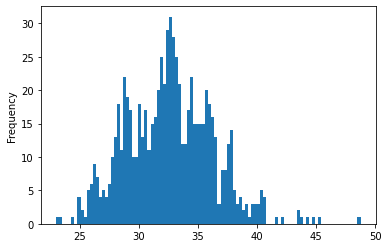

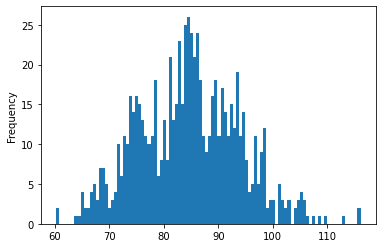

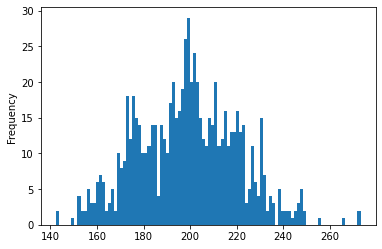

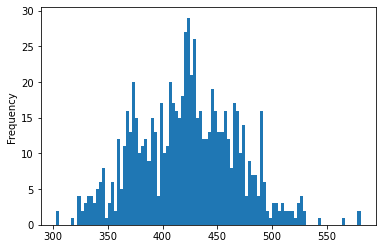

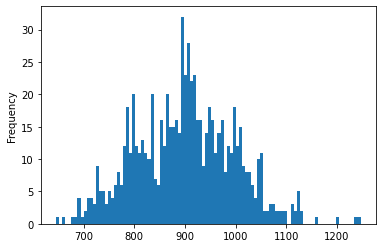

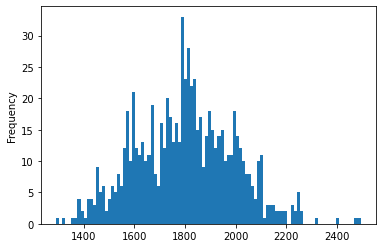

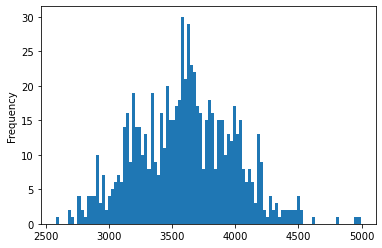

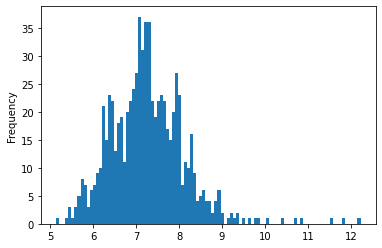

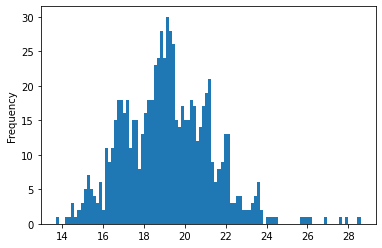

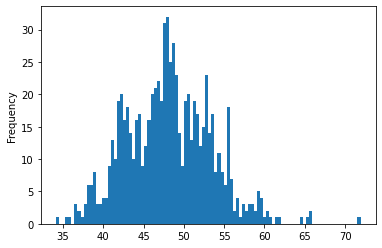

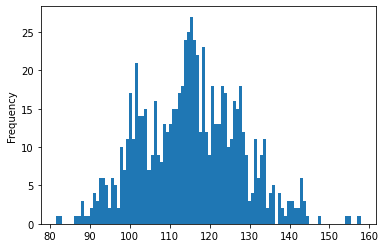

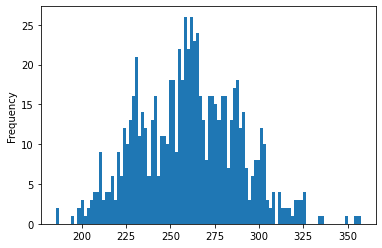

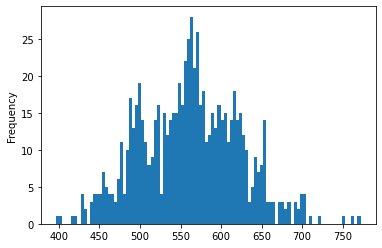

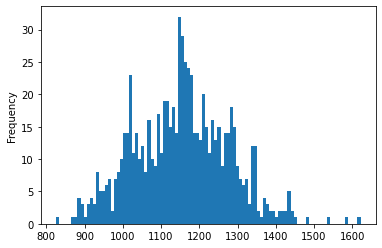

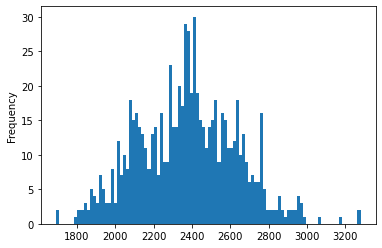

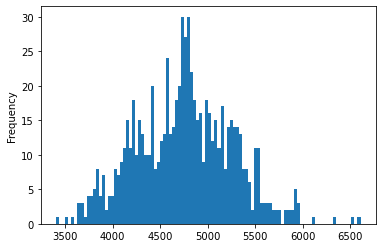

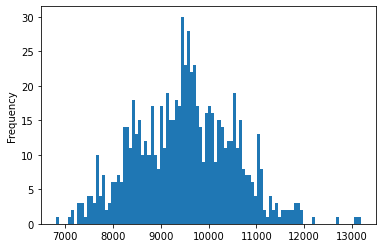

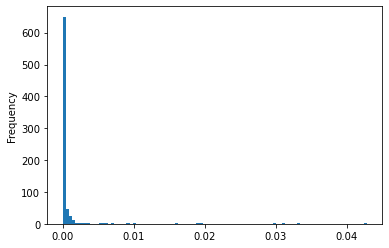

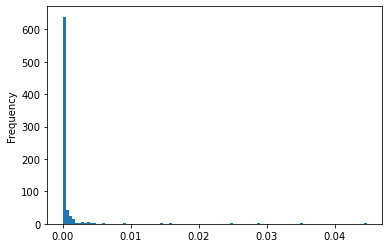

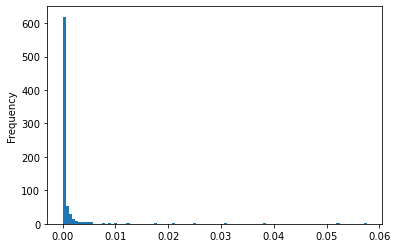

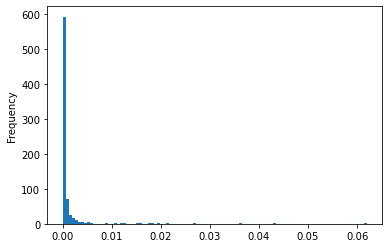

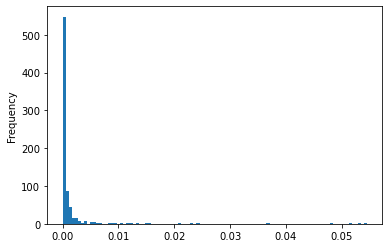

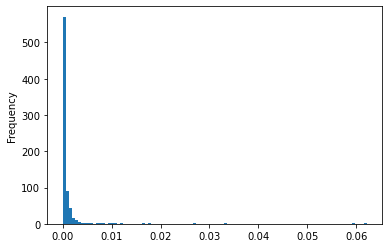

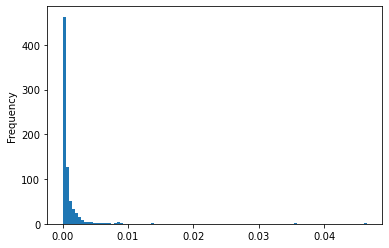

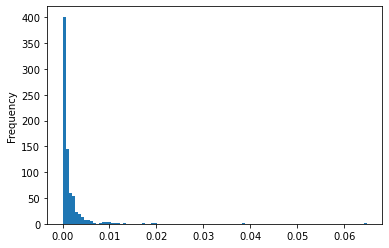

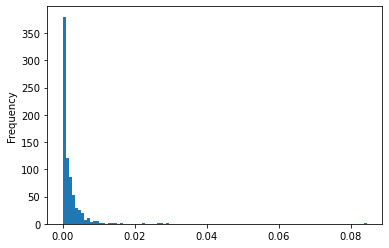

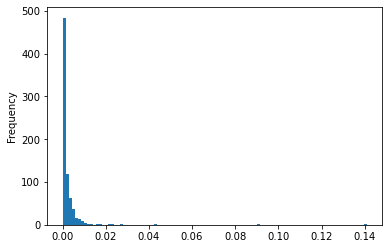

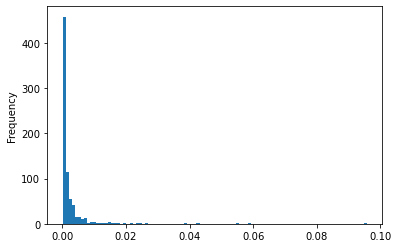

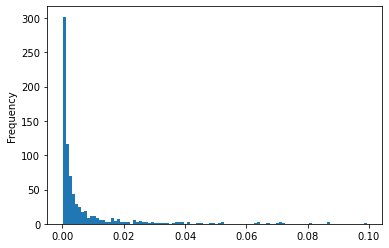

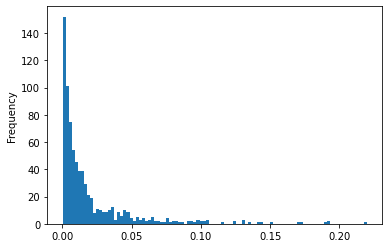

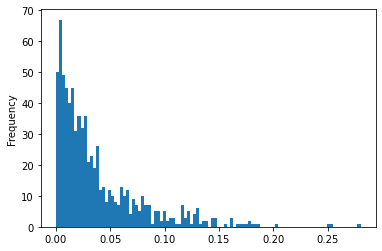

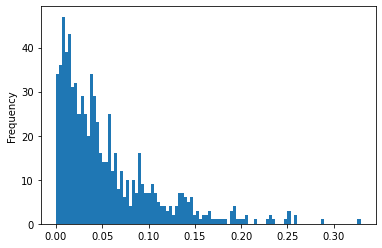

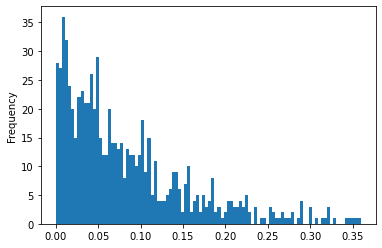

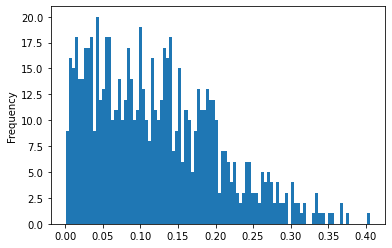

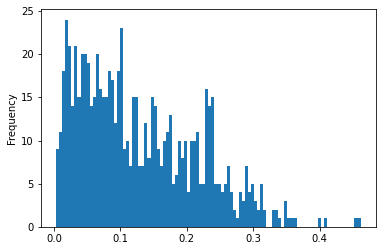

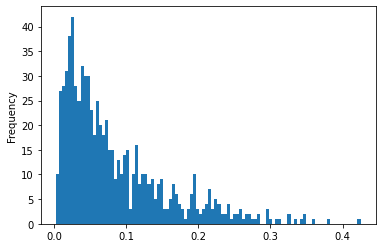

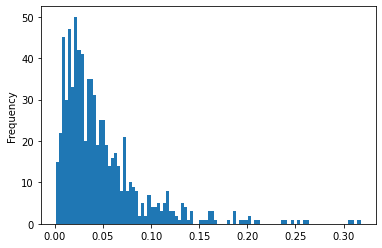

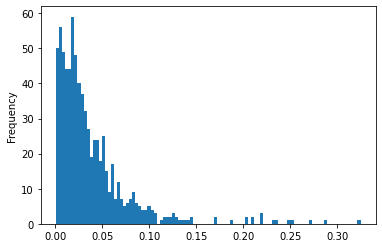

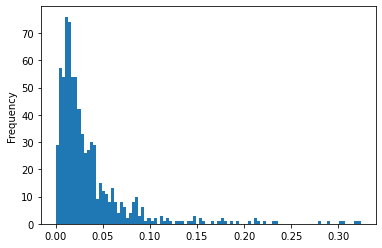

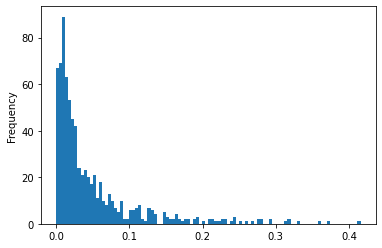

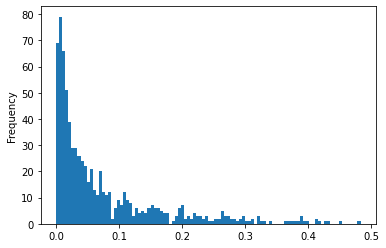

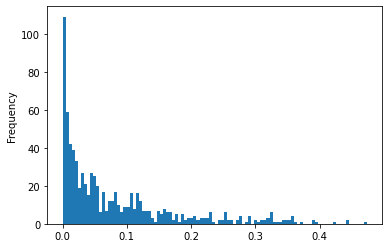

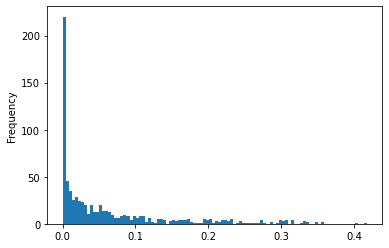

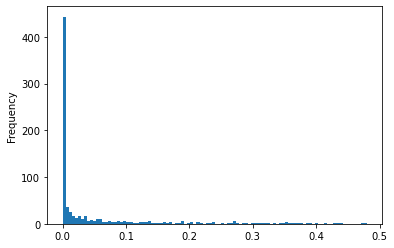

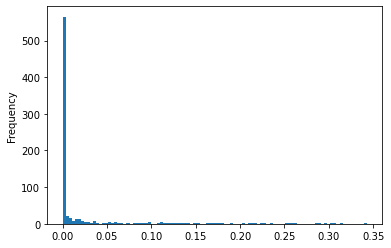

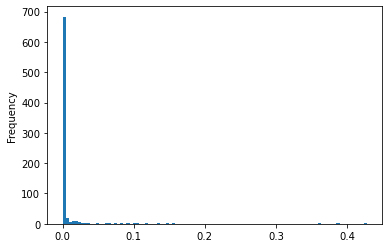

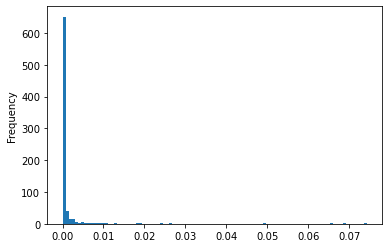

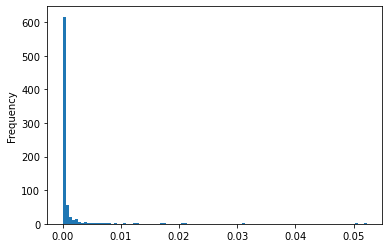

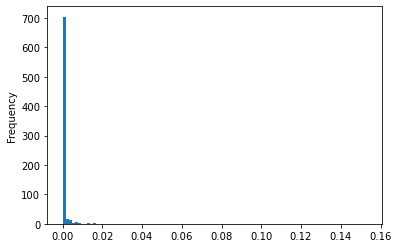

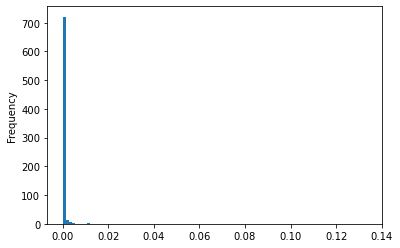

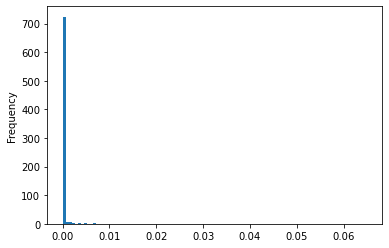

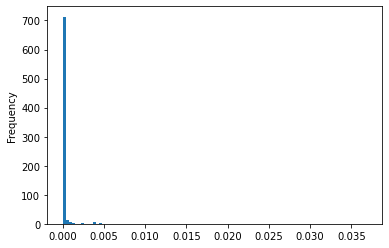

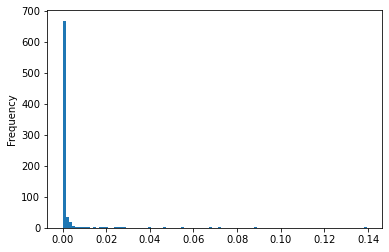

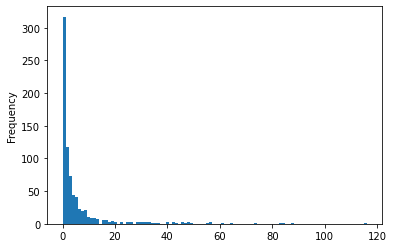

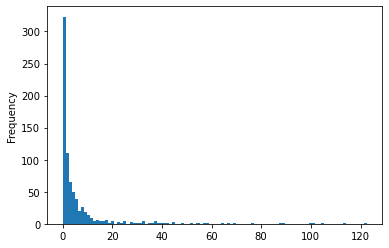

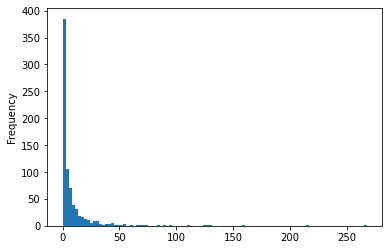

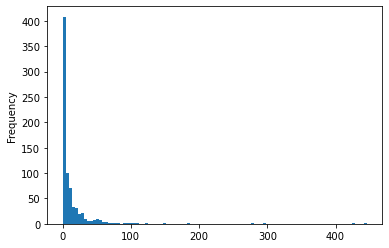

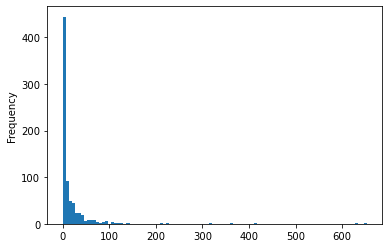

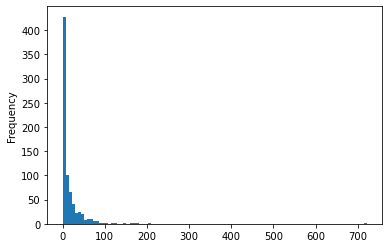

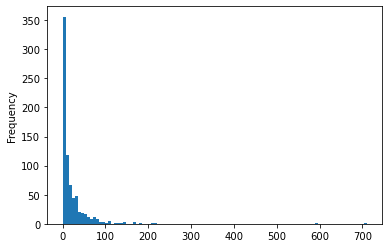

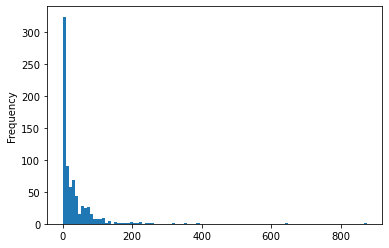

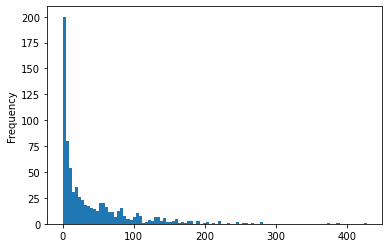

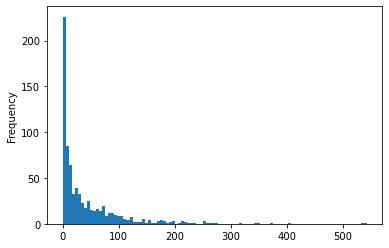

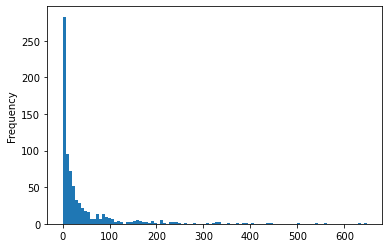

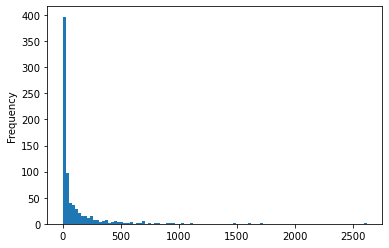

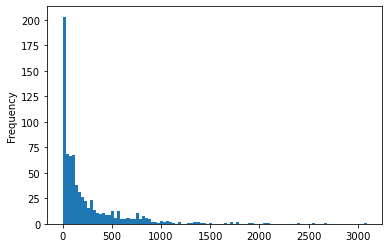

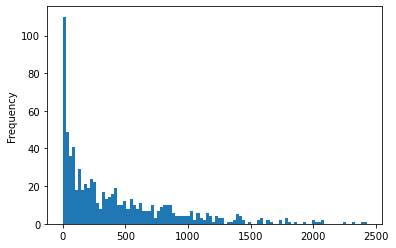

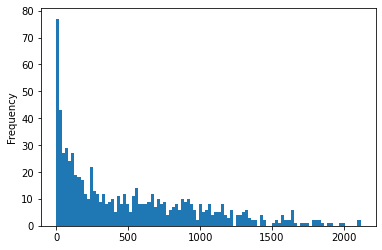

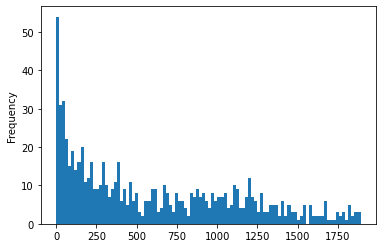

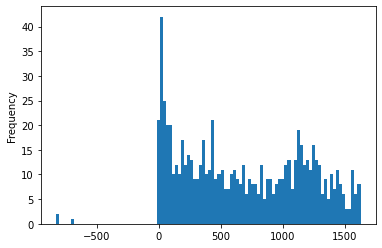

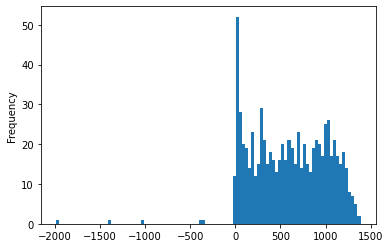

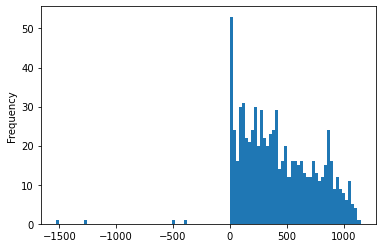

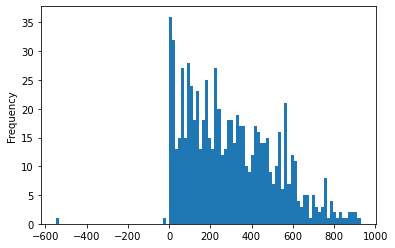

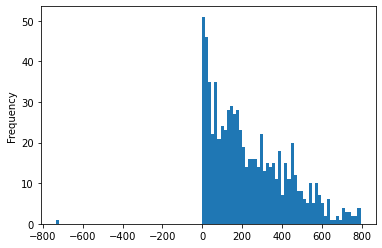

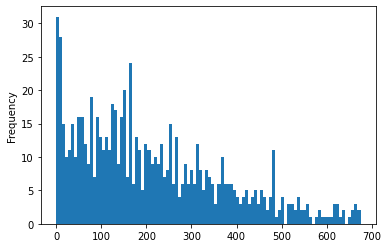

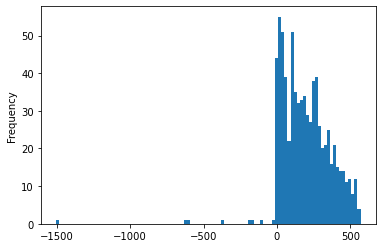

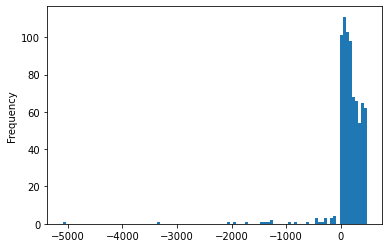

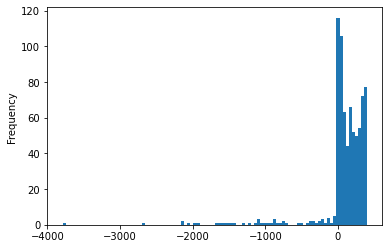

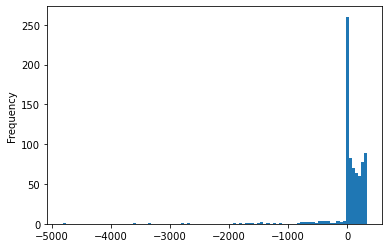

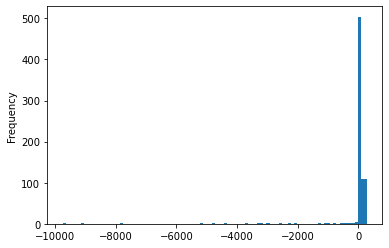

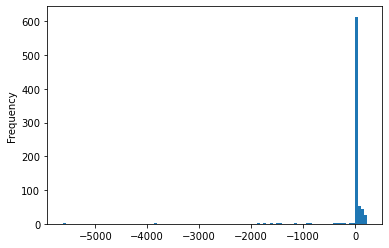

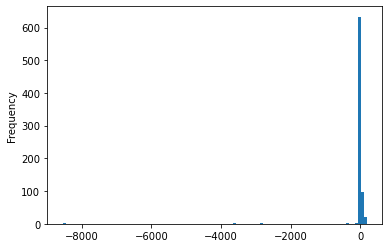

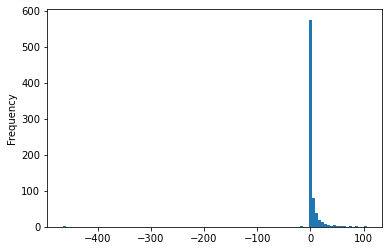

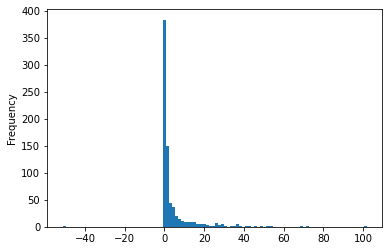

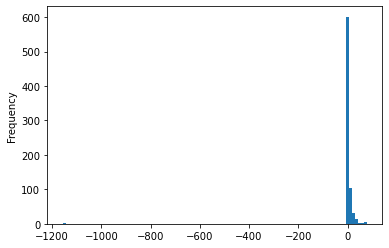

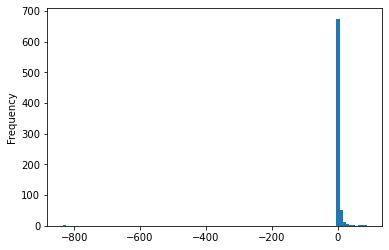

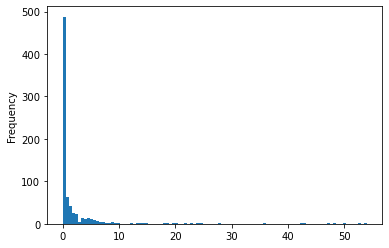

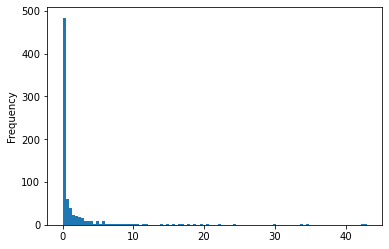

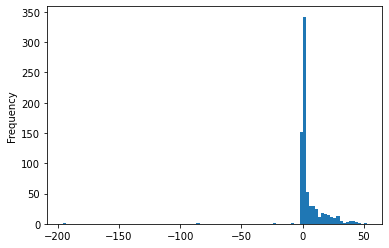

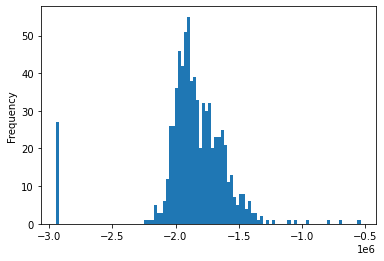

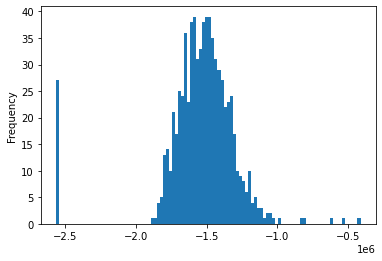

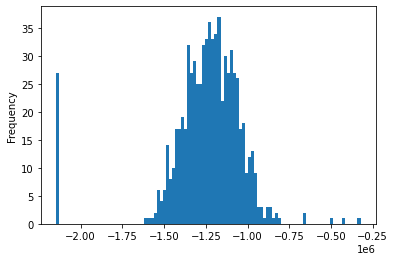

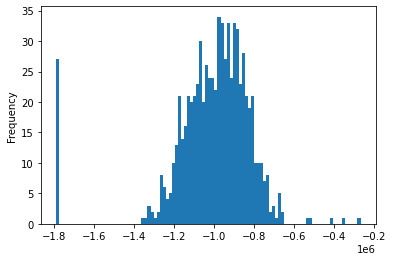

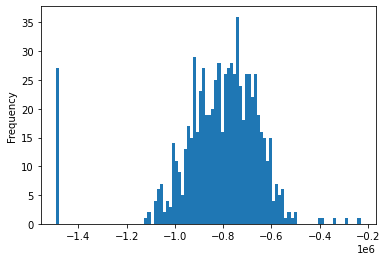

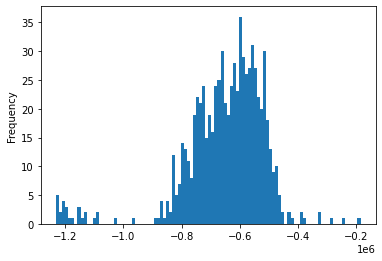

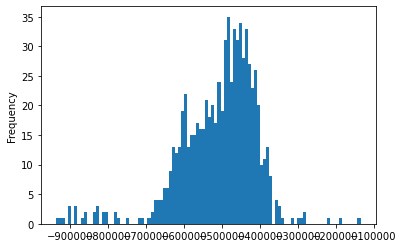

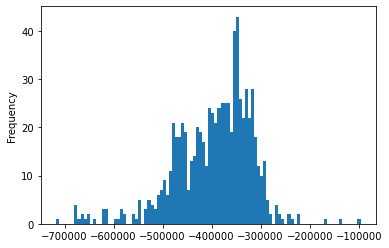

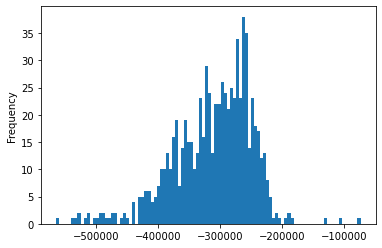

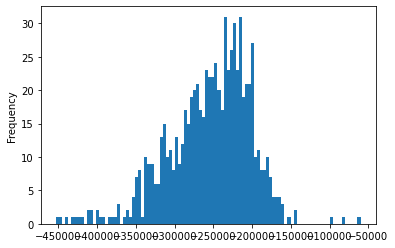

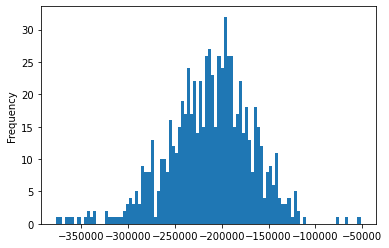

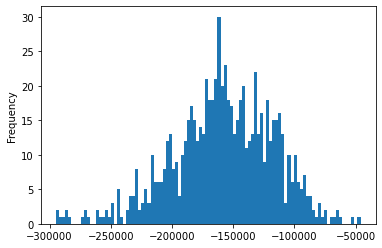

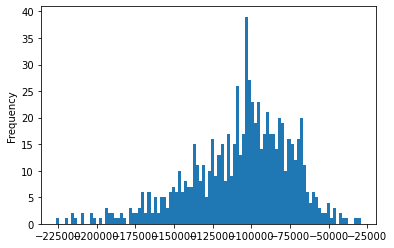

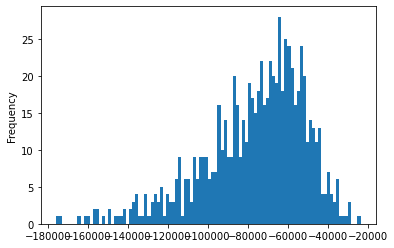

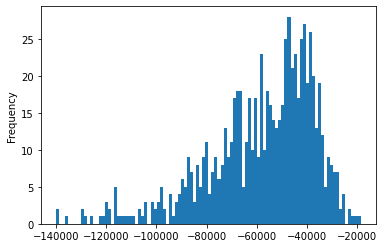

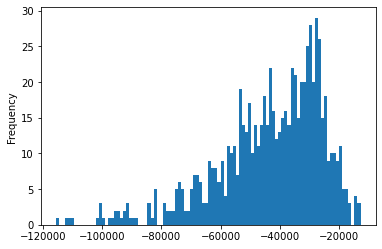

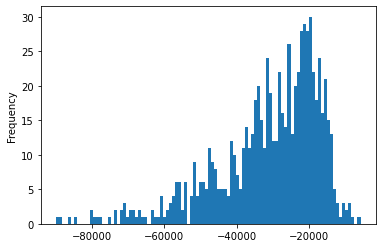

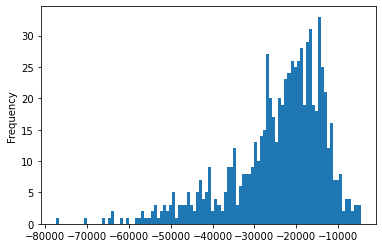

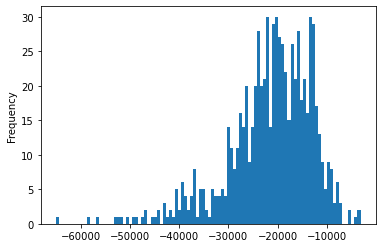

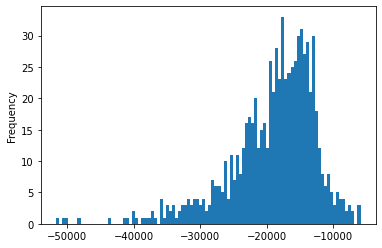

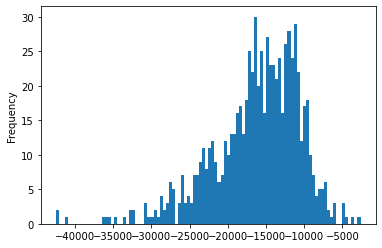

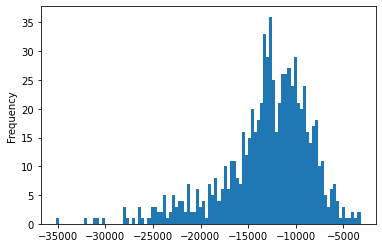

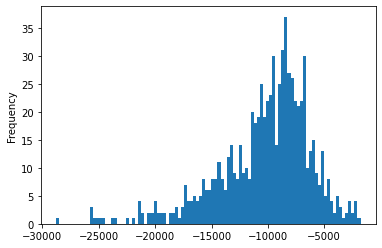

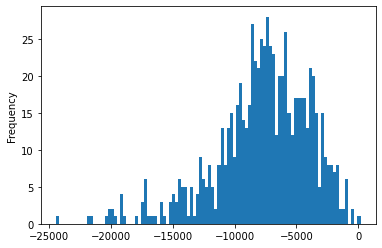

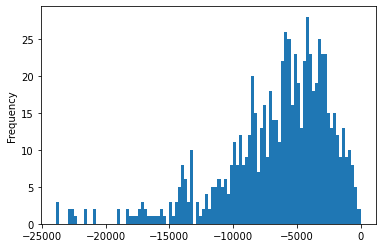

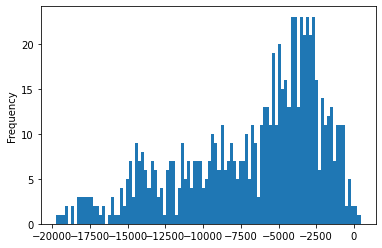

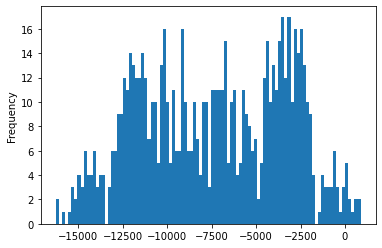

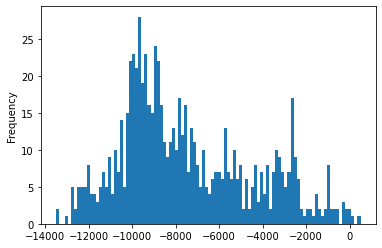

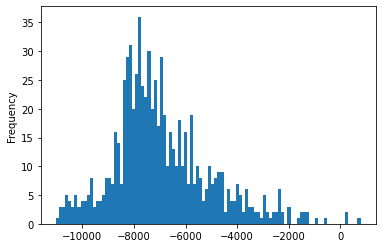

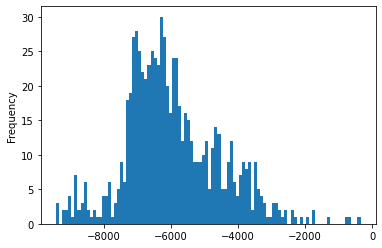

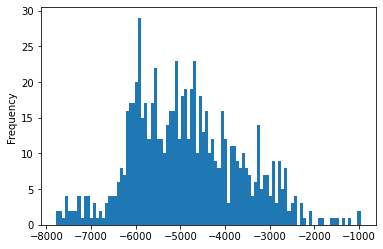

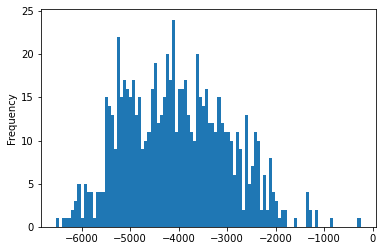

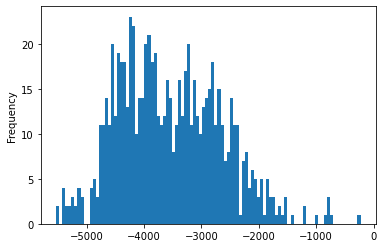

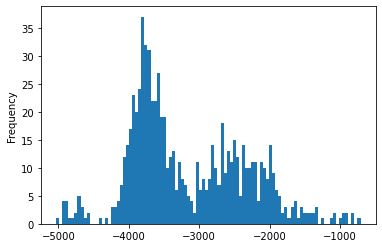

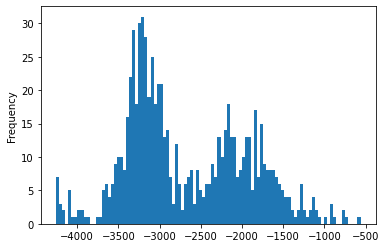

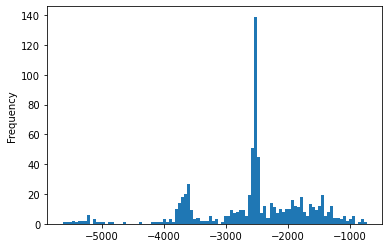

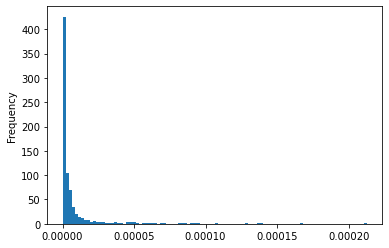

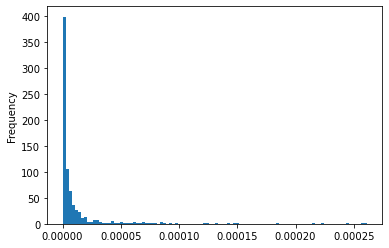

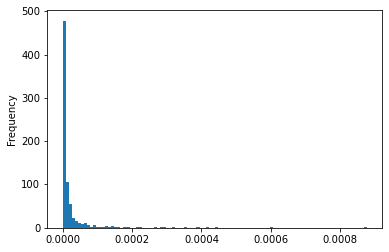

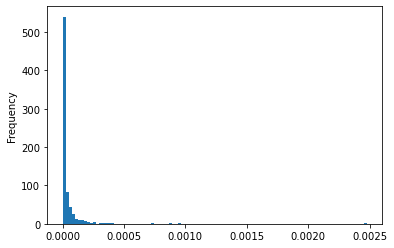

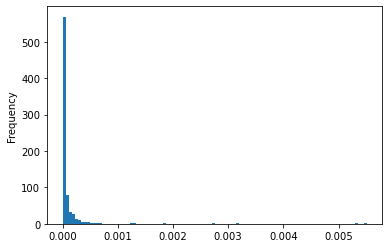

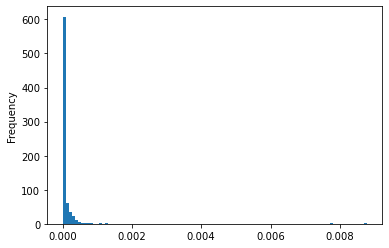

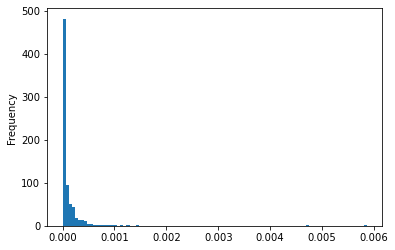

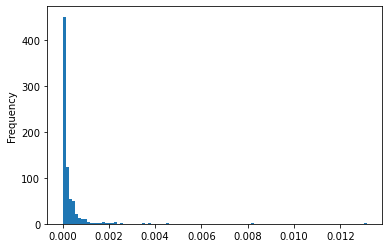

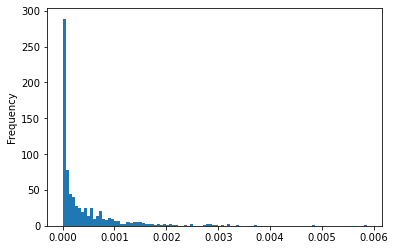

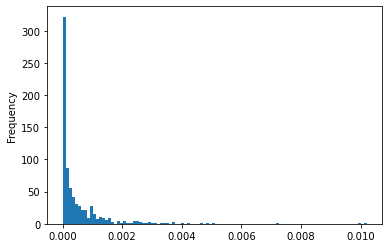

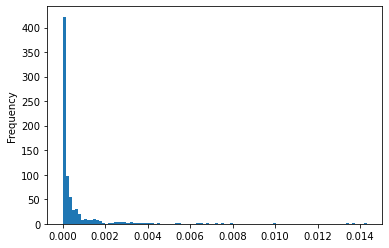

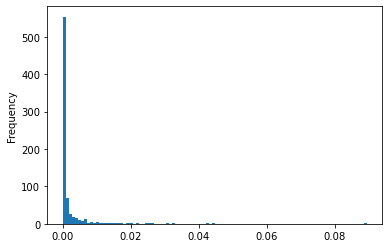

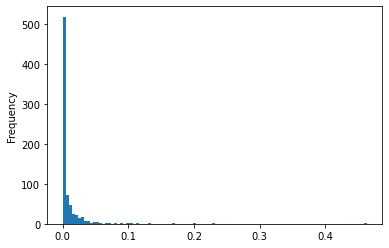

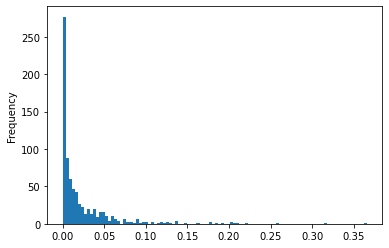

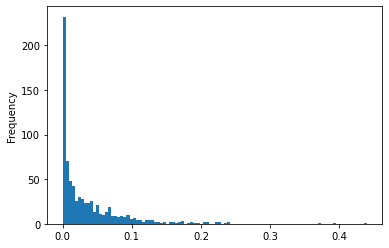

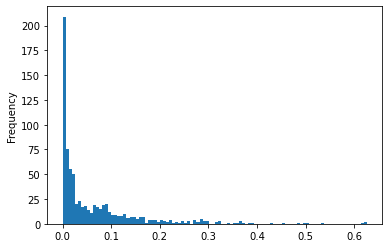

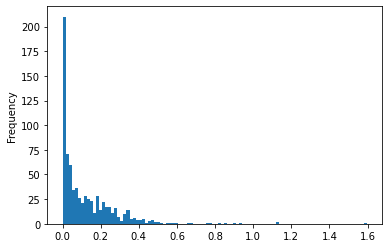

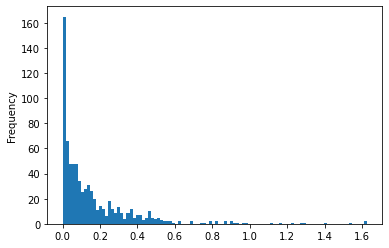

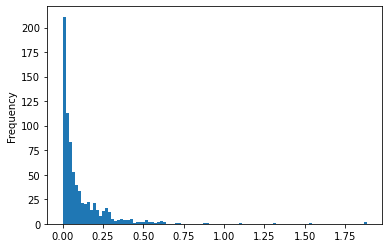

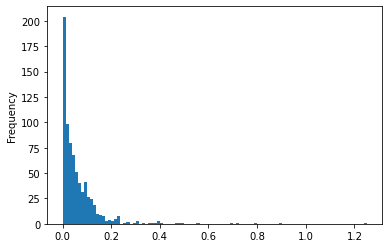

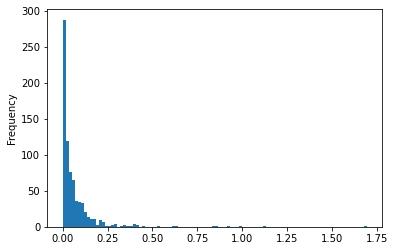

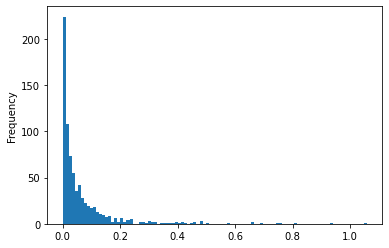

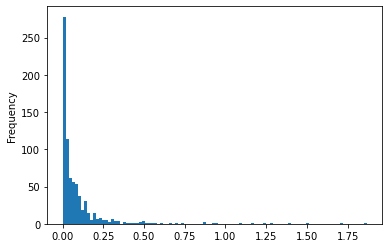

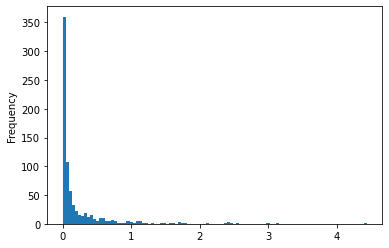

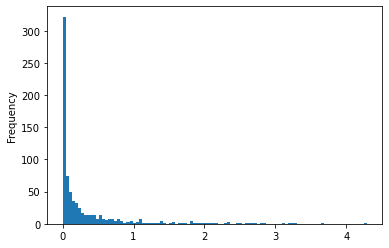

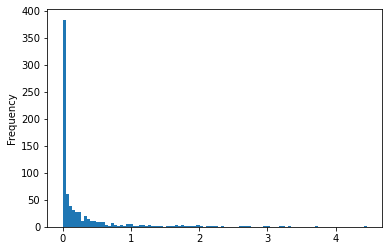

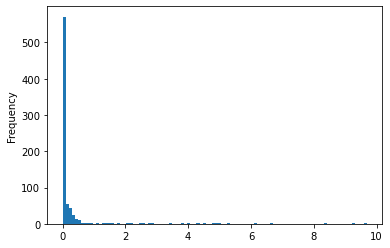

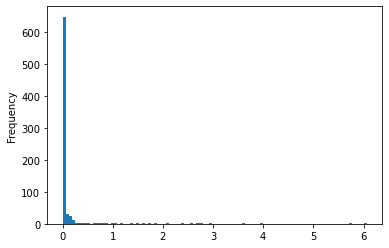

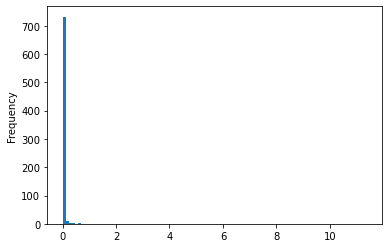

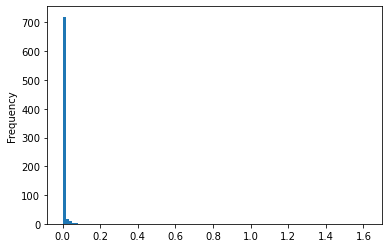

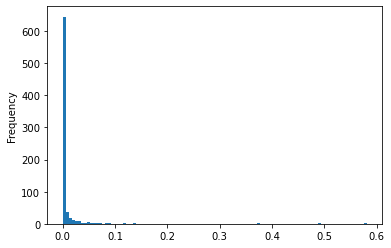

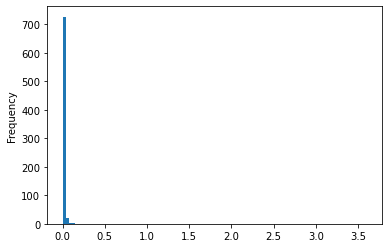

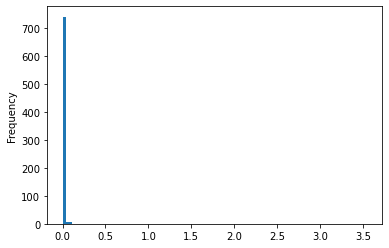

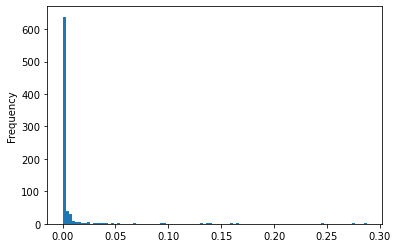

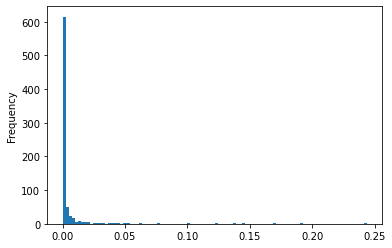

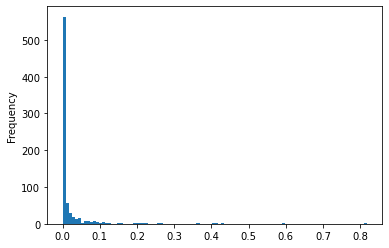

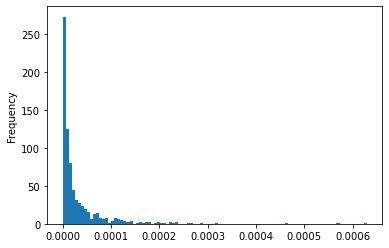

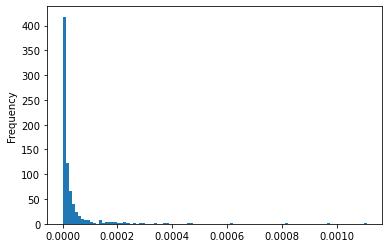

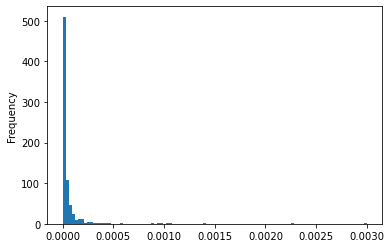

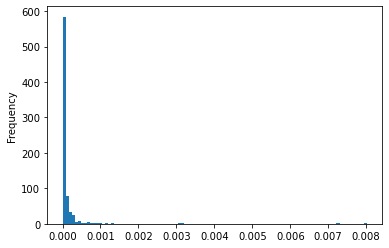

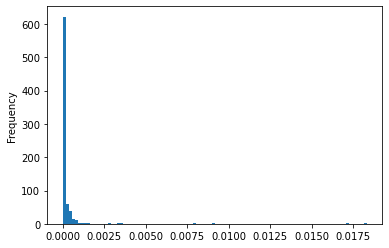

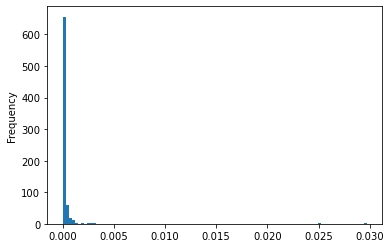

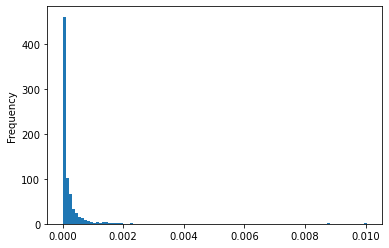

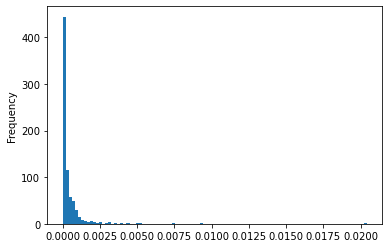

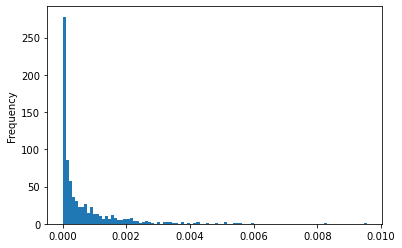

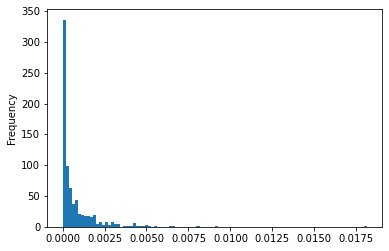

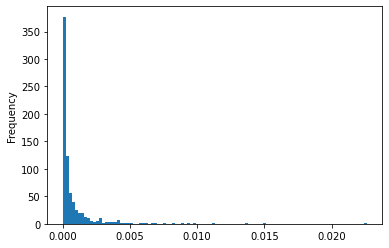

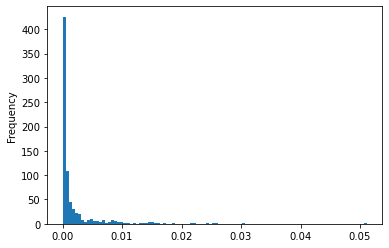

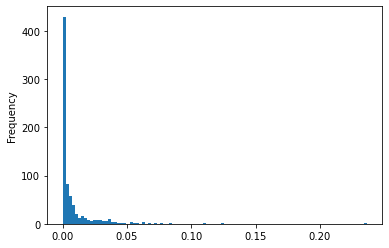

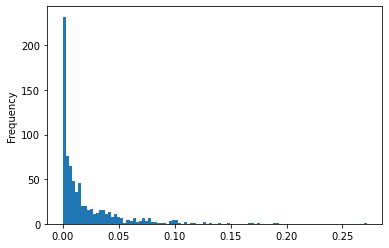

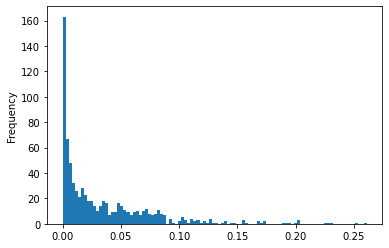

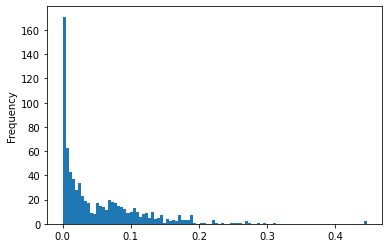

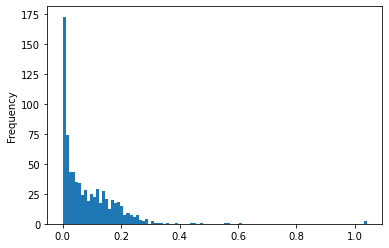

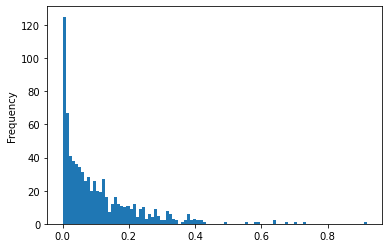

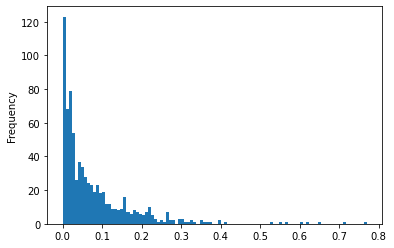

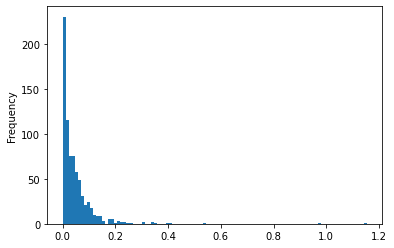

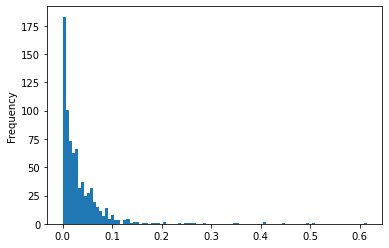

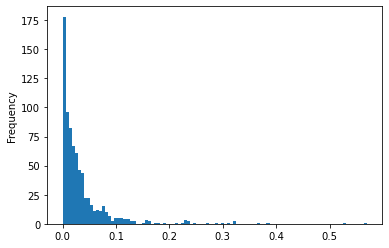

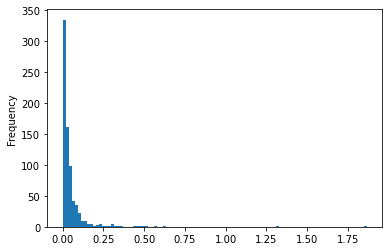

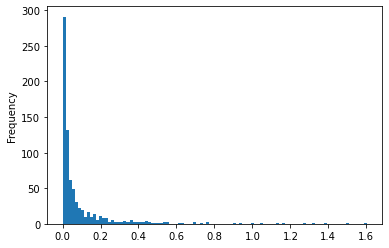

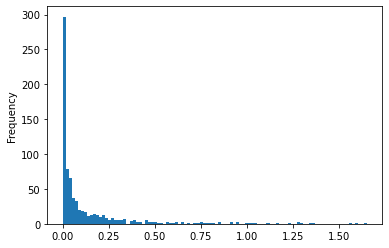

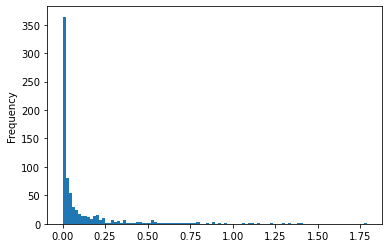

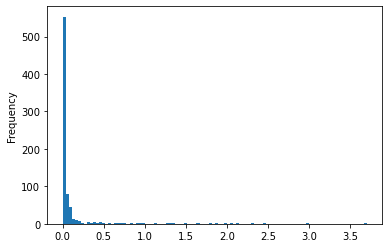

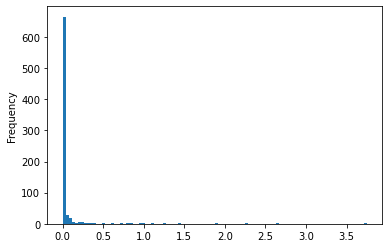

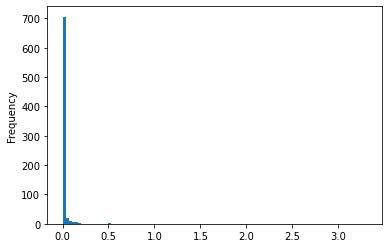

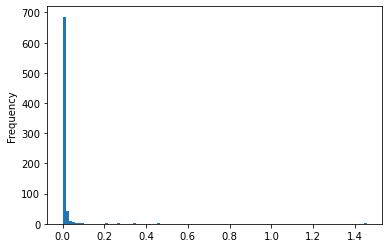

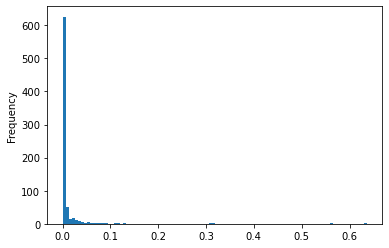

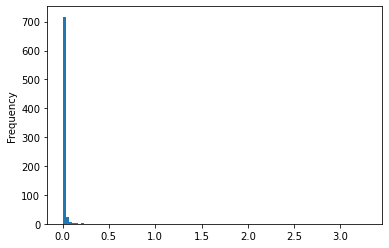

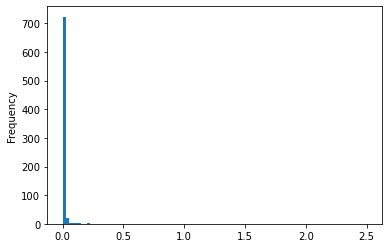

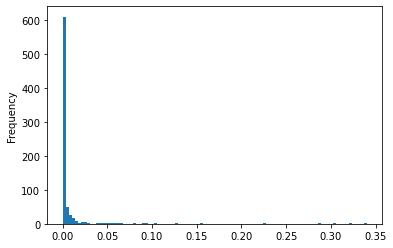

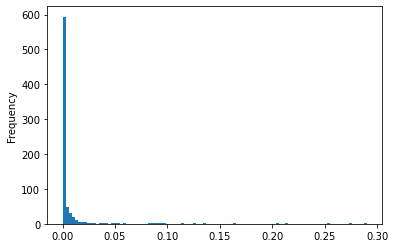

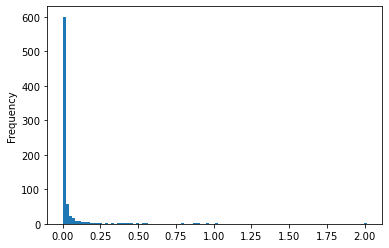

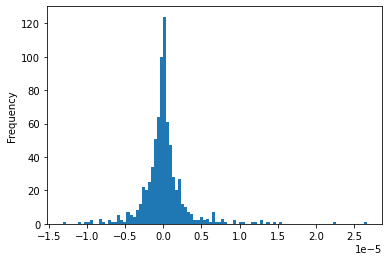

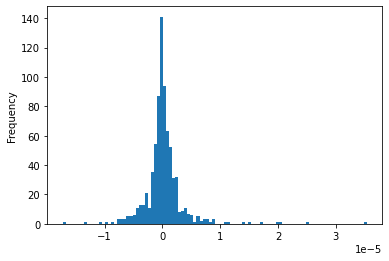

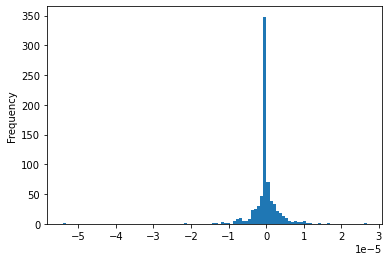

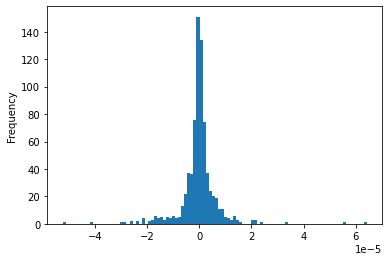

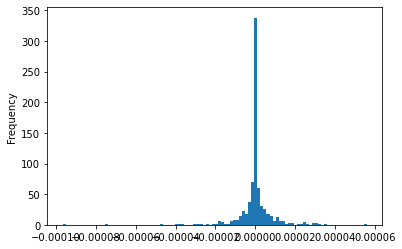

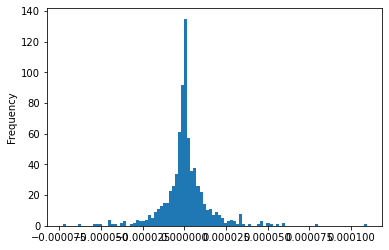

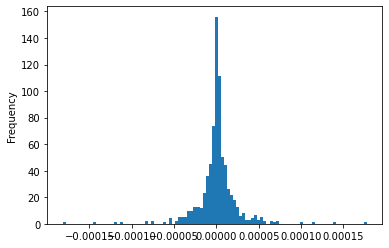

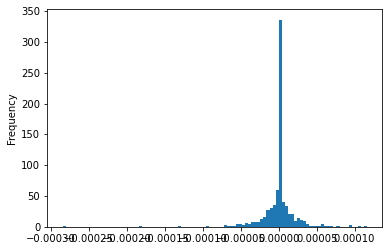

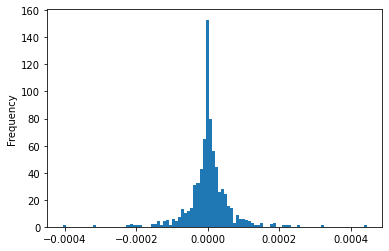

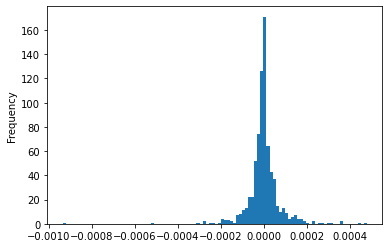

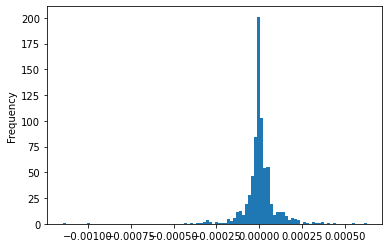

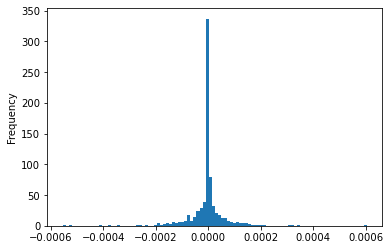

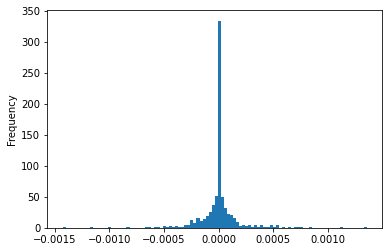

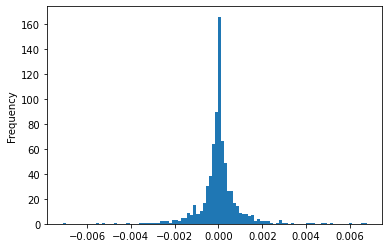

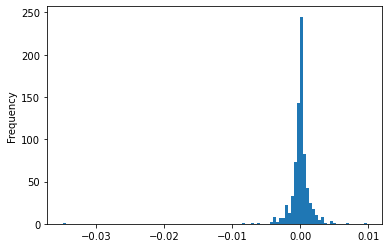

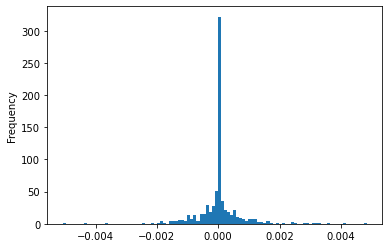

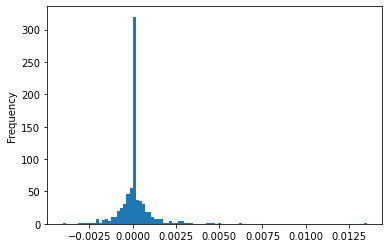

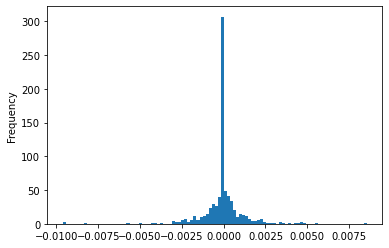

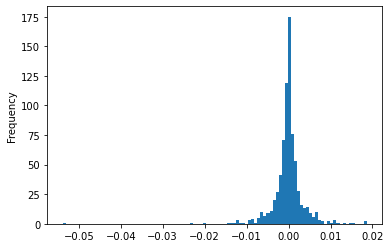

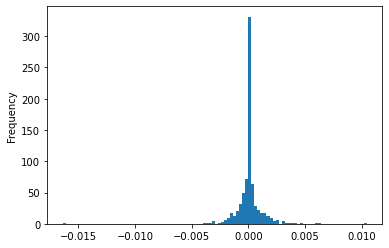

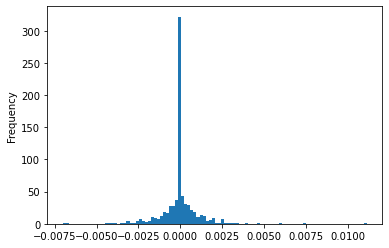

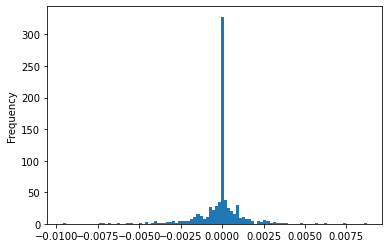

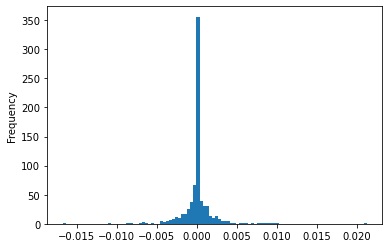

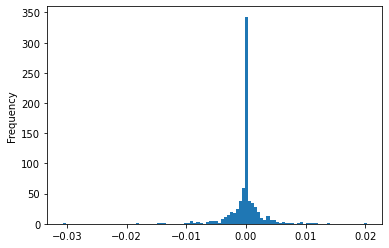

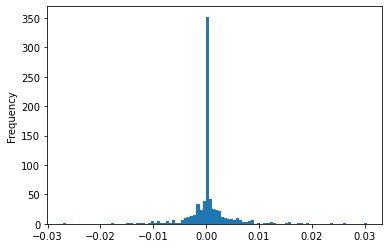

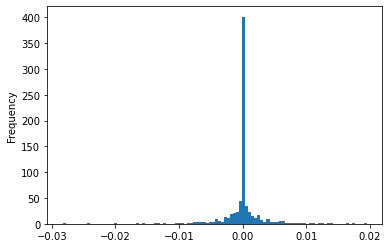

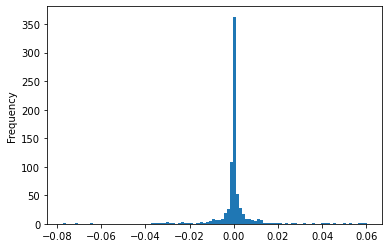

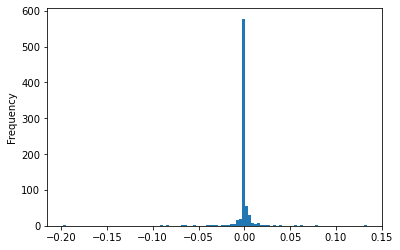

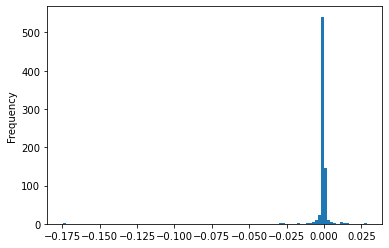

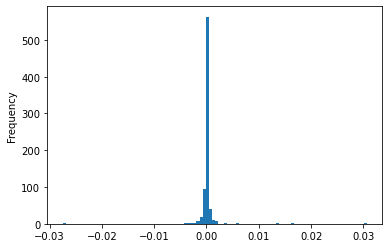

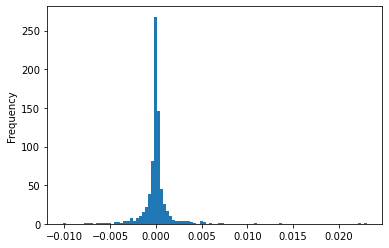

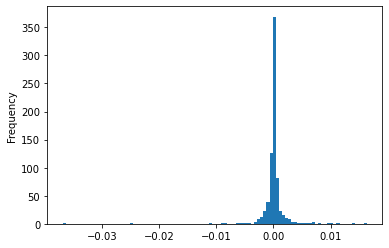

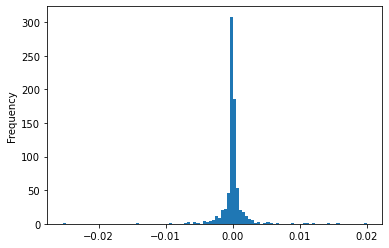

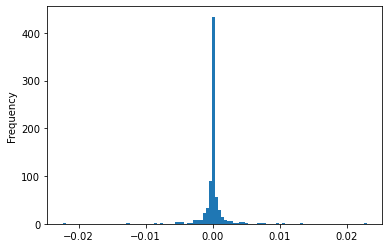

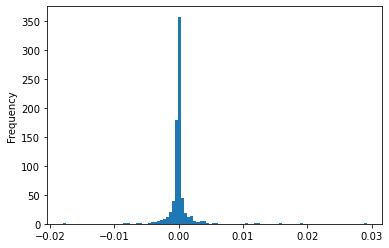

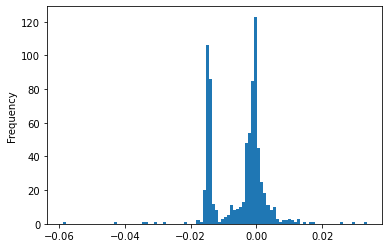

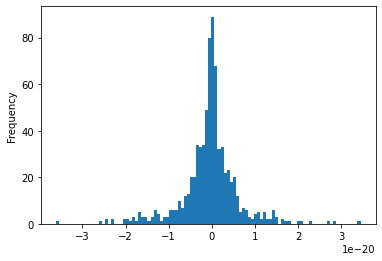

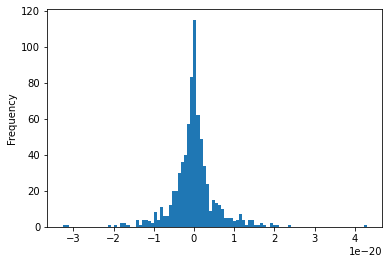

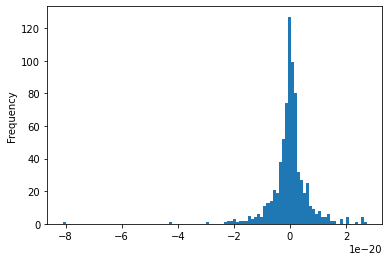

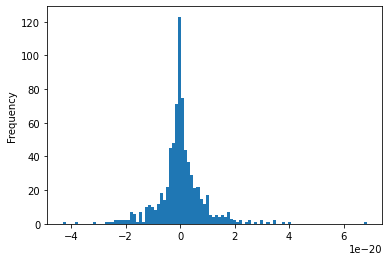

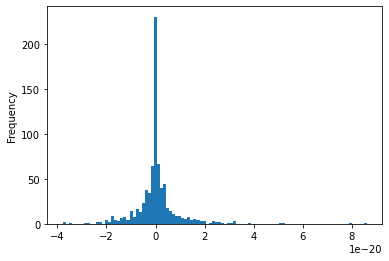

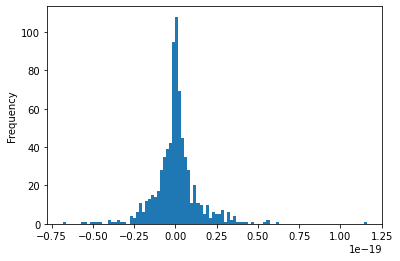

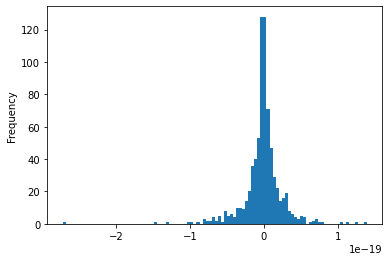

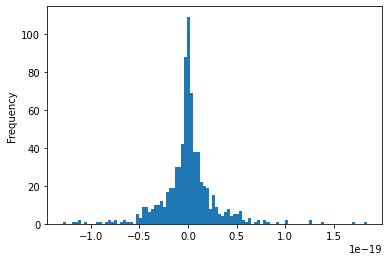

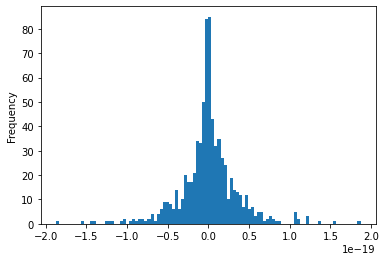

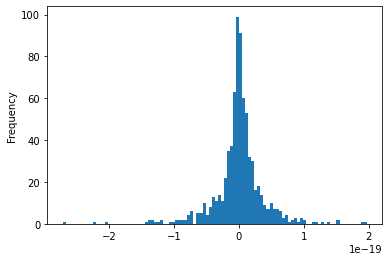

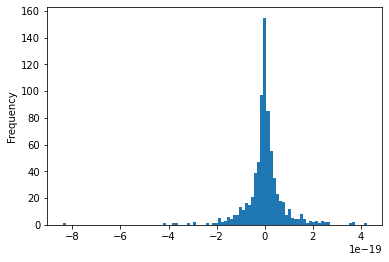

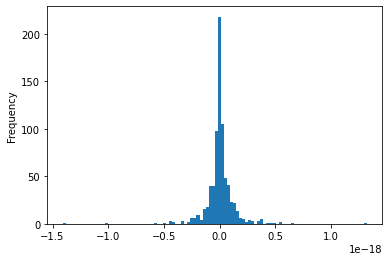

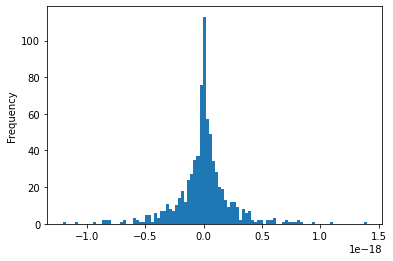

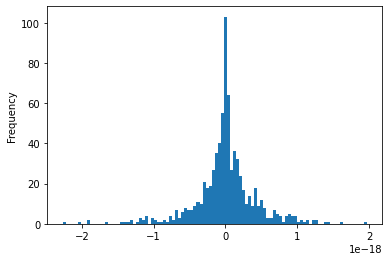

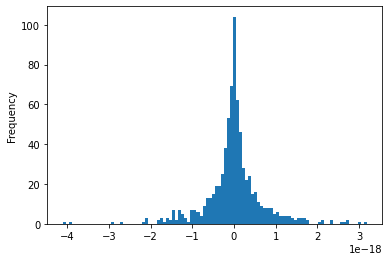

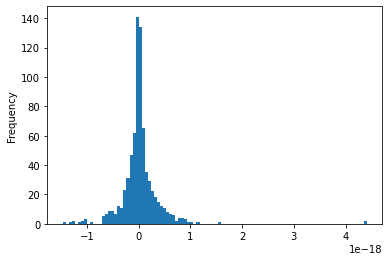

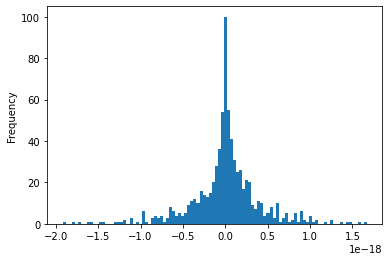

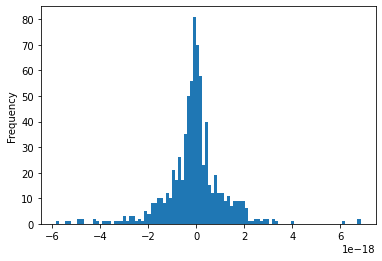

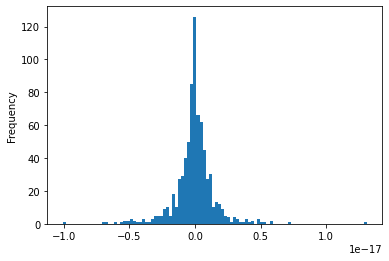

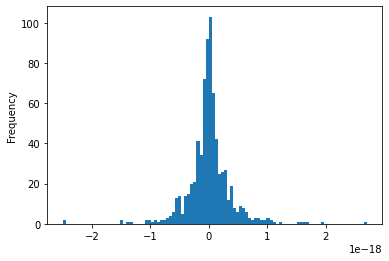

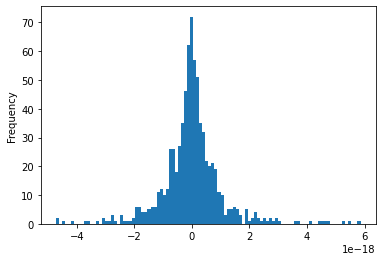

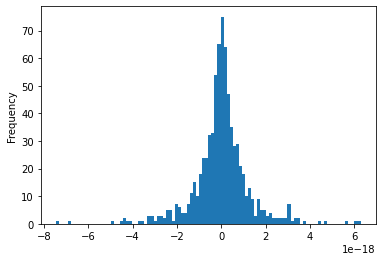

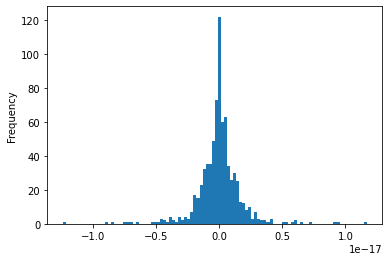

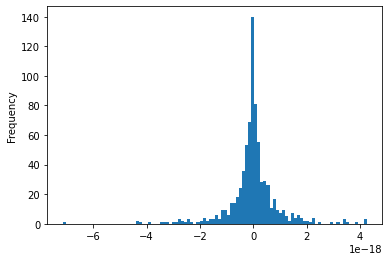

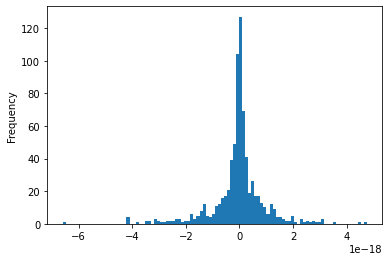

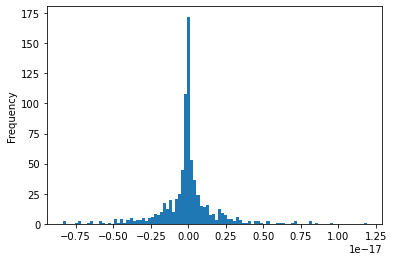

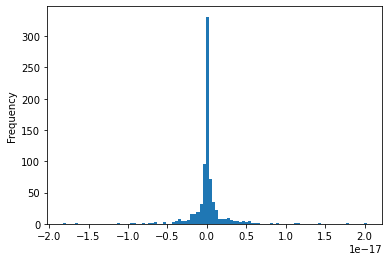

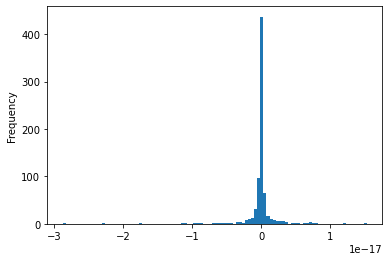

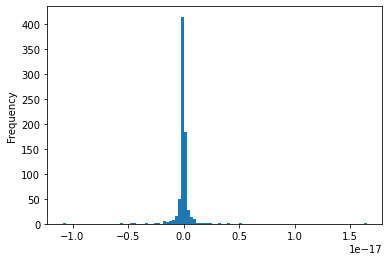

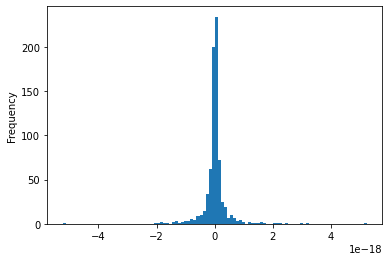

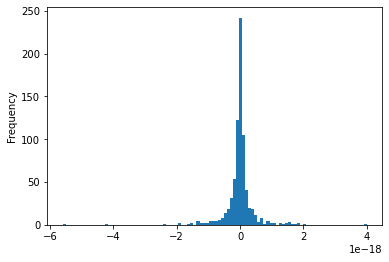

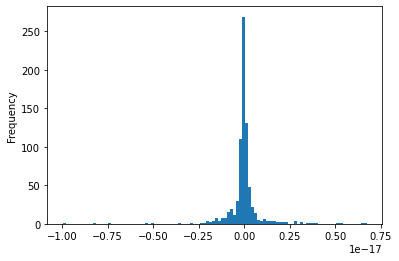

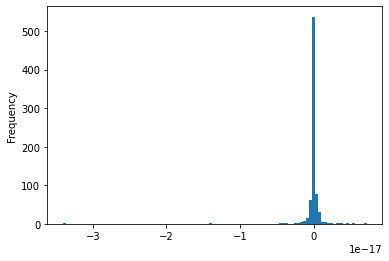

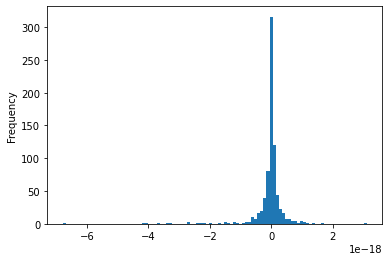

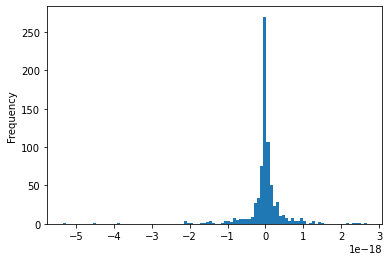

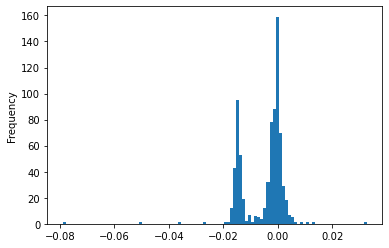

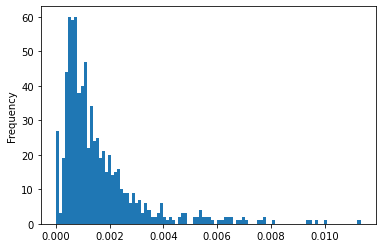

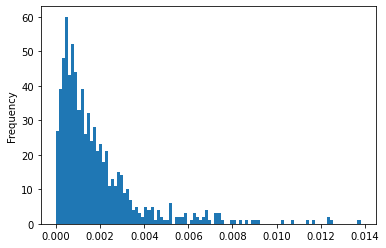

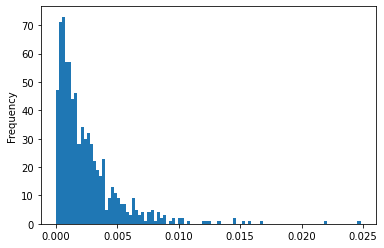

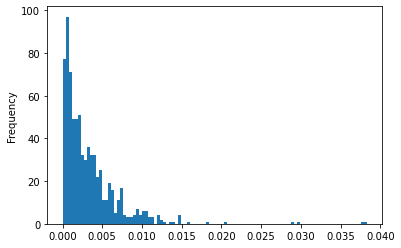

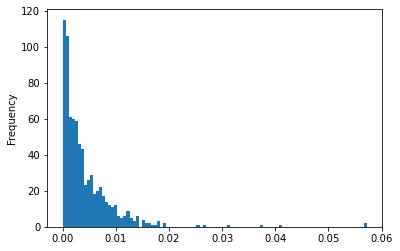

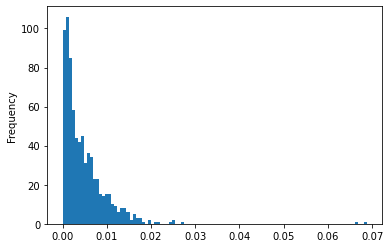

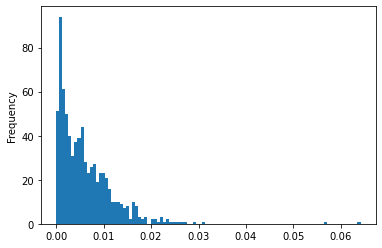

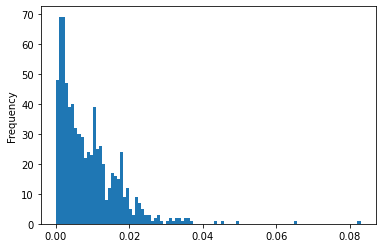

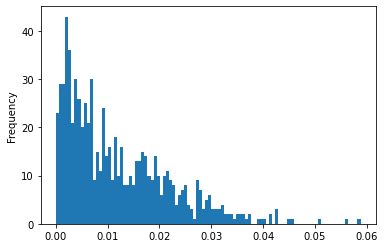

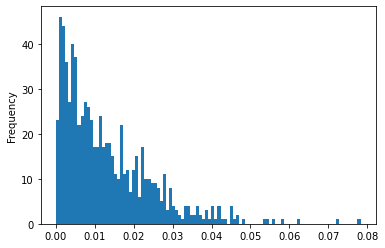

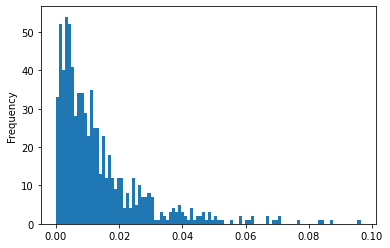

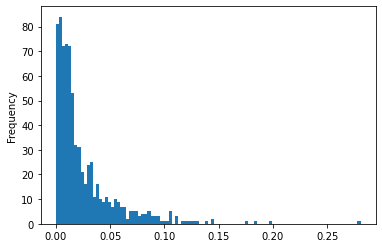

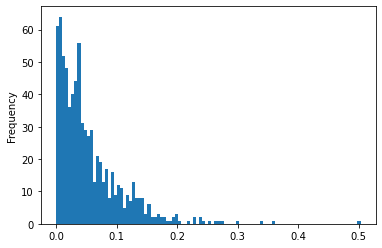

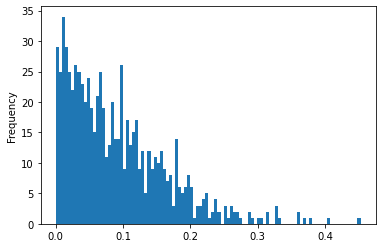

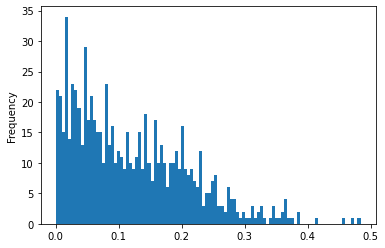

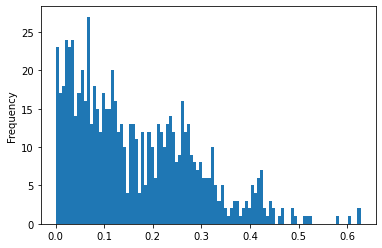

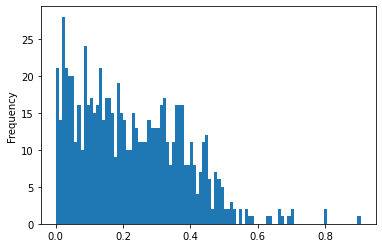

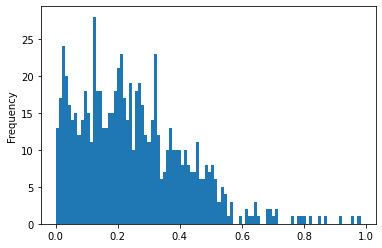

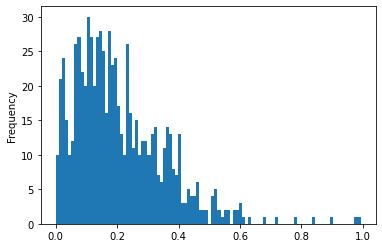

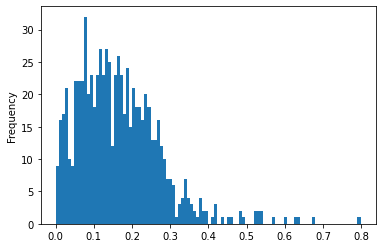

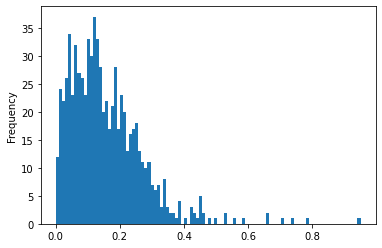

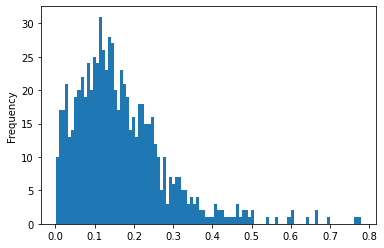

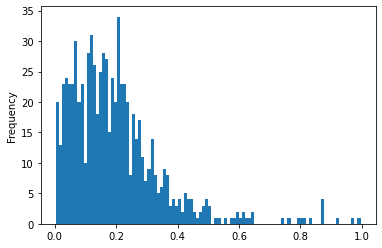

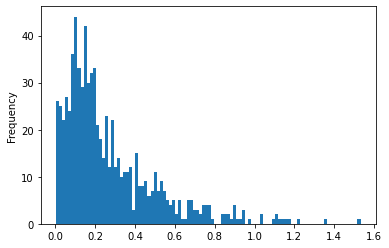

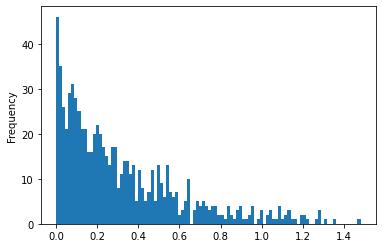

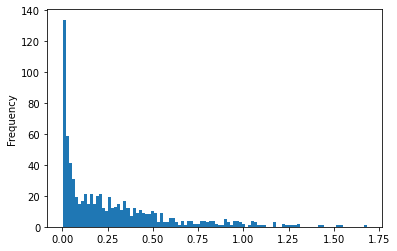

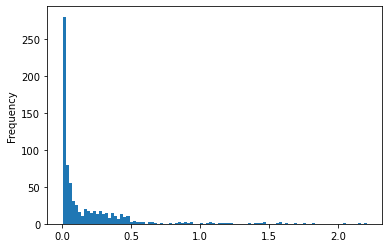

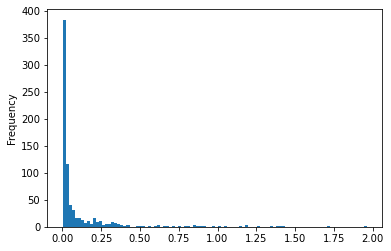

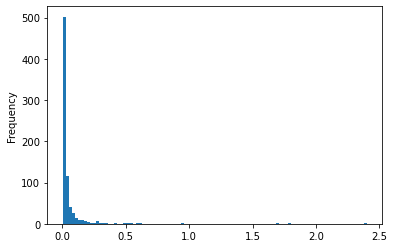

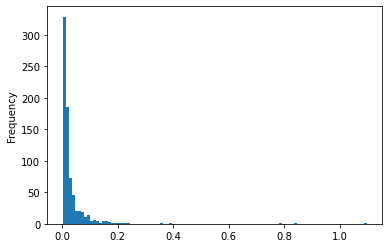

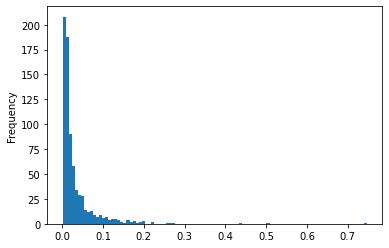

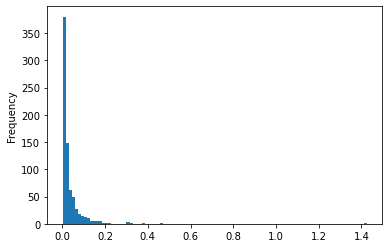

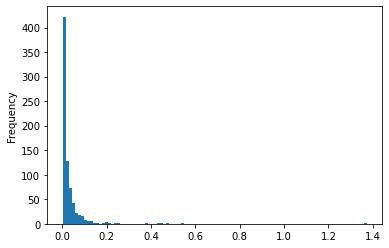

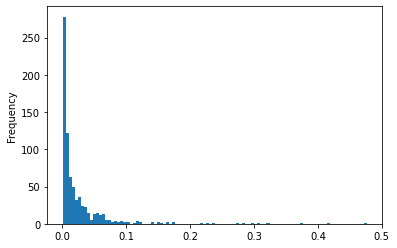

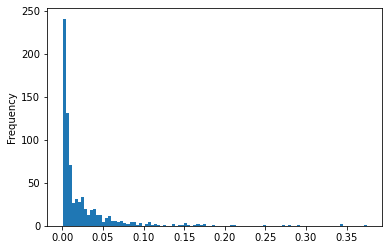

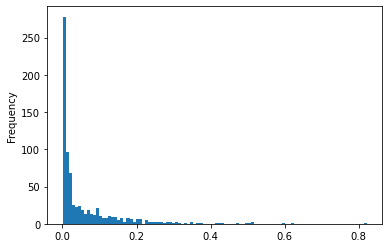

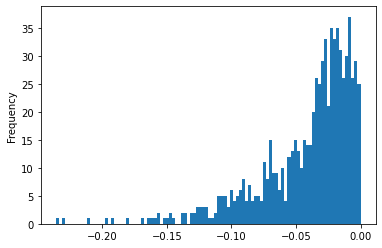

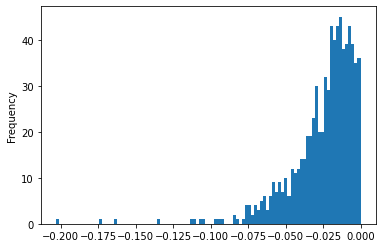

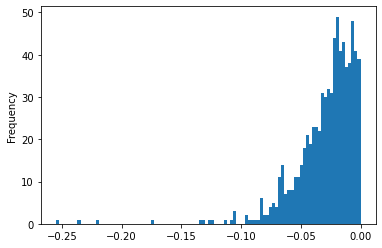

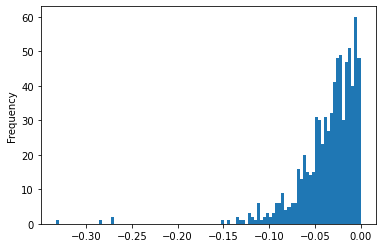

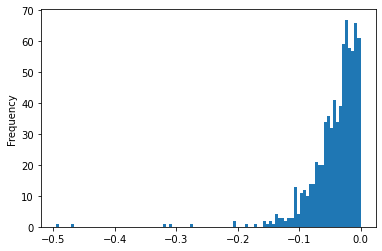

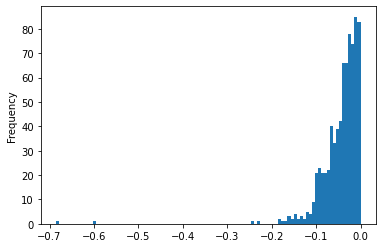

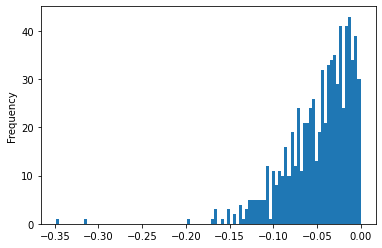

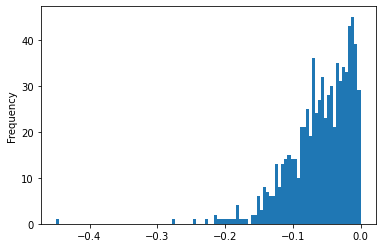

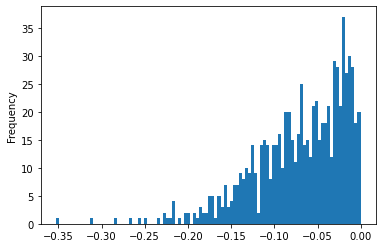

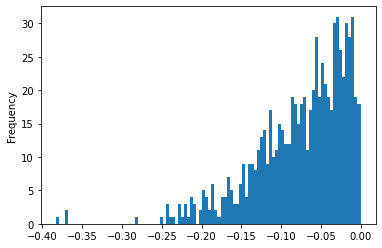

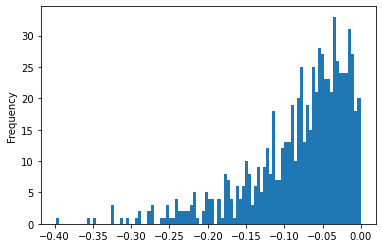

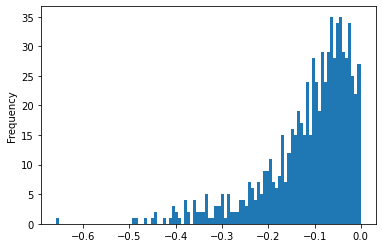

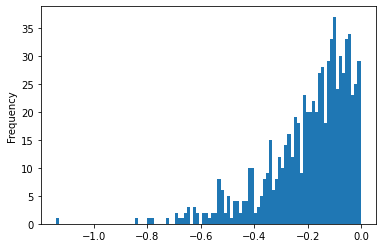

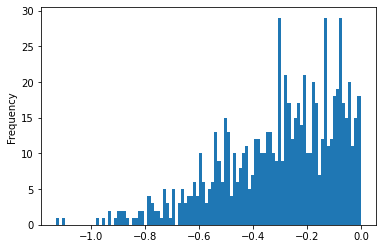

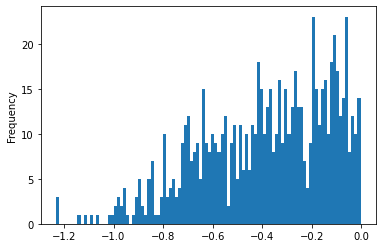

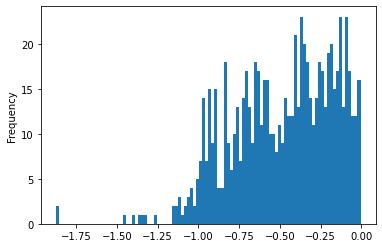

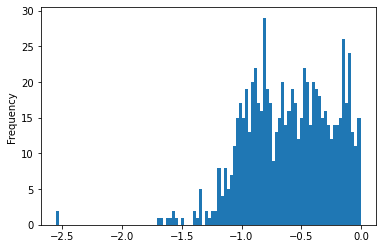

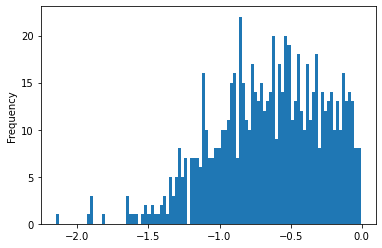

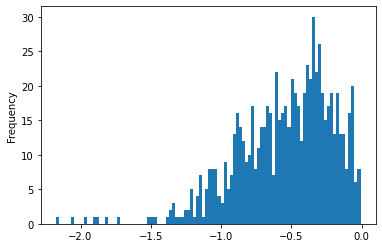

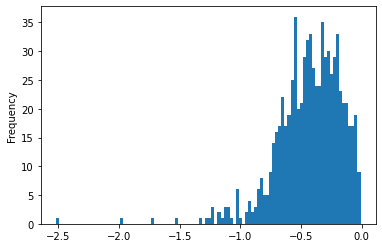

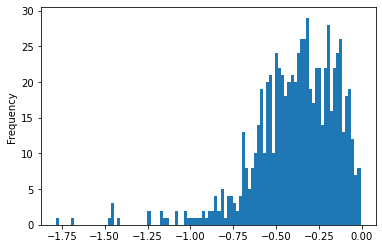

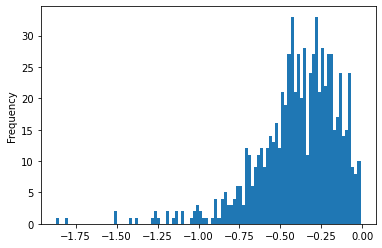

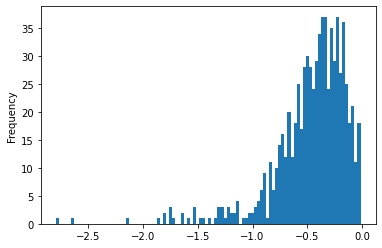

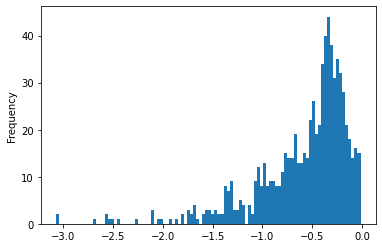

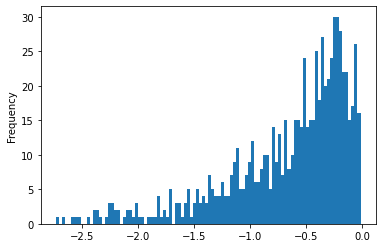

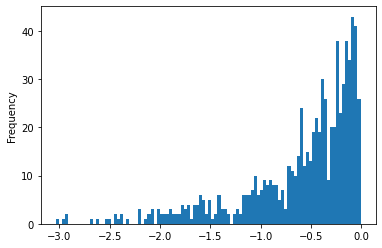

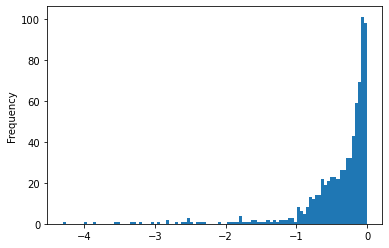

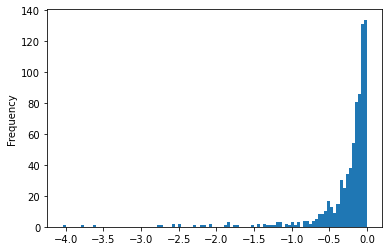

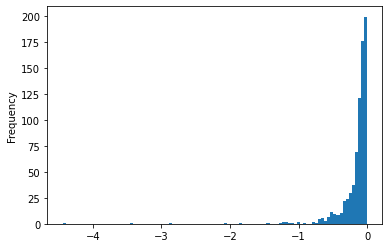

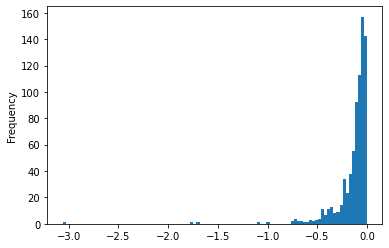

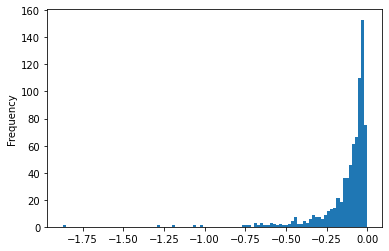

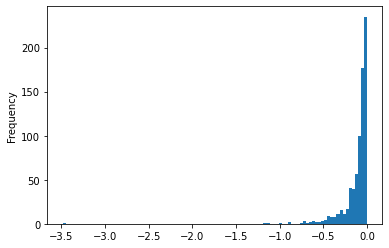

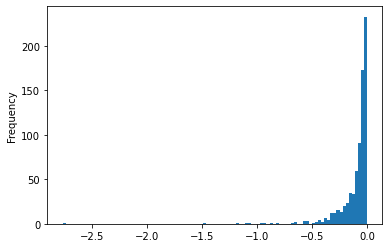

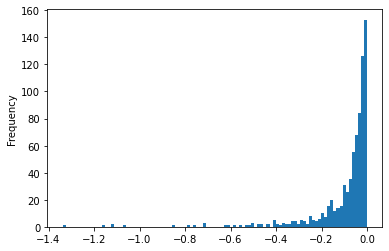

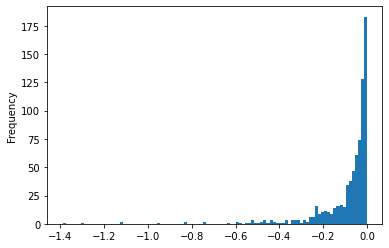

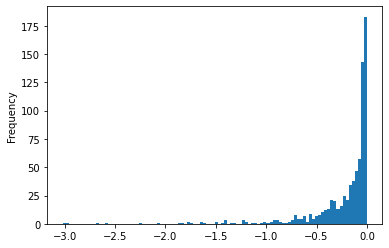

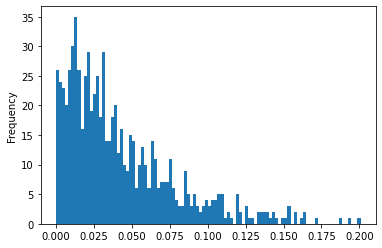

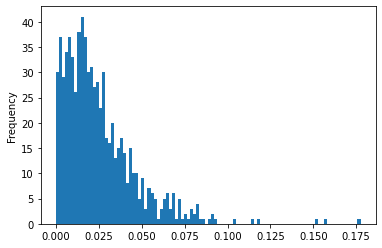

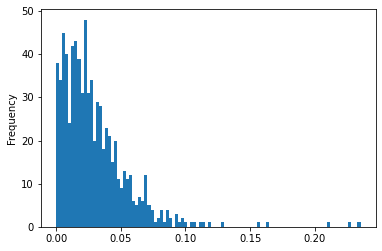

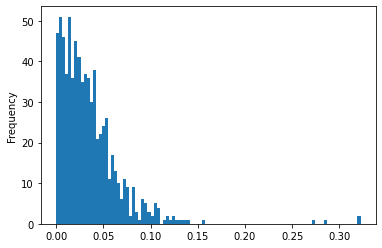

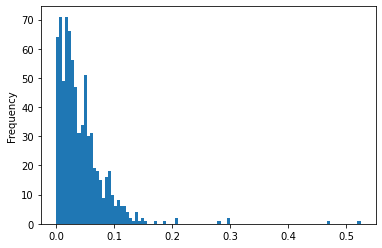

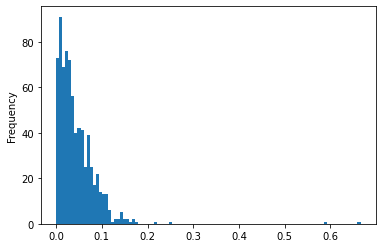

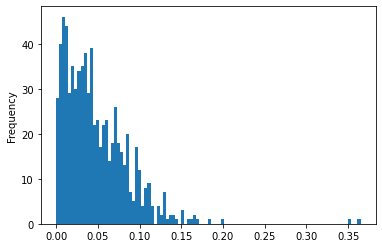

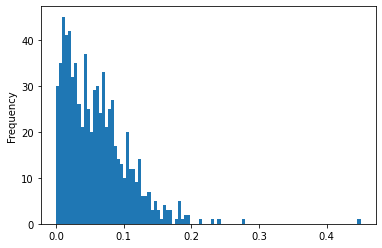

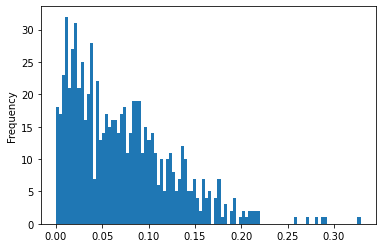

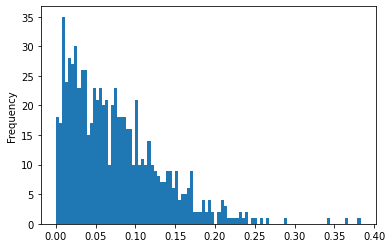

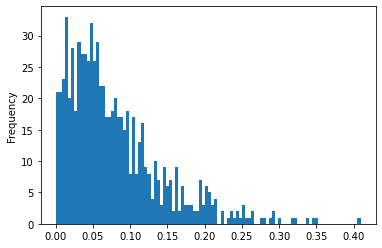

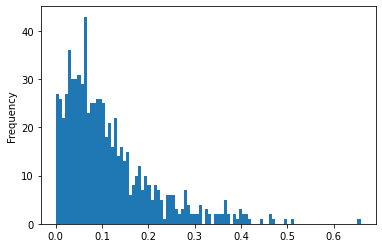

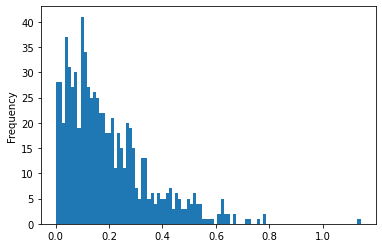

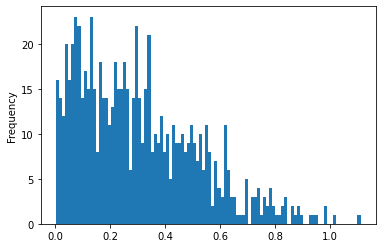

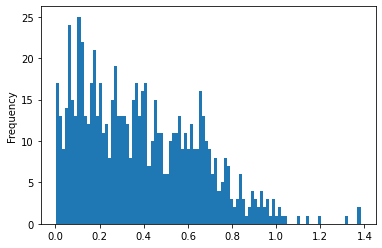

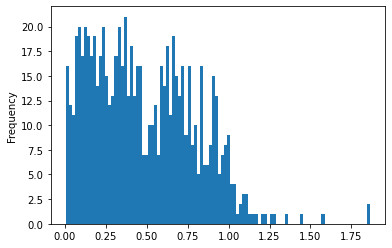

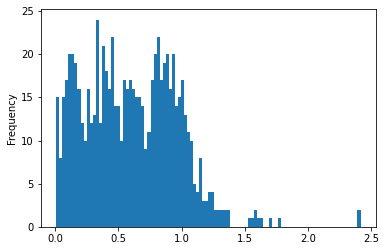

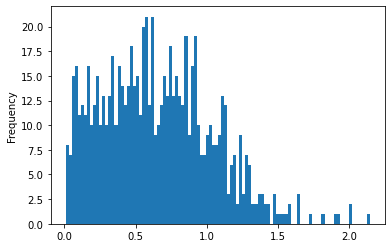

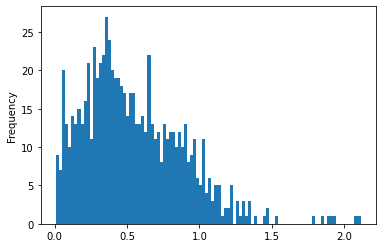

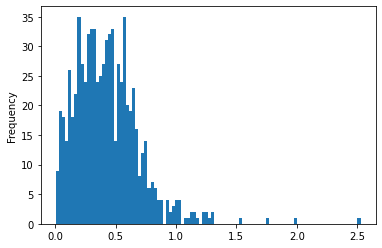

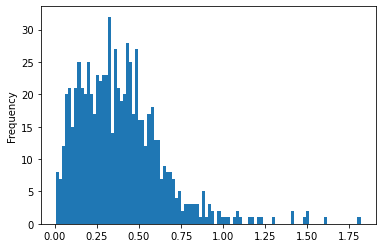

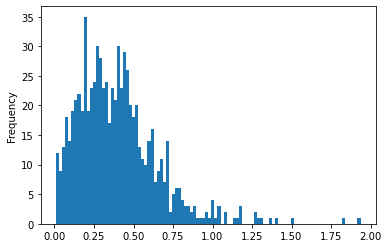

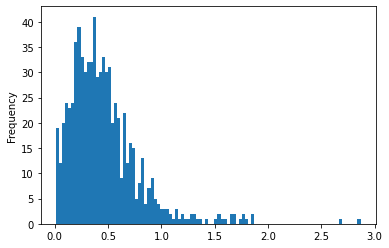

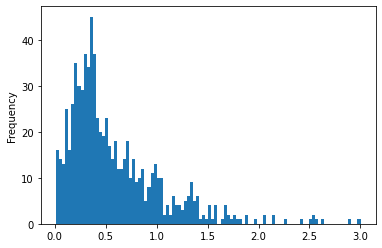

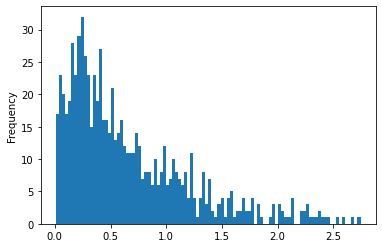

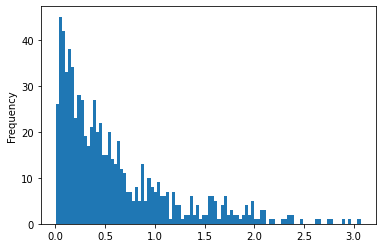

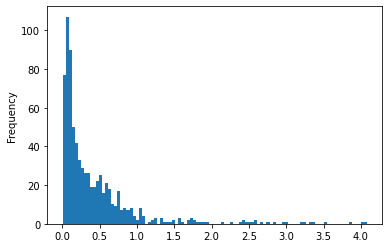

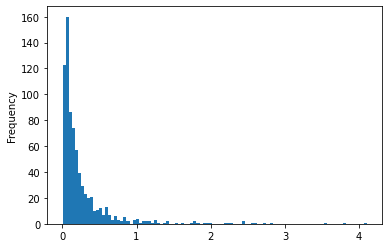

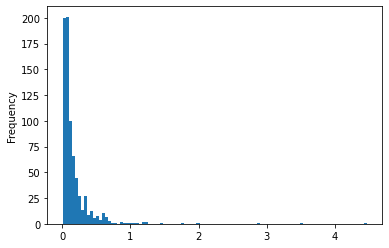

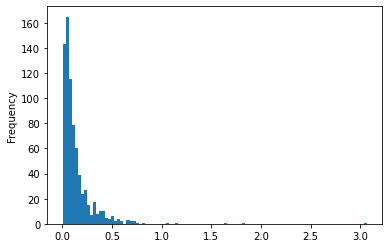

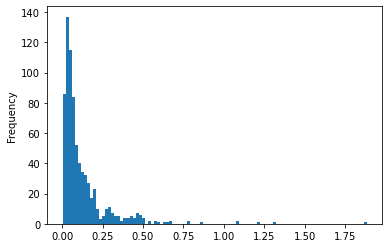

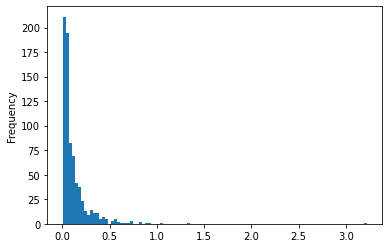

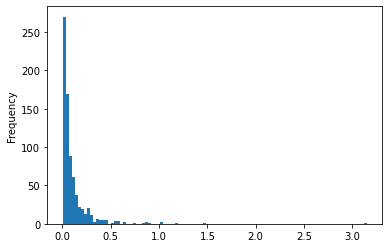

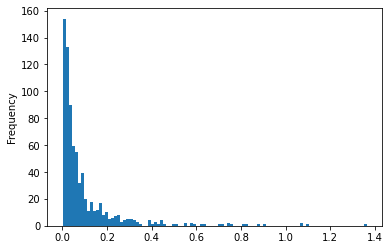

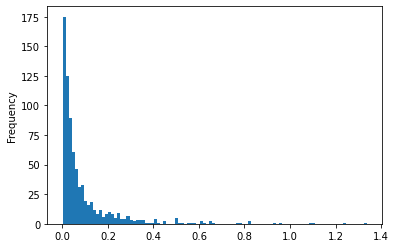

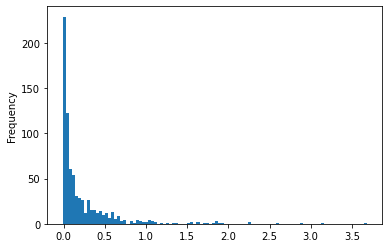

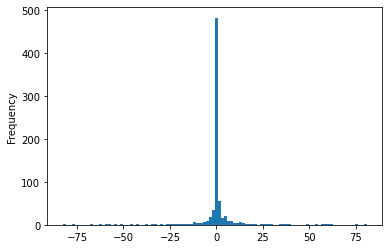

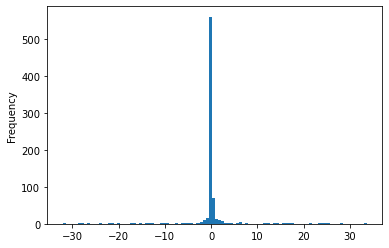

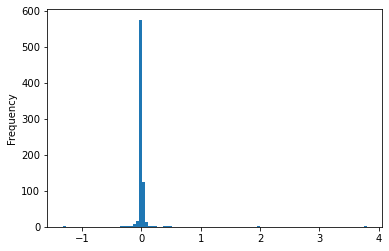

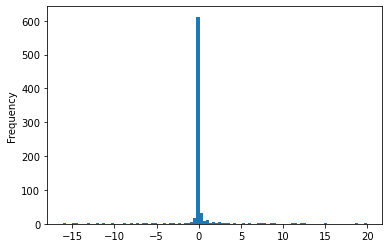

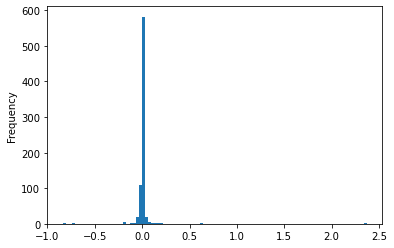

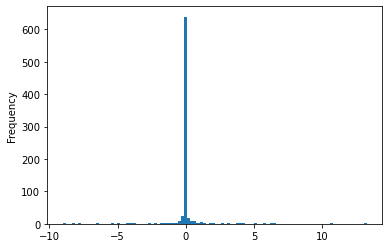

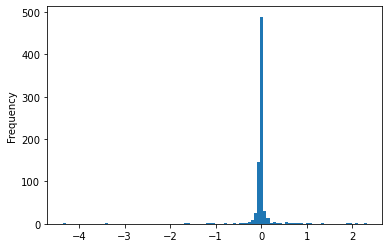

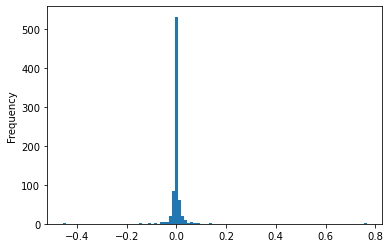

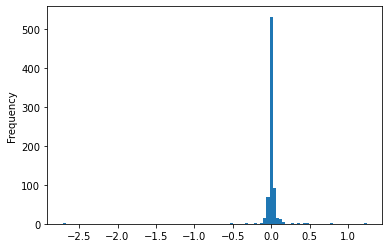

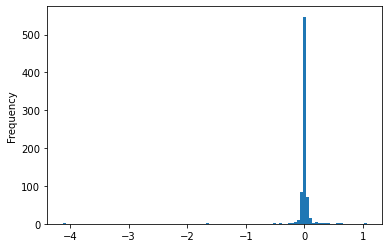

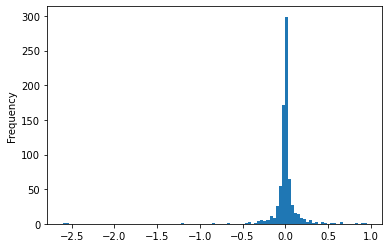

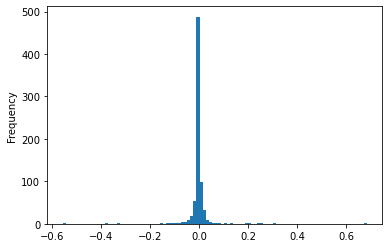

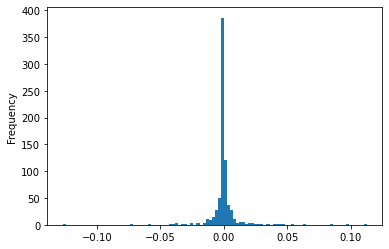

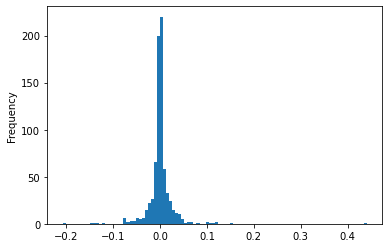

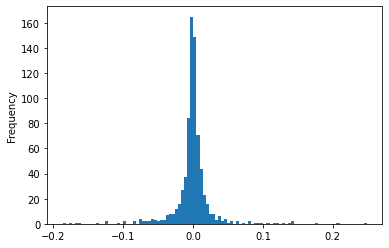

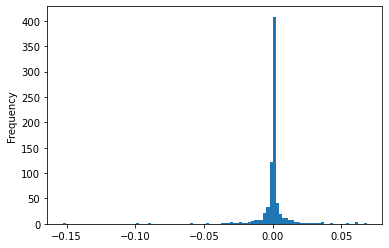

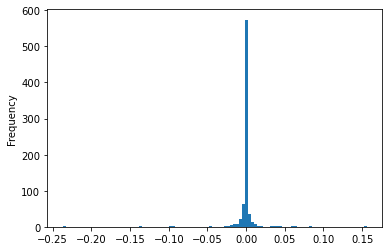

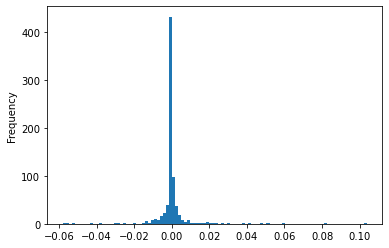

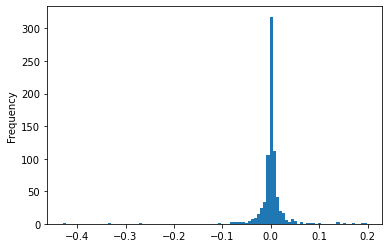

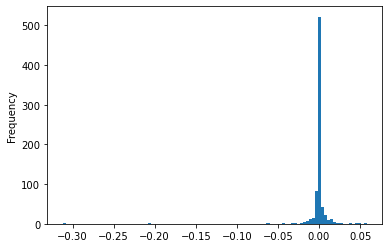

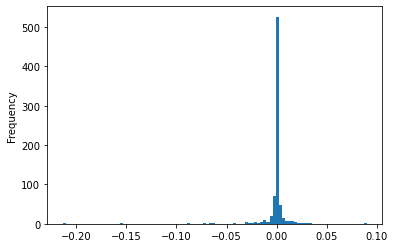

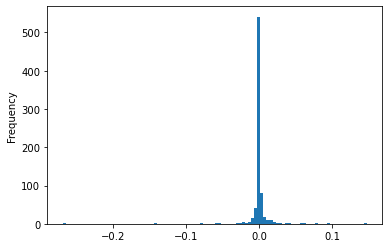

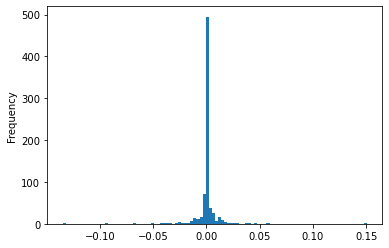

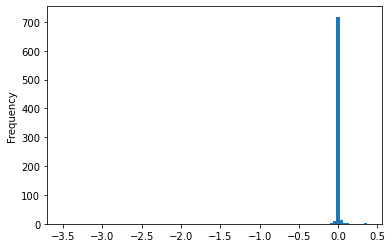

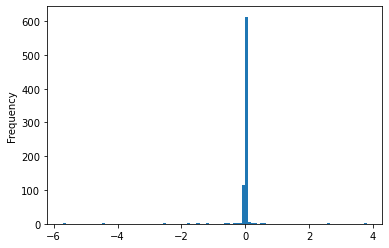

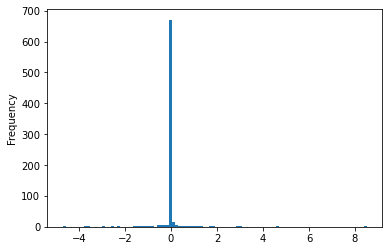

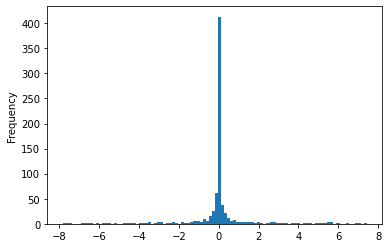

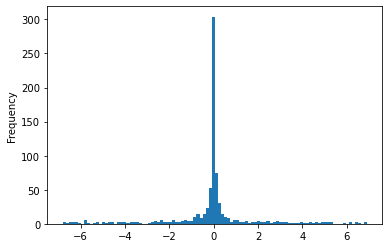

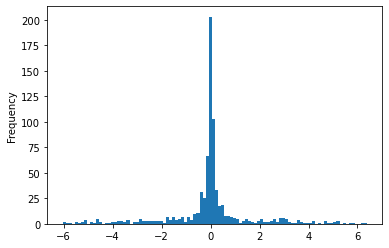

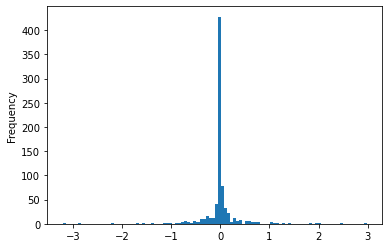

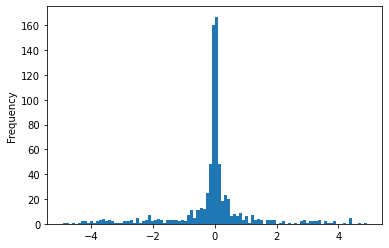

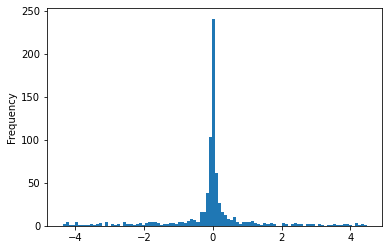

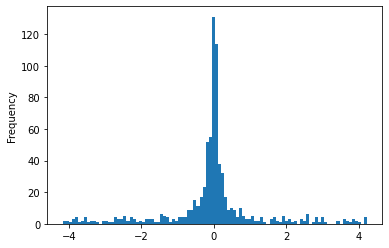

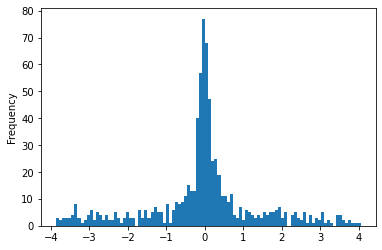

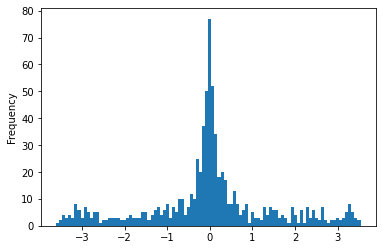

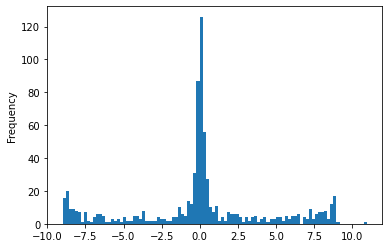

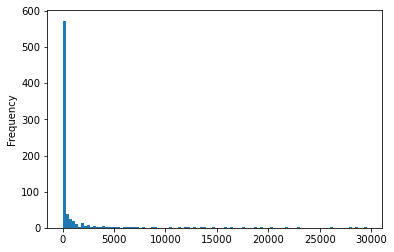

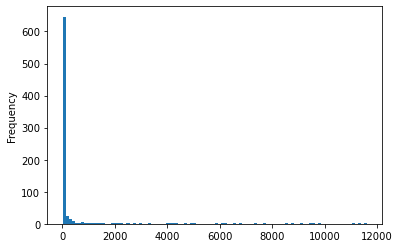

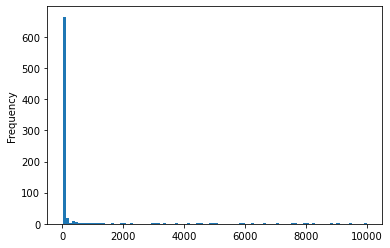

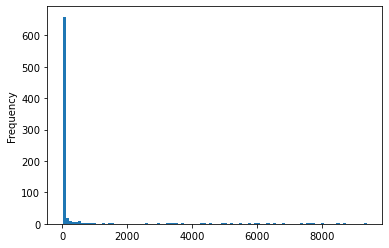

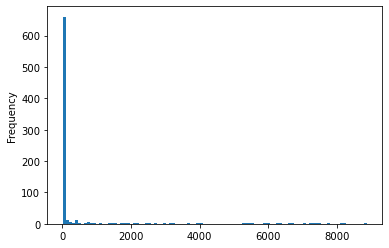

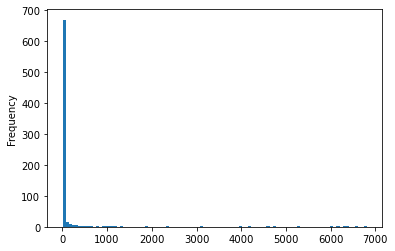

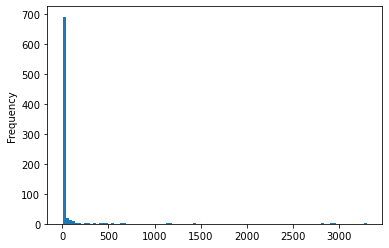

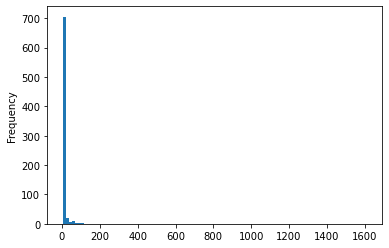

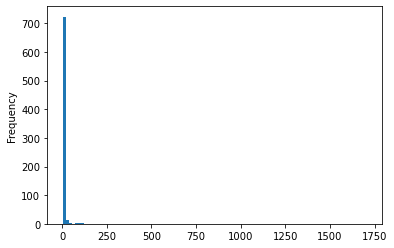

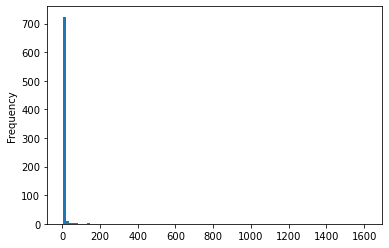

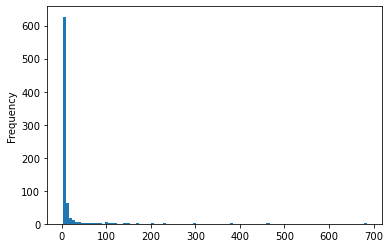

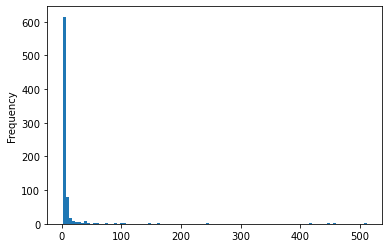

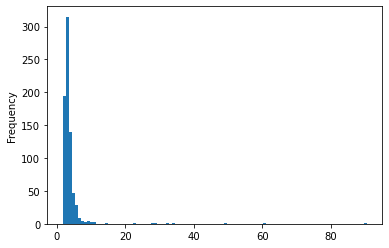

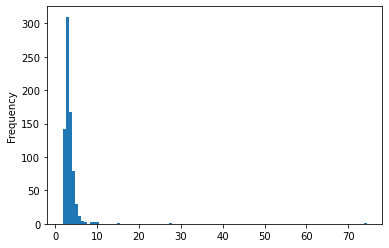

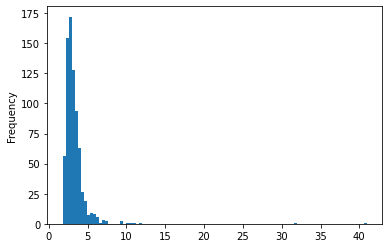

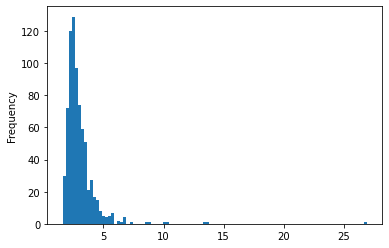

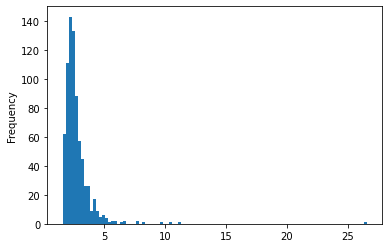

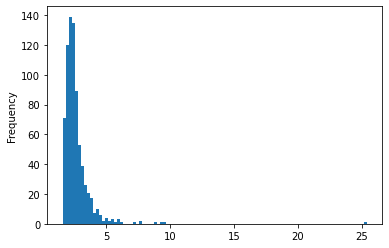

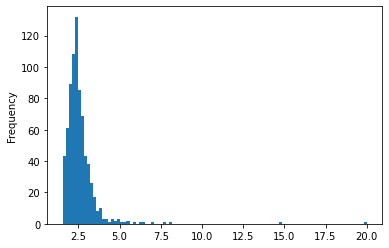

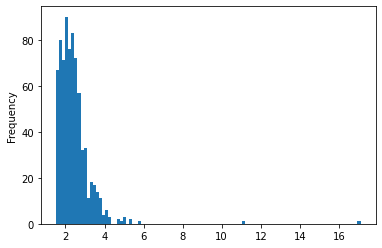

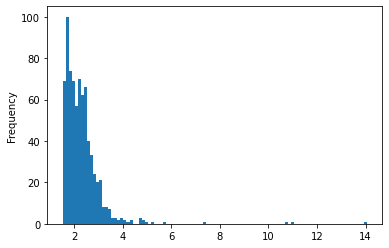

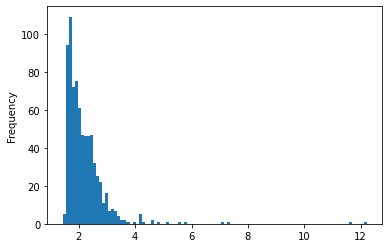

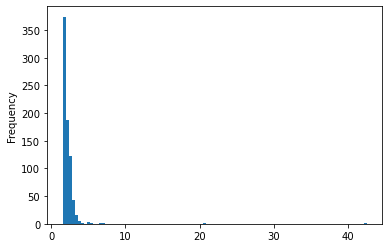

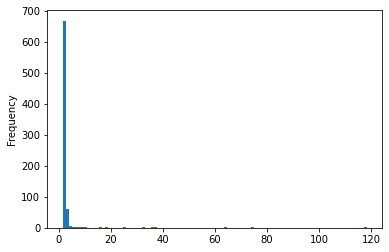

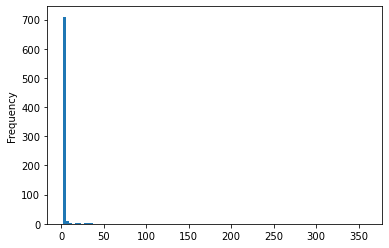

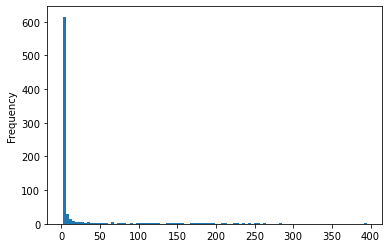

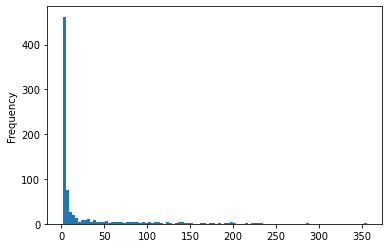

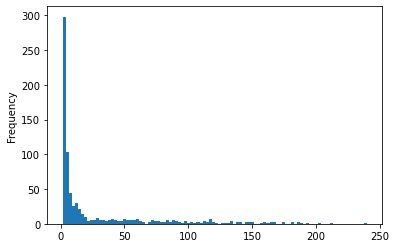

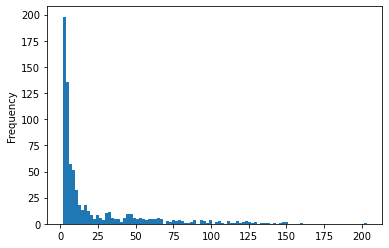

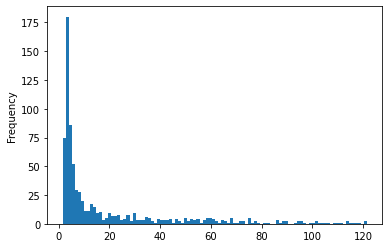

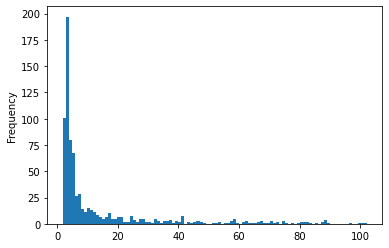

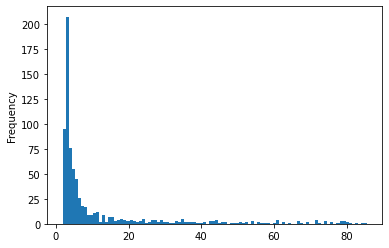

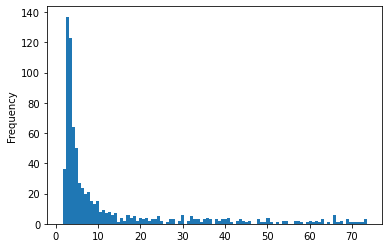

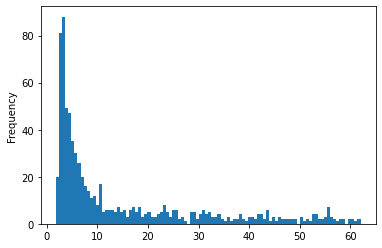

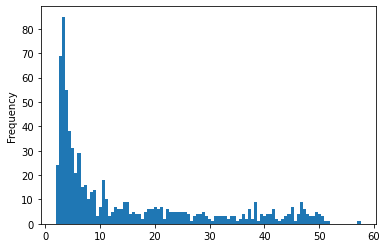

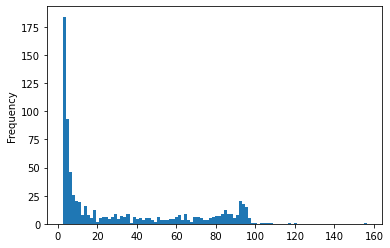

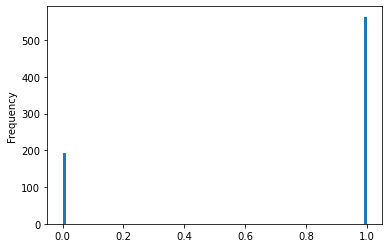

In [138]:
for val in columns[2:len(columns)]:
    df[val].plot(xlabel = val,kind = 'hist',bins = 100)
    plt.show()

#### Maximum attributes have values sampled from gaussian/skewed gaussian

# CORELLATION OF THE ATTRIBUTES

In [143]:
cor = df.corr()
print(cor)

0                                id    gender       PPE       DFA      RPDE  \
0                                                                             
id                         1.000000 -0.133605  0.026667  0.041938 -0.084606   
gender                    -0.133605  1.000000  0.010175  0.099356  0.168321   
PPE                        0.026667  0.010175  1.000000 -0.094775 -0.405558   
DFA                        0.041938  0.099356 -0.094775  1.000000  0.155075   
RPDE                      -0.084606  0.168321 -0.405558  0.155075  1.000000   
...                             ...       ...       ...       ...       ...   
tqwt_kurtosisValue_dec_33 -0.053781  0.107618  0.045755 -0.033914 -0.097161   
tqwt_kurtosisValue_dec_34 -0.058034  0.128936  0.046175  0.043454 -0.036406   
tqwt_kurtosisValue_dec_35 -0.057807  0.107734  0.037385  0.067843 -0.018052   
tqwt_kurtosisValue_dec_36 -0.055775  0.104828  0.039588  0.116699  0.021945   
class                     -0.111661  0.182713 -0.072

In [150]:
df3 = DataFrame(cor)

In [151]:
df3.head()

0             id    gender       PPE       DFA      RPDE  numPulses  \
0                                                                     
id      1.000000 -0.133605  0.026667  0.041938 -0.084606   0.085828   
gender -0.133605  1.000000  0.010175  0.099356  0.168321  -0.478367   
PPE     0.026667  0.010175  1.000000 -0.094775 -0.405558   0.191535   
DFA     0.041938  0.099356 -0.094775  1.000000  0.155075  -0.286791   
RPDE   -0.084606  0.168321 -0.405558  0.155075  1.000000  -0.521193   

0       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
0                                                                              
id              0.085226         -0.100831           -0.060464     -0.052865   
gender         -0.477710          0.460422           -0.110587      0.112004   
PPE             0.194098         -0.201907           -0.423660     -0.349053   
DFA            -0.286611          0.253708            0.084655      0.212120   
RPDE           -0.524839          0.506707            0.333545      0.614340   

0       ...  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0       ...                                                         
id      ...                   0.036897                   0.016047   
gender  ...                  -0.098689                   0.000210   
PPE     ...                   0.144261                   0.135544   
DFA     ...                  -0.146325                  -0.104456   
RPDE    ...                  -0.315592                  -0.278504   

0       tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
0                                                              
id                      -0.023317                  -0.045943   
gender                   0.066091                   0.083499   
PPE                      0.091726                   0.065035   
DFA                     -0.061129                  -0.063451   
RPDE                    -0.148989                  -0.101467   

0       tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
0                                                              
id                      -0.041835                  -0.053781   
gender                   0.089793                   0.107618   
PPE                      0.044163                   0.045755   
DFA                     -0.061845                  -0.033914   
RPDE                    -0.098923                  -0.097161   

0       tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
0                                                              
id                      -0.058034                  -0.057807   
gender                   0.128936                   0.107734   
PPE                      0.046175                   0.037385   
DFA                      0.043454                   0.067843   
RPDE                    -0.036406                  -0.018052   

0       tqwt_kurtosisValue_dec_36     class  
0                                            
id                      -0.055775 -0.111661  
gender                   0.104828  0.182713  
PPE                      0.039588 -0.072939  
DFA                      0.116699  0.306070  
RPDE                     0.021945  0.247444  

[5 rows x 755 columns]

In [152]:
df3.to_csv('attribute_correlation.csv',index = True)

#### Above csv has the correlation between all attributes